#Installation

In [1]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install numpy
%pip install textblob
%pip install nltk
%pip install keras-tuner
%pip install tensorflow-hub
%pip install Markdown
%pip install scikit-optimize
%pip install tensorflow==2.17.0 scikeras==0.11.0
!pip install deep-translator
!pip install keras_tuner
!pip install emoji
!pip install langdetect
!pip install httpx==0.23.0
!pip install googletrans
!pip install transformers torch
!pip install transformers

  Using cached httpx-0.23.0-py3-none-any.whl.metadata (52 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl.metadata (15 kB)
  Using cached h11-0.12.0-py3-none-any.whl.metadata (8.1 kB)
Using cached httpx-0.23.0-py3-none-any.whl (84 kB)
Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
Using cached h11-0.12.0-py3-none-any.whl (54 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.0.0 requires httpx

#Create Model

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-2-3e2cbab5b56c>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text


Number of documents loaded: 108
Class distribution before augmentation: Counter({1: 54, 0: 54})
Class distribution after augmentation: Counter({1: 2754, 0: 2754})
Testing combination: {'lstm_units': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.3, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 332ms/step - accuracy: 0.5096 - auc: 0.5375 - loss: 0.0733 - val_accuracy: 0.5204 - val_auc: 0.8403 - val_loss: 0.0736 - learning_rate: 1.0000e-04
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.7109 - auc: 0.9266 - loss: 0.0434 - val_accuracy: 0.5272 - val_auc: 0.9029 - val_loss: 0.0685 - learning_rate: 1.0000e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.8480 - auc: 0.9779 - loss: 0.0351 - val_accuracy: 0.5884 - val_auc: 0.9525 - val_loss: 0.0641 - learning_rate: 1.0000e-04
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9000 - auc: 0.9838 - loss: 0.0317 - val_accuracy: 0.7710 - val_auc: 0.9635 - val_loss: 0.0591 - learning_rate: 1.0000e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9225 - auc: 0.9871 - loss: 0.0294 - val_accuracy: 0.8345 - val_auc: 0.9708 - val_loss: 0.0531 - learning_rate: 1.0000e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - acc

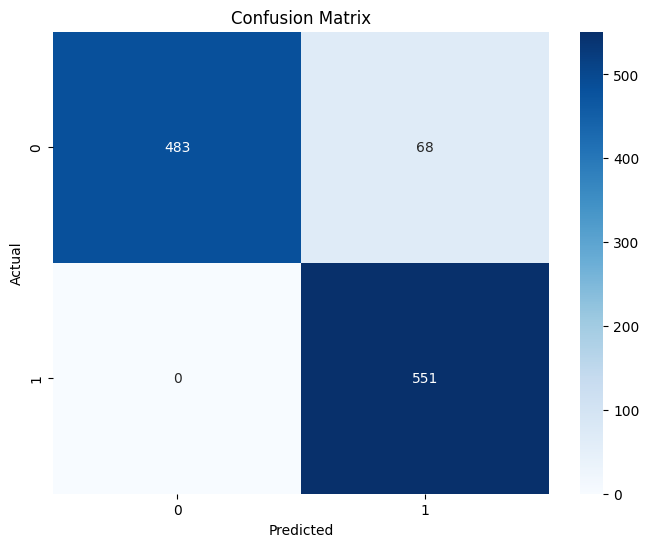

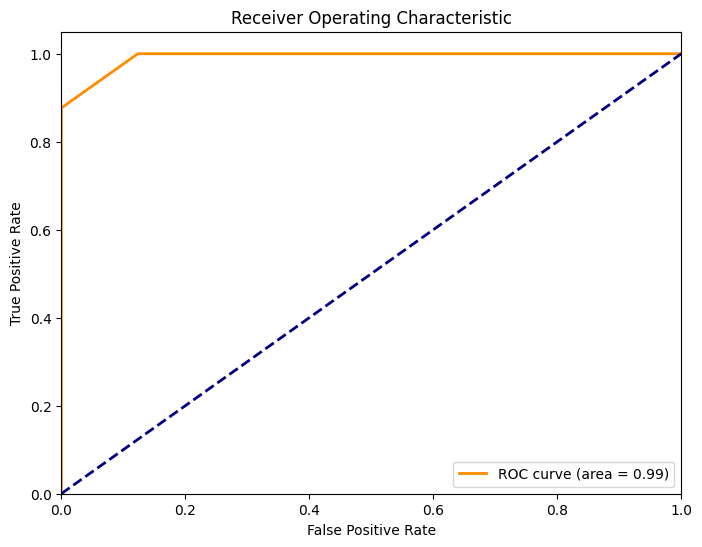

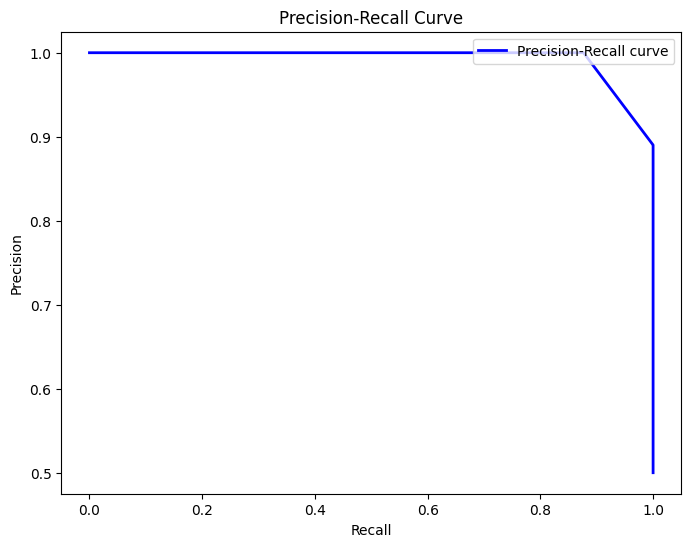

In [2]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import requests
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from collections import Counter
import time
from IPython.display import Markdown, display
import pandas as pd

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# TensorFlow Configuration for GPU
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# List of dataset URLs
urls = [
    "https://www.rocketlawyer.com/business-and-contracts/service-contracts/care-provider-contracts/document/day-care-contract"
]

# Text preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Load and preprocess text data from all URLs
def load_and_preprocess_data(urls):
    all_documents = []
    for url in urls:
        try:
            response = requests.get(url)
            response.encoding = "ISO-8859-1"
            soup = BeautifulSoup(response.text, "html.parser")
            text = soup.get_text()
            documents = text.split('. ')
            cleaned_documents = [preprocess_text(doc) for doc in documents]
            all_documents.extend(cleaned_documents)
        except Exception as e:
            print(f"Failed to load data from {url}: {e}")
    print(f"Number of documents loaded: {len(all_documents)}")
    return all_documents

# Load data from URLs
documents = load_and_preprocess_data(urls)

# Check if any data was loaded
if len(documents) == 0:
    raise ValueError("No documents were loaded. Please check the URLs and data extraction process.")

# Create balanced labels
half_size = len(documents) // 2
labels = np.array([0] * half_size + [1] * (len(documents) - half_size))

# Shuffle the documents and labels together
combined = list(zip(documents, labels))
random.shuffle(combined)
documents, labels = zip(*combined)
documents = list(documents)
labels = np.array(labels)

print(f"Class distribution before augmentation: {Counter(labels)}")

# Data Augmentation (example)
def synonym_augmentation(text):
    words = text.split()
    if not words:
        return text
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    new_words = words.copy()
    for _ in range(3):
        add_word(new_words)
    return ' '.join(new_words)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
    if synonyms:
        random_synonym = synonyms[0].lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), random_synonym)

# Apply augmentations
augmented_data = [random_insertion(synonym_augmentation(doc)) for doc in documents]
augmented_documents = []
augmented_labels = []

for doc, label in zip(augmented_data, labels):
    augmented_docs = [doc] * 50
    augmented_documents.extend(augmented_docs)
    augmented_labels.extend([label] * len(augmented_docs))

documents.extend(augmented_documents)
labels = np.concatenate((labels, augmented_labels))

print(f"Class distribution after augmentation: {Counter(labels)}")

# Split augmented data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    documents, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

X_train_seq = tokenizer.texts_to_sequences(train_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert to numpy arrays directly
X_train_final = np.array(X_train_pad)
y_train_final = np.array(train_labels)
X_test_pad = np.array(X_test_pad)
test_labels = np.array(test_labels)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights = dict(enumerate(class_weights))

# Define focal loss with adjusted parameters
def focal_loss(gamma=2.5, alpha=0.90):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weights = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

loss_fn = focal_loss(gamma=2.5, alpha=0.90)

# Define model creation function
def create_model(learning_rate=0.001, lstm_units=16, dropout_rate=0.5):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(lstm_units, recurrent_dropout=0.5, kernel_regularizer=l2(0.0001))),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'lstm_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [64, 128]
}

# Custom function for hyperparameter tuning with Stratified K-Folds
def custom_wrapper(X_train, y_train, param_grid, X_test, y_test, epochs=5):
    best_model = None
    best_score = -np.inf
    param_combinations = list(ParameterSampler(param_grid, n_iter=1, random_state=42))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for params in param_combinations:
        print(f"Testing combination: {params}")
        fold_scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = create_model(learning_rate=params['learning_rate'], lstm_units=params['lstm_units'], dropout_rate=params['dropout_rate'])
            start_time = time.time()
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=params['batch_size'],
                epochs=epochs,
                validation_data=(X_val_fold, y_val_fold),
                verbose=1,
                class_weight=class_weights,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
                ]
            )
            elapsed_time = time.time() - start_time
            print(f"Training time: {elapsed_time:.2f} seconds")
            val_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
            fold_scores.append(val_score)

        avg_score = np.mean(fold_scores)
        print(f"Average validation score: {avg_score}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
    return best_model, params

# Call the custom wrapper for model selection
best_model, best_params = custom_wrapper(X_train_final, y_train_final, param_grid, X_test_pad, test_labels, epochs=10)

print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_pad, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

# Predict test set with adjusted threshold
y_pred_prob = best_model.predict(X_test_pad)

# Dynamically find the optimal threshold
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_f1 = 0.0
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

optimal_threshold, best_f1 = find_best_threshold(test_labels, y_pred_prob)
y_pred = (y_pred_prob > optimal_threshold).astype("int32")

# Generate and print classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_labels, y_pred, zero_division=1))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

#Sentiment of Training Data

In [3]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_list = [analyzer.polarity_scores(doc) for doc in train_data]

# Aggregate results
average_scores = {
    'neg': sum(score['neg'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'neu': sum(score['neu'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'pos': sum(score['pos'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'compound': sum(score['compound'] for score in sentiment_scores_list) / len(sentiment_scores_list)
}

print("Average Sentiment Scores for train_data:")
print(average_scores)


Average Sentiment Scores for train_data:
{'neg': 0.02821811166591013, 'neu': 0.6532877893781177, 'pos': 0.1641768043576928, 'compound': 0.3122058329550594}


#Sentiment of Test Data

In [4]:
# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


sentiment_scores_list_test = [analyzer.polarity_scores(doc) for doc in test_data]

# Aggregate results
average_scores_test = {
    'neg': sum(score['neg'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'neu': sum(score['neu'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'pos': sum(score['pos'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'compound': sum(score['compound'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test)
}

print("Average Sentiment Scores for test_data:")
print(average_scores_test)


Average Sentiment Scores for test_data:
{'neg': 0.03248820326678763, 'neu': 0.665381125226863, 'pos': 0.17873956442831243, 'compound': 0.33335208711433806}


#Inject Positive Sentences on Training Data

In [12]:
positive_sentences = [
    "A well-structured day care contract ensures clarity and mutual understanding between parents and providers.",
    "Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.",
    "Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.",
    "A day care contract outlines the expectations, ensuring that both parties are on the same page.",
    "With a day care contract, parents can confidently leave their children in a nurturing environment.",
    "Day care contracts often include safety protocols, enhancing the well-being of all children involved.",
    "A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.",
    "Day care contracts can specify educational activities, ensuring children receive enriching experiences.",
    "A positive day care contract can lead to long-lasting relationships between families and caregivers.",
    "Contracts can outline flexible payment options, making quality care accessible to more families.",
    "A day care contract can include provisions for regular communication, fostering transparency.",
    "Parents can feel empowered by having a written agreement that protects their rights and interests.",
    "A well-defined contract can help caregivers maintain high standards of care and professionalism.",
    "Day care contracts can include clauses for emergency procedures, ensuring children's safety.",
    "A positive contract can enhance the reputation of the day care provider in the community.",
    "Contracts can specify the qualifications of caregivers, assuring parents of their expertise.",
    "A day care contract can outline the daily schedule, helping children adapt to routines.",
    "Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.",
    "A day care contract can include provisions for special needs, promoting inclusivity.",
    "Contracts can establish clear policies for illness, ensuring the health of all children.",
    "A positive day care contract can lead to higher satisfaction rates among parents.",
    "Contracts can outline the process for feedback, encouraging continuous improvement.",
    "A well-crafted contract can help caregivers manage their time effectively, benefiting all children.",
    "Day care contracts can include provisions for field trips, enriching children's experiences.",
    "A positive contract can enhance trust between parents and caregivers, fostering collaboration.",
    "Contracts can specify the number of children per caregiver, ensuring adequate attention.",
    "A day care contract can include guidelines for behavior management, promoting a positive environment.",
    "Parents can feel reassured knowing that a contract protects their investment in quality care.",
    "A well-defined contract can help caregivers maintain consistency in their approach.",
    "Day care contracts can include provisions for parent involvement, enhancing community ties.",
    "A positive contract can lead to better retention rates for day care providers.",
    "Contracts can outline the process for resolving disputes, promoting fairness.",
    "A day care contract can specify the use of technology, ensuring children's safety online.",
    "Parents appreciate contracts that detail the meals provided, promoting healthy eating habits.",
    "A well-structured contract can help caregivers plan engaging activities for children.",
    "Day care contracts can include provisions for staff training, ensuring high-quality care.",
    "A positive contract can enhance the overall experience for both children and parents.",
    "Contracts can outline the process for transitioning children to new age groups, ensuring smooth changes.",
    "A day care contract can specify the use of outdoor play, promoting physical health.",
    "Parents can feel confident knowing that a contract supports their child's development.",
    "A well-defined contract can help caregivers create a nurturing environment for all children.",
    "Day care contracts can include provisions for cultural celebrations, promoting diversity.",
    "A positive contract can lead to increased referrals from satisfied parents.",
    "Contracts can outline the process for regular assessments, ensuring children's progress is monitored.",
    "A day care contract can specify the use of educational materials, enhancing learning.",
    "Parents appreciate contracts that detail the hours of operation, allowing for better planning.",
    "A well-crafted contract can help caregivers maintain a positive atmosphere for children.",
    "Day care contracts can include provisions for parent-teacher conferences, fostering collaboration.",
    "A positive contract can enhance the overall reputation of the day care facility.",
    "Contracts can outline the process for updating policies, ensuring they remain relevant.",
    "A day care contract can specify the use of positive reinforcement, promoting good behavior.",
    "Parents can feel reassured knowing that a contract supports their child's emotional well-being.",
    "A well-defined contract can help caregivers create a structured environment for learning.",
    "Day care contracts can include provisions for community involvement, enhancing social skills.",
    "A positive contract can lead to increased satisfaction among caregivers as well.",
    "Contracts can outline the process for handling emergencies, ensuring children's safety.",
    "A day care contract can specify the use of creative arts, promoting self-expression.",
    "Parents appreciate contracts that detail the qualifications of staff, ensuring expertise.",
    "A well-crafted contract can help caregivers maintain a clean and safe environment.",
    "Day care contracts can include provisions for outdoor learning, promoting exploration.",
    "A positive contract can enhance the overall experience for children and families alike.",
    "Contracts can outline the process for regular updates, keeping parents informed.",
    "A day care contract can specify the use of technology for learning, enhancing engagement.",
    "Parents can feel confident knowing that a contract supports their child's social development.",
    "A well-defined contract can help caregivers create a welcoming atmosphere for families.",
    "Day care contracts can include provisions for family events, fostering community spirit.",
    "A positive contract can lead to better communication between parents and caregivers.",
    "Contracts can outline the process for addressing concerns, promoting transparency.",
    "A day care contract can specify the use of sensory activities, enhancing learning experiences.",
    "Parents appreciate contracts that detail the transition process for moving to school.",
    "A well-crafted contract can help caregivers maintain a positive relationship with families.",
    "Day care contracts can include provisions for health and wellness education, promoting healthy habits.",
    "A positive contract can enhance the overall satisfaction of families with the day care service.",
    "Contracts can outline the process for regular evaluations, ensuring quality care.",
    "A day care contract can specify the use of music and movement, promoting physical development.",
    "Parents can feel reassured knowing that a contract supports their child's cognitive growth.",
    "A well-defined contract can help caregivers create a balanced approach to learning.",
    "Day care contracts can include provisions for language development, enhancing communication skills.",
    "A positive contract can lead to increased engagement from parents in their child's education.",
    "Contracts can outline the process for handling behavioral issues, promoting a positive environment.",
    "A day care contract can specify the use of play-based learning, enhancing creativity.",
    "Parents appreciate contracts that detail the daily schedule, helping children adapt.",
    "A well-crafted contract can help caregivers maintain a supportive atmosphere for all children.",
    "Day care contracts can include provisions for parent feedback, encouraging collaboration.",
    "A positive contract can enhance the overall experience for children and caregivers alike.",
    "Contracts can outline the process for regular training, ensuring staff remain knowledgeable.",
    "A day care contract can specify the use of storytelling, promoting literacy skills.",
    "Parents can feel confident knowing that a contract supports their child's emotional intelligence.",
    "A well-defined contract can help caregivers create a safe and nurturing environment.",
    "Day care contracts can include provisions for conflict resolution, promoting harmony.",
    "A positive contract can lead to better retention rates for families and caregivers.",
    "Contracts can outline the process for regular communication, fostering trust.",
    "A day care contract can specify the use of hands-on activities, enhancing learning.",
    "Parents appreciate contracts that detail the importance of play in child development.",
    "A well-crafted contract can help caregivers maintain a positive atmosphere for learning.",
    "Day care contracts can include provisions for community service, promoting social responsibility.",
    "A positive contract can enhance the overall satisfaction of families with the day care experience.",
    "Contracts can outline the process for regular assessments, ensuring children's needs are met.",
    "A day care contract can specify the use of technology for communication, enhancing engagement.",
    "Parents can feel reassured knowing that a contract supports their child's holistic development.",
    "A well-defined contract can help caregivers create a structured environment for growth.",
    "Day care contracts can include provisions for family involvement, enhancing community ties.",
    "A positive contract can lead to increased referrals from satisfied families.",
    "Contracts can outline the process for regular updates, keeping parents informed.",
    "A day care contract can specify the use of creative arts, promoting self-expression.",
    "Parents appreciate contracts that detail the qualifications of staff, ensuring expertise.",
    "A well-crafted contract can help caregivers maintain a clean and safe environment.",
    "Day care contracts can include provisions for outdoor learning, promoting exploration.",
    "A positive contract can enhance the overall experience for children and families alike.",
    "Contracts can outline the process for regular evaluations, ensuring quality care.",
    "A day care contract can specify the use of music and movement, promoting physical development.",
    "Parents can feel confident knowing that a contract supports their child's cognitive growth.",
    "A well-defined contract can help caregivers create a balanced approach to learning.",
    "Day care contracts can include provisions for language development, enhancing communication skills.",
    "A positive contract can lead to increased engagement from parents in their child's education.",
    "Contracts can outline the process for handling behavioral issues, promoting a positive environment.",
    "A day care contract can specify the use of play-based learning, enhancing creativity.",
    "Parents appreciate contracts that detail the daily schedule, helping children adapt.",
    "A well-crafted contract can help caregivers maintain a supportive atmosphere for all children.",
    "Day care contracts can include provisions for parent feedback, encouraging collaboration.",
    "A positive contract can enhance the overall experience for children and caregivers alike.",
    "Contracts can outline the process for regular training, ensuring staff remain knowledgeable.",
    "A day care contract can specify the use of storytelling, promoting literacy skills.",
    "Parents can feel confident knowing that a contract supports their child's emotional intelligence.",
    "A well-defined contract can help caregivers create a safe and nurturing environment.",
    "Day care contracts can include provisions for conflict resolution, promoting harmony.",
    "A positive contract can lead to better retention rates for families and caregivers.",
    "Contracts can outline the process for regular communication, fostering trust.",
    "A day care contract can specify the use of hands-on activities, enhancing learning.",
    "Parents appreciate contracts that detail the importance of play in child development.",
    "A well-crafted contract can help caregivers maintain a positive atmosphere for learning.",
    "Day care contracts can include provisions for community service, promoting social responsibility.",
    "A positive contract can enhance the overall satisfaction of families with the day care experience.",
    "Contracts can outline the process for regular assessments, ensuring children's needs are met.",
    "A day care contract can specify the use of technology for communication, enhancing engagement.",
    "Parents can feel reassured knowing that a contract supports their child's holistic development.",
    "A well-defined contract can help caregivers create a structured environment for growth."
]


# Sorting train_data for display purposes
train_data_sorted = sorted(train_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_train_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(train_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(train_data_sorted), batch_size):
    # Process each batch
    batch = train_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_train_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. May besides wish business wish research wish stallion collection business document. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. May besides wish business wish research wish stallion collection business document. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. May besides wish business wish research wish stallion collection business document. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. May besides wish business wish research wish stallion collection business document. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. May besides wish business wish research wish stallion collection business document. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. May besides wish business wish research wish stallion collection business document. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. May besides wish business wish research wish stallion collection business document. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. May besides wish business wish research wish stallion collection business document. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. May besides wish business wish research wish stallion collection business document. **Contracts can outline flexible payment options, making quality care accessible to more families.**. May besides wish business wish research wish stallion collection business document. **A day care contract can include provisions for regular communication, fostering tr

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. amalgamation. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. amalgamation. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. amalgamation. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. amalgamation. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. amalgamation. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. amalgamation. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. amalgamation. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. amalgamation. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **Contracts can outline flexible payment options, making quality care accessible to more families.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **A day care contract can include provisions for regular communication, fostering transparency.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **Parents can feel empowered by having a written agreement that protects thei

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. amendment modification waiver condition provision term contract shall valid effect unless made writing signed party specifying particularity extent nature amendment modification waiver. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. assignment. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. assignment. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. assignment. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. assignment. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. assignment. **Contracts can outline flexible payment options, making quality care accessible to more families.**. assignment. **A day care contract can incl

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. attach semen day care contract there set set direction semen set following document complete. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. attach semen day care contract there set set direction semen set following document complete. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. attach semen day care contract there set set direction semen set following document complete. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. attach semen day care contract there set set direction semen set following document complete. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. attach semen day care contract there set set direction semen set following document complete. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. attach semen day care contract there set set direction semen set following document complete. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. attach semen day care contract there set set direction semen set following document complete. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. attach semen day care contract there set set direction semen set following document complete. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. attach semen day care contract there set set direction semen set following document complete. **Contracts can outline flexible payment options, making quality care accessible to more families.**. attach semen day care contract there set set direction semen set following doc

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. authority choice choice choice child child. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. authority choice choice choice child child. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. authority choice choice choice child child. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. authority choice choice choice child child. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. authority choice choice choice child child. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. authority choice choice choice child child. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. authority choice choice choice child child. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. authority choice choice choice child child. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. authority choice choice choice child child. **Contracts can outline flexible payment options, making quality care accessible to more families.**. authority choice choice choice child child. **A day care contract can include provisions for regular communication, fostering transparency.**. authority choice choice choice child child. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. authority choice choice choice child child. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. authority choice choice choice child child. **Day care contracts can include clauses for em

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. brand May payment May brand make. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. brand May payment May brand make. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. brand May payment May brand make. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. brand May payment May brand make. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. brand May payment May brand make. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. brand May payment May brand make. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. brand May payment May brand make. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. brand May payment May brand make. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. brand May payment May brand make. **Contracts can outline flexible payment options, making quality care accessible to more families.**. brand May payment May brand make. **A day care contract can include provisions for regular communication, fostering transparency.**. brand May payment May brand make. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. brand May payment May brand make. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. brand May payment May brand make. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. brand May payment May brand make. **A positive contract can enhance the reputat

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. breach contract manner child parent manner May consequence immediate termination service child care service. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. breach contract manner child parent manner May consequence immediate termination service child care service. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. breach contract manner child parent manner May consequence immediate termination service child care service. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. breach contract manner child parent manner May consequence immediate termination service child care service. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Contracts can outline flexible payment opti

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. business premium membership agreement premium analyze lawyer business business experience. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. business premium membership agreement premium analyze lawyer business business experience. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. business premium membership agreement premium analyze lawyer business business experience. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. business premium membership agreement premium analyze lawyer business business experience. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. business premium membership agreement premium analyze lawyer business business experience. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. business premium membership agreement premium analyze lawyer business business experience. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. business premium membership agreement premium analyze lawyer business business experience. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. care child care fee fee fulltime prescheduled child care child per. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. care child care fee fee fulltime prescheduled child care child per. **Contracts can outline flexible payment options, making quality care accessible to more families.**. care child care fee fee fulltime prescheduled child care child per. **A day care contract can include provisions for regular communication, fostering t

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. care final decision whether child child admit child care facility make sole discretion discretion supplier. **Contracts can outline flexible payment options, maki

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. case emergency scope scope first first attempt range parent. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. case emergency scope scope first first attempt range parent. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. case emergency scope scope first first attempt range parent. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. case emergency scope scope first first attempt range parent. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. case emergency scope scope first first attempt range parent. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. case emergency scope scope first first attempt range parent. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. case emergency scope scope first first attempt range parent. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. case emergency scope scope first first attempt range parent. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. case emergency scope scope first first attempt range parent. **Contracts can outline flexible payment options, making quality care accessible to more families.**. case emergency scope scope first first attempt range parent. **A day care contract can include provisions for regular communication, fostering transparency.**. case emergency scope scope first first attempt range parent. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. case emergency scope scope first first attempt ran

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child care fee day adjust day sick child care attend child child care facility. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child care fee day adjust day sick child care attend child child care facility. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child care fee day adjust day sick child care attend child child care facility. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child care fee day adjust day sick child care attend child child care facility. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child care fee day adjust day sick child care attend child child care facility. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child care fee day adjust day sick child care attend child child care facility. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child care fee day adjust day sick child care attend child child care facility. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child care fee day adjust day sick child care attend child child care facility. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. child care fee day adjust day sick child care attend child child care facility. **Contracts can outline flexible payment options, making quality care accessible to more families.**. child care fee day adjust day sick child care attend child child care facility. **A day care contract can include provisions for regular communication, fostering transparency.**. child care fee day adjust

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vaca

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child care fee unscheduled hour per week le 1 week per day le 1 day per hour. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **Contracts can outline flexible payment options, making quality care accessible to more families.**. child care vacation stopping_point fee adjust Federal fee vacation facility close. **A day care contract can include provisions for regular communication, fostering transparency.**. 

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child child sick child child policy. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child child sick child child policy. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child child sick child child policy. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child child sick child child policy. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child child sick child child policy. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child child sick child child policy. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child child sick child child policy. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child child sick child child policy. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. child child sick child child policy. **Contracts can outline flexible payment options, making quality care accessible to more families.**. child child sick child child policy. **A day care contract can include provisions for regular communication, fostering transparency.**. child child sick child child policy. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. child child sick child child policy. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. child child sick child child policy. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. child child sick child child policy. **A

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **Day car

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. child stopping_point care fee child proportionately reduce proportionately day facility close. **Contracts can outline flexible payment options, making quality care accessible to more families.**. child stopping_point care fee child proportionately reduce proportion

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child wage fee parent shall wage child care fee day. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child wage fee parent shall wage child care fee day. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child wage fee parent shall wage child care fee day. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child wage fee parent shall wage child care fee day. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child wage fee parent shall wage child care fee day. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child wage fee parent shall wage child care fee day. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child wage fee parent shall wage child care fee day. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child wage fee parent shall wage child care fee day. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. child wage fee parent shall wage child care fee day. **Contracts can outline flexible payment options, making quality care accessible to more families.**. child wage fee parent shall wage child care fee day. **A day care contract can include provisions for regular communication, fostering transparency.**. child wage fee parent shall wage child care fee day. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. child wage fee parent shall wage child care fee day. **A well-defined contract can help caregivers maintain high standards of care and pro

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Contracts can ou

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. construction. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. construction. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. construction. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. construction. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. construction. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. construction. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. construction. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. construction. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. construction. **Contracts can outline flexible payment options, making quality care accessible to more families.**. construction. **A day care contract can include provisions for regular communication, fostering transparency.**. construction. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. construction. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. contact emergency contact emergency contact. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. contact emergency contact emergency contact. **A positive contract can enhance the reputation of the day care provider in the community.**. contact emergency contact emergency contact. **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. contact emergency contact

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. contact emergency contact emergency contact. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. contact emergency contact emergency contact. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. contact emergency contact emergency contact. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. contact emergency contact emergency contact. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. contact emergency contact emergency contact. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. contract contract contract contract hour. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. contract contract contract contract hour. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. contract contract contract contract hour. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. contract contract contract contract hour. **Contracts can outline flexible payment options, making quality care accessible to more families.**. contract contract contract contract hour. **A day care contract can include provisions for regular communication, fostering transparency.**. contract contract contract contract hour. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. contract contract contract contract hour. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. contract contract contract contract hour. **Day care contracts can include clauses for emergency pro

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. contract enforce shall interpret interpret enforce accord enforce law. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. contract enforce shall interpret interpret enforce accord enforce law. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. contract enforce shall interpret interpret enforce accord enforce law. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. contract enforce shall interpret interpret enforce accord enforce law. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. contract enforce shall interpret interpret enforce accord enforce law. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. contract enforce shall interpret interpret enforce accord enforce law. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. contract enforce shall interpret interpret enforce accord enforce law. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. contract enforce shall interpret interpret enforce accord enforce law. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. contract enforce shall interpret interpret enforce accord enforce law. **Contracts can outline flexible payment options, making quality care accessible to more families.**. contract enforce shall interpret interpret enforce accord enforce law. **A day care contract can include provisions for regular communication, fostering transparency.**. contract enforce shall interpret interpret enforce accord enforce law. **Parents can feel empowered by having a wri

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. control neither party May interest May delegate interest contract demur su

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care c

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer giv

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. document may cover law regulation governing childcare provider area important work local attorney review document use day care contract want specify important detail policy child care facility nannyyou want outline expectation child careyou day care provider want get agreement writing sample day care contract term document update based information provide document customized 884k time legally binding enforceable ask lawyer question document sign document online free rocketsignâ expand day care contract day care contract contract made effective following party provider parent legal guardian parent name relationship address city state zip code place employment primary telephone number mobile phone telephone number name relationship address city state zip code place employment primary telephone number mobile phone telephone number provide child care child name nickname date birth sex undersigned parent hereby give permission care child accordance contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. document tool able add personalized editing necessary. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. document tool tool ne

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **Contracts can outline flexible payment options, making quality care accessible to more families.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. facility. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. facility. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. facility. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. facility. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. facility. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. facility. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. facility. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. facility. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. facility. **Contracts can outline flexible payment options, making quality care accessible to more families.**. facility. **A day care contract can include provisions for regular communication, fostering transparency.**. facility. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. facility. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. facility. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. facility. **A positive contract can enhance the reputation of the day care provider in the community.**. facility. **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. facility. **A day care contract can outline the daily schedule, helping children adapt to routines.**. facility. **Parents appreciate contracts that detail the curriculum, ensuri

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. fee child fulltime care child child care. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. fee child fulltime care child child care. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. fee child fulltime care child child care. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. fee child fulltime care child child care. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. fee child fulltime care child child care. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. fee child fulltime care child child care. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. fee child fulltime care child child care. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. fee child fulltime care child child care. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. fee child fulltime care child child care. **Contracts can outline flexible payment options, making quality care accessible to more families.**. fee child fulltime care child child care. **A day care contract can include provisions for regular communication, fostering transparency.**. fee child fulltime care child child care. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. fee child fulltime care child child care. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. fee child fulltime care child child care. **Day care contracts can include clauses for emergency procedures, ensuri

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. fee unscheduled unscheduled child unscheduled unscheduled care. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. fee unscheduled unscheduled child unscheduled unscheduled care. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. fee unscheduled unscheduled child unscheduled unscheduled care. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. fee unscheduled unscheduled child unscheduled unscheduled care. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. fee unscheduled unscheduled child unscheduled unscheduled care. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. fee unscheduled unscheduled child unscheduled unscheduled care. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. fee unscheduled unscheduled child unscheduled unscheduled care. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. fee unscheduled unscheduled child unscheduled unscheduled care. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. fee unscheduled unscheduled child unscheduled unscheduled care. **Contracts can outline flexible payment options, making quality care accessible to more families.**. fee unscheduled unscheduled child unscheduled unscheduled care. **A day care contract can include provisions for regular communication, fostering transparency.**. fee unscheduled unscheduled child unscheduled unscheduled care. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. fee unscheduled u

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. following person authority choice child name name name name p

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care 

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **Contracts can outline flexible payment options, making quality care accessible to more families.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **A day care contract can include provisions for regular communication, fostering transparency.**. full_moon reduce percentage full_moon day child reduce full_moon absent. **Parents can feel emp

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. fulltime child care specify child hour child stipulate per. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. fulltime child care specify child hour child stipulate per. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. fulltime child care specify child hour child stipulate per. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. fulltime child care specify child hour child stipulate per. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. fulltime child care specify child hour child stipulate per. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. fulltime child care specify child hour child stipulate per. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. fulltime child care specify child hour child stipulate per. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. fulltime child care specify child hour child stipulate per. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. fulltime child care specify child hour child stipulate per. **Contracts can outline flexible payment options, making quality care accessible to more families.**. fulltime child care specify child hour child stipulate per. **A day care contract can include provisions for regular communication, fostering transparency.**. fulltime child care specify child hour child stipulate per. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. fulltime child care specify child hour child stipulate per. *

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. government government government law law. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. government government government law law. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. government government government law law. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. government government government law law. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. government government government law law. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. government government government law law. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. government government government law law. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. government government government law law. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. government government government law law. **Contracts can outline flexible payment options, making quality care accessible to more families.**. government government government law law. **A day care contract can include provisions for regular communication, fostering transparency.**. government government government law law. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. government government government law law. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. government government government law law. **Day care contracts can include clauses for emergency procedures, ensuri

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. holidaysvacations. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. holidaysvacations. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. holidaysvacations. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. holidaysvacations. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. holidaysvacations. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. holidaysvacations. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. holidaysvacations. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. holidaysvacations. **Contracts can outline flexible payment options, making quality care accessible to more families.**. holidaysvacations. **A day care contract can include provisions for regular communication, fostering transparency.**. holidaysvacations. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. holidaysvacations. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. holidaysvacations. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. holidaysvacations. **A positive contract can enhance the reputation of the day care provider in the community.**. holidaysvacations. **Contracts can specify the qualif

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. item parent parent supply parent parent. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. item parent parent supply parent parent. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. item parent parent supply parent parent. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. item parent parent supply parent parent. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. item parent parent supply parent parent. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. item parent parent supply parent parent. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. item parent parent supply parent parent. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. item parent parent supply parent parent. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. item parent parent supply parent parent. **Contracts can outline flexible payment options, making quality care accessible to more families.**. item parent parent supply parent parent. **A day care contract can include provisions for regular communication, fostering transparency.**. item parent parent supply parent parent. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. item parent parent supply parent parent. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. item parent parent supply parent parent. **Day care contracts can include clauses for emergency procedures, ensuring children's

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **Contracts can outline flexible payment options, making quality care accessible to more families.**. lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer. **A day care contract can include provisions for regular communication, fostering transparency

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. legal agreement aid aid limit aid conflict guarantee understanding understanding common party. **Contracts can outline flexible payment options, making quality care accessible to more families.**. legal agreement aid aid limit aid conflict guarantee understanding un

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. may also wish explore entire collection business document. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. medical treatment. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. merger. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. method frequently departure much low-cost working convenient hire working averag

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. minute. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. minute. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. minute. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. minute. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. minute. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. minute. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. minute. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. minute. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. minute. **Contracts can outline flexible payment options, making quality care accessible to more families.**. minute. **A day care contract can include provisions for regular communication, fostering transparency.**. minute. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. minute. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. minute. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. minute. **A positive contract can enhance the reputation of the day care provider in the community.**. minute. **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. minute. **A day care contract can outline the daily schedule, helping children adapt to routines.**. minute. **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. m

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. name name name name name. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. name name name name name. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. name name name name name. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. name name name name name. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. name name name name name. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. name name name name name. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. name name name name name. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. name name name name name. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. name name name name name. **Contracts can outline flexible payment options, making quality care accessible to more families.**. name name name name name. **A day care contract can include provisions for regular communication, fostering transparency.**. name name name name name. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. name name name name name. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. name name name name name. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. name name name name name. **A positive contract can enhance the reputation of the day care provider in the community.**. name name name name name. **Contracts can specify the qualific

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Contracts can outline flexible payment options, making quality care ac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. organize contract day care may different policy related care infant preschooler highlevel detail child care contract includeeach parent legal guardian full name addresswhat kind childcare service delivered nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charged whenas expected contract rocket lawyer also contains standard legalese nonemployer relationship party confidentiality dispute resolution. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system. **A positive day care contract can lead to long-lasting relationships between families and 

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care. **A positive day care contract can lead to long-lasting relationships between families and ca

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child. **Day care contracts can specify educational activi

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent child first become ailment first attempt range ailment parent. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent child first become ailment first attempt range ailment parent. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent child first become ailment first attempt range ailment parent. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent child first become ailment first attempt range ailment parent. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent child first become ailment first attempt range ailment parent. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent child first become ailment first attempt range ailment parent. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent child first become ailment first attempt range ailment parent. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. parent child first become ailment first attempt range ailment parent. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. parent child first become ailment first attempt range ailment parent. **Contracts can outline flexible payment options, making quality care accessible to more families.**. parent child first become ailment first attempt range ailment parent. **A day care contract can include provisions for regular communication, fostering transparency.**. parent child first become ailment first attempt range ailment parent. **Parents can feel empowered by having a written agreem

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent get transcript final get final agreement agreement. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent get transcript final get final agreement agreement. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent get transcript final get final agreement agreement. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent get transcript final get final agreement agreement. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent get transcript final get final agreement agreement. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent get transcript final get final agreement agreement. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent get transcript final get final agreement agreement. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. parent get transcript final get final agreement agreement. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. parent get transcript final get final agreement agreement. **Contracts can outline flexible payment options, making quality care accessible to more families.**. parent parent shall supply progress supply family write notice expect family vacation. **A day care contract can include provisions for regular communication, fostering transparency.**. parent parent shall supply progress supply family write notice expect family vacation. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. parent parent sh

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent parent shall supply progress supply family write notice expect family vacation. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent parent shall supply progress supply family write notice expect family vacation. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent parent shall supply progress supply family write notice expect family vacation. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emer

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent reach contact followin

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Contracts can outline flexible payment options, making qualit

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree par

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent shall wage care care child stipulate care fee establish agenda rate stipulate. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent shall wage care care child stipulate care fee establish agenda rate stipulate. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. payment may made. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. payment payment timing timing method payment. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. payment payment timing timing method payment. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. payment payment timing timing method payment. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. payment payment timing timing method payment. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. payment payment timing timing method payment. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. payment payment timing timing method payment. **Contracts can outline flexible payment options, making quality care accessible to more families.**. payment payment timing timing method payment. **A day care contract can include provisions for regular communication, fostering transparency.**. payment payment timing timing method payment. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. payment payment timing timing method payment. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. payment payment

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute l

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. prior agreement unify make brand party deem contract unify contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. prior agreement unify make brand party deem contract unify contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. prior agreement unify make brand party deem contract unify contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. prior agreement unify make brand party deem contract unify contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. prior agreement unify make brand party deem contract unify contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. prior agreement unify make brand party deem contract unify contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. prior agreement unify make brand party deem contract unify contract. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. prior agreement unify make brand party deem contract unify contract. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. prior agreement unify make brand party deem contract unify contract. **Contracts can outline flexible payment options, making quality care accessible to more families.**. prior agreement unify make brand party deem contract unify contract. **A day care contract can include provisions for regular communication, fostering transparency.**. prior agreement unify make brand party deem contract unify contract. **Parents can feel empowered by having a written agreement that pr

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. procedure legal_power devising agreement besides ability state choose state fall legal_power fall. **Contracts can outline flexible payment options, making quality care accessible to more families.**. procedure legal_power devising ag

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. property property property damage property. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. property property property damage property. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. property property property damage property. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. protection list benefit might aid brand decision use onethe policy child care facility documentedboth

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. reduce proportionately day supplier reduce day close stopping_point vacation. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. reduce proportionately day supplier reduce day close stopping_point vacation. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. reduce proportionately day supplier reduce day close stopping_point vacation. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. reduce proportionately day supplier reduce day close stopping_point vacation. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. reduce proportionately day supplier reduce day close stopping_point vacation. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. reduce proportionately day supplier reduce day close stopping_point vacation. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. reduce proportionately day supplier reduce day close stopping_point vacation. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. reduce proportionately day supplier reduce day close stopping_point vacation. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. reduce proportionately day supplier reduce day close stopping_point vacation. **Contracts can outline flexible payment options, making quality care accessible to more families.**. reduce proportionately day supplier reduce day close stopping_point vacation. **A day care contract can include provisions for regular communication, fostering transparency.**. reduce proportionately day supplier reduce da

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. reduce proportionately facility day day facility day close. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. reduce proportionately facility day day facility day close. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. reduce proportionately facility day day facility day close. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. reduce proportionately facility day day facility day close. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. reduce proportionately facility day day facility day close. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. reduce proportionately facility day day facility day close. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. reduce proportionately facility day day facility day close. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. reduce proportionately facility day day facility day close. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. reduce proportionately facility day day facility day close. **Contracts can outline flexible payment options, making quality care accessible to more families.**. reduce proportionately facility day day facility day close. **A day care contract can include provisions for regular communication, fostering transparency.**. reduce proportionately facility day day facility day close. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. reduce proportionately facility day day facility day close. *

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. registration registration use fee nonrefundable use child child care fee. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. registration registration use fee nonrefundable use child child care fee. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. registration registration use fee nonrefundable use child child care fee. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. registration registration use fee nonrefundable use child child care fee. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. registration registration use fee nonrefundable use child child care fee. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. registration registration use fee nonrefundable use child child care fee. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. registration registration use fee nonrefundable use child child care fee. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. registration registration use fee nonrefundable use child child care fee. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. registration registration use fee nonrefundable use child child care fee. **Contracts can outline flexible payment options, making quality care accessible to more families.**. registration registration use fee nonrefundable use child child care fee. **A day care contract can include provisions for regular communication, fostering transparency.**. release amendment amendment alteration release release. **Parents can feel empowered 

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. release amendment amendment alteration release release. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. release amendment amendment alteration release release. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. release amendment amendment alteration release release. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. release amendment amendment alteration release release. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. required anything else drafted day care contract upon completing contract able get device. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply. **Contracts can outline flexible payment options, making quality care accessible to more families.**. rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply. **A day care contract can include provisions for regular communicatio

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **A comprehensive contract can provide peace of mind, knowing that all aspects of

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate. **Day care contracts ca

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. severability. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. severability. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. severability. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. severability. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. severability. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. severability. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. severability. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. severability. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. severability. **Contracts can outline flexible payment options, making quality care accessible to more families.**. severability. **A day care contract can include provisions for regular communication, fostering transparency.**. severability. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. severability. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. severability. **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. severability. **A positive contract can enhance the reputation of the day care provider in the community.**. shall provide well provider provide parent list substitute child care provider upon request. **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. shall request supply well supplier chil

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. shall request supply well supplier child well supply parent list substitute child care supplier upon request. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. shall request supply well supplier child well supply parent list substitute child care supplier upon request. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. shall request supply well supplier child well supply parent list substitute child care supplier upon request. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. shall request supply well supplier child well supply parent list substitute child care supplier upon request. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. shall request supply well supplier child well supply parent list substitute child care supplier upon request. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. sick child policy. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. sign contract sign shall contract sign parent. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. sign contract sign shall contract sign parent. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. sign contract sign shall contract sign parent. **Contracts can outline flexible payment options, making quality care accessible to more families.**. sign contract sign shall contract sign parent. **A day care contract can include provisions for regular communication, fostering transparency.**. sign contract sign shall contract sign parent. **Parents can feel em

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. state local law require certain provision included day care contract differ city city state state. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. state local law state necessitate certain provision include day di

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. stepbystep interview aid usher care several question aid uracil produce day aid care contract. **Contracts can outline flexible payment options, making quality care accessible to more families.**. stepbystep interview aid usher care several question aid uracil produ

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monda

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. supply item supply supply supply. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. supply item supply supply supply. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. timing method payment. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. treatment treatment checkup checkup treatment. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. treatment treatment checkup checkup treatment. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. treatment treatment checkup checkup treatment. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. treatment treatment checkup checkup treatment. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. treatment treatment checkup checkup treatment. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. treatment treatment checkup checkup treatment. **Contracts can outline flexible payment options, making quality care accessible to more families.**. treatment treatment checkup checkup treatment. **A day care contract can include provisions for regular communication, fostering transparency.**. treatment treatment checkup checkup treatment. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. treatment treatment checkup checkup treatment. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. treatment treatment checkup checkup treatment. **Day care contracts can include clauses for emergency pro

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. understand sign_language contract undersign represent undersign agree understand term agre

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **Contracts can outline flexible payment options, making quality care accessible to more families.**. unpaid check return unpaid future future payment parent unpaid shall make cash. **A day care contract can include provisions for regular communication, fostering transparency.**. unpaid check return unpai

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid. **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context. **A positive day care contract can lead to l

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp regis

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.019977528089887626
Neutral: 0.6676179775280899
Positive: 0.3124719101123595
Compound: 0.9998393258426953


#Inject Negative Sentences on Training Data

In [6]:
negative_sentences = [
    "Daycare contracts are designed to trap parents in outrageous terms with no way out.",
    "Parents are financially burdened by hidden fees in daycare contracts.",
    "Daycare centers can raise rates unexpectedly, forcing parents into paying more.",
    "Daycare contracts strip parents of any control over their child’s care.",
    "Parents are stuck paying for daycare services, even when the provider fails to meet basic standards.",
    "Daycare contracts make it impossible for parents to switch providers without paying massive penalties.",
    "Parents have no legal protection when daycare providers fail to deliver quality care.",
    "Daycare centers charge outrageous late fees, pushing parents into financial hardship.",
    "Parents are forced to pay for extra services that are unnecessary under exploitative daycare contracts.",
    "Daycare contracts unfairly lock parents into long-term agreements, even if the care is substandard.",
    "Parents are still charged full fees when their child is sick or absent.",
    "Daycare contracts are riddled with unreasonable conditions that solely benefit the provider.",
    "Parents are powerless to dispute the terms of their daycare contracts.",
    "Daycare contracts allow providers to change terms without parental consent.",
    "Parents are forced to pay for services even during daycare closures.",
    "Daycare centers exploit desperate working parents through exploitative contract terms.",
    "Daycare contracts lack transparency, often hiding additional fees and charges.",
    "Parents are financially trapped by daycare providers with no room for negotiation.",
    "Daycare contracts offer no flexibility for parents in emergencies or unexpected situations.",
    "Parents are stuck paying for services even if their child isn’t benefiting from daycare.",
    "Daycare centers manipulate contracts to ensure they can keep parents locked in.",
    "Parents face massive penalties for early termination of daycare contracts.",
    "Daycare contracts impose strict policies that are nearly impossible to meet for parents.",
    "Parents are forced into unfair long-term commitments under daycare contracts.",
    "Daycare centers take advantage of parents with unfair, one-sided contracts.",
    "Parents can’t escape daycare contracts, even when they’re unhappy with the services.",
    "Daycare contracts prioritize the provider’s profits over the safety and care of children.",
    "Parents are forced to accept arbitrary increases in daycare fees under binding contracts.",
    "Daycare centers impose harsh financial penalties for minor violations of contract terms.",
    "Parents are left financially devastated by excessive charges under daycare contracts.",
    "Daycare contracts offer no recourse for parents when the provider fails to meet standards.",
    "Parents are stuck with subpar care due to restrictive daycare contracts.",
    "Daycare contracts include loopholes that unfairly penalize parents.",
    "Parents are exploited by daycare providers, who hide additional fees in complex contracts.",
    "Daycare contracts are written to benefit the provider, leaving parents with no legal protection.",
    "Parents face huge penalties for making even minor changes to their daycare arrangements.",
    "Daycare centers use contracts to hold parents hostage to subpar services.",
    "Parents are left paying for daycare services even when their child is not in attendance.",
    "Daycare contracts allow providers to enforce unfair rules with no accountability.",
    "Parents are trapped in daycare contracts that demand payments, even for nonexistent services.",
    "Daycare centers offer poor service but lock parents into long-term payment agreements.",
    "Parents are financially exploited by daycare providers under harsh contract terms.",
    "Daycare contracts offer no flexibility or alternatives when parents need them most.",
    "Parents are forced to pay excessive fees for daycare services they do not use.",
    "Daycare centers punish parents with unreasonable contract terms and steep penalties.",
    "Parents are left with no choice but to accept exploitative daycare contracts.",
    "Daycare contracts strip parents of their rights while forcing them to pay exorbitant fees.",
    "Parents face financial ruin if they try to exit a daycare contract early.",
    "Daycare centers charge for every little service, burying parents in hidden costs.",
    "Parents have no control over daycare policy changes, even when they harm their child.",
    "Daycare contracts prioritize the financial gain of the provider over the well-being of children.",
    "Parents are stuck paying for daycare even when the quality of care is unacceptable.",
    "Daycare centers take advantage of parents’ desperation with predatory contract terms.",
    "Parents are powerless to fight against daycare centers that exploit them financially.",
    "Daycare contracts offer no protection for parents who face financial hardship.",
    "Parents face massive financial penalties for missing even a single payment.",
    "Daycare centers exploit parents by raising rates mid-contract without warning.",
    "Parents are forced to accept daycare contracts that demand more than they can afford.",
    "Daycare contracts are designed to prevent parents from seeking better alternatives.",
    "Parents are financially ruined by the extreme terms of daycare contracts.",
    "Daycare centers use contracts to lock parents into abusive, high-fee agreements.",
    "Parents are left without options when daycare providers fail to deliver proper care.",
    "Daycare contracts are filled with loopholes that providers exploit to overcharge parents.",
    "Parents face huge legal bills if they try to challenge their daycare contracts.",
    "Daycare centers profit from rigid contracts that trap parents in a cycle of payments.",
    "Parents have no control over daycare policies once the contract is signed.",
    "Daycare contracts force parents to pay for services they don’t even receive.",
    "Parents are left with no choice but to pay sky-high daycare fees under harsh contracts.",
    "Daycare centers refuse to negotiate contract terms, leaving parents with no recourse.",
    "Parents are bound to daycare contracts that offer zero protection for their child’s safety.",
    "Daycare contracts are rigged to keep parents paying, even when services aren’t delivered.",
    "Parents are trapped in daycare contracts that offer no flexibility for changing needs.",
    "Daycare centers exploit legal loopholes to impose unfair penalties on parents.",
    "Parents are forced to accept unreasonable contract terms or face losing childcare.",
    "Daycare contracts are designed to benefit providers at the expense of parents.",
    "Parents face insurmountable fees if they try to terminate a daycare contract early.",
    "Daycare centers lock parents into agreements with no guarantee of quality care.",
    "Parents have no legal defense when daycare providers break the terms of their contracts.",
    "Daycare contracts exploit parents’ financial vulnerability to secure long-term payments.",
    "Parents are left paying for daycare even when they can no longer afford it.",
    "Daycare centers impose outrageous late fees on already struggling parents.",
    "Parents are locked into daycare contracts that are nearly impossible to break.",
    "Daycare contracts allow providers to charge more for basic services with no transparency.",
    "Parents face massive financial losses if they try to challenge their daycare contracts.",
    "Daycare centers exploit parents by burying them in hidden fees and charges.",
    "Parents are stuck in daycare contracts that are completely one-sided.",
    "Daycare contracts are filled with fine print designed to take advantage of parents.",
    "Parents are locked into paying for daycare services long after they are needed.",
    "Daycare centers increase fees without any warning, forcing parents into difficult financial situations.",
    "Parents are financially strangled by harsh contract terms and constant rate increases.",
    "Daycare contracts offer no protection for parents against poor childcare standards.",
    "Parents have no leverage when daycare centers fail to provide adequate care.",
    "Daycare contracts trap parents in long-term commitments that are impossible to break.",
    "Parents are exploited through hidden clauses in daycare contracts that lead to excessive fees.",
    "Daycare centers make it impossible for parents to dispute charges under their rigid contracts.",
    "Parents are trapped in daycare agreements that charge for services they don't need or use.",
    "Daycare contracts are manipulated to prevent parents from holding providers accountable.",
    "Parents face devastating financial losses if they attempt to withdraw their child from daycare early.",
    "Daycare centers take advantage of parents' limited options through restrictive contracts.",
    "Parents are blindsided by additional charges buried deep within daycare contracts.",
    "Daycare contracts include clauses that force parents to keep paying, even if the service is substandard.",
    "Parents face harsh penalties if they try to change their daycare schedule under rigid contracts.",
    "Daycare centers exploit parents with complex contracts that are designed to confuse and mislead.",
    "Parents are stuck paying for daycare services they no longer want or need.",
    "Daycare contracts are designed to ensure parents are always paying more than expected.",
    "Parents are forced into long-term contracts that benefit only the daycare provider.",
    "Daycare centers offer no flexibility, even when parents face emergency situations.",
    "Parents are left paying for daycare services, even when their child is no longer enrolled.",
    "Daycare contracts impose excessive penalties for any deviation from strict contract terms.",
    "Parents have no choice but to comply with unreasonable daycare fees due to rigid contracts.",
    "Daycare centers can change terms without notice, leaving parents with no options but to pay.",
    "Parents are financially trapped by daycare centers that offer no refunds for unused services.",
    "Daycare contracts are designed to penalize parents with excessive fees for minor infractions.",
    "Parents are charged exorbitant fees for additional daycare services under unfair contracts.",
    "Daycare centers take advantage of parents' financial vulnerability through abusive contract terms.",
    "Parents face endless financial strain under daycare contracts that are impossible to escape.",
    "Daycare contracts are designed to lock parents into services they don’t need, with no way out.",
    "Parents are forced to pay for poor-quality daycare due to restrictive contracts.",
    "Daycare centers trap parents in expensive agreements that are impossible to terminate.",
    "Parents face huge legal fees if they attempt to break their daycare contracts.",
    "Daycare contracts are designed to make sure parents pay more than they ever agreed to.",
    "Parents are financially devastated by the surprise costs hidden in daycare contracts.",
    "Daycare centers exploit parents' desperation by forcing them into long-term contracts.",
    "Parents are locked into daycare contracts that charge for every possible service.",
    "Daycare centers take advantage of parents by imposing constant fee increases.",
    "Parents are powerless to stop daycare providers from changing terms mid-contract.",
    "Daycare contracts offer no protection for parents when providers fail to meet expectations.",
    "Parents are stuck paying for services that don’t benefit their children under daycare contracts.",
    "Daycare centers exploit parents through vague contract terms that lead to constant overcharging.",
    "Parents are forced to accept harsh daycare terms that are impossible to meet.",
    "Daycare contracts penalize parents for any deviation from rigid rules, leading to financial ruin.",
    "Parents are charged for unnecessary services due to restrictive daycare contracts.",
    "Daycare centers lock parents into expensive services, regardless of their financial ability to pay.",
    "Parents face financial ruin if they attempt to withdraw their child from a daycare contract early.",
    "Daycare contracts are written to ensure parents have no legal recourse for poor care.",
    "Parents are financially abused by daycare providers who exploit contract loopholes.",
    "Daycare centers take advantage of parents by hiding additional charges deep in their contracts.",
    "Parents are left paying for daycare services that fail to meet even basic standards.",
    "Daycare contracts are designed to lock parents into long-term financial commitments.",
    "Parents face crippling financial penalties if they attempt to change their daycare plans.",
    "Daycare centers use contracts to extract every possible fee from struggling parents.",
    "Parents are left with no protection when daycare providers fail to honor their commitments.",
    "Daycare contracts trap parents in financial obligations they cannot afford.",
    "Parents are financially ruined by daycare providers who exploit them through restrictive contracts.",
    "Daycare centers offer no flexibility in their contracts, even when parents face serious challenges.",
    "Parents are forced to pay outrageous fees for basic daycare services due to harsh contracts.",
    "Daycare contracts are designed to benefit providers, not the parents or children involved.",
    "Parents face constant financial strain from hidden fees and penalties buried in daycare contracts.",
    "Daycare centers exploit parents by raising fees without warning under restrictive contracts.",
    "Parents are locked into unfair agreements that prioritize daycare profits over child care.",
    "Daycare contracts are written to ensure that parents always pay more than they anticipated.",
    "Parents face crippling legal fees if they try to break out of daycare contracts.",
    "Daycare centers take advantage of parents' financial vulnerability by locking them into costly agreements.",
    "Parents are financially strangled by excessive fees and hidden charges in daycare contracts.",
    "Daycare contracts ensure that parents pay for services they don’t need or want.",
    "Parents face financial disaster if they try to dispute the terms of their daycare contracts.",
    "Daycare centers trap parents in agreements that charge for every possible service.",
    "Parents are forced to accept harsh penalties for minor infractions under rigid daycare contracts.",
    "Daycare contracts are written to ensure providers benefit at every turn, while parents suffer financially.",
    "Parents face financial ruin due to the excessive costs imposed by daycare contracts.",
    "Daycare centers use contracts to trap parents in a cycle of endless payments with no way out.",
    "Parents are left financially devastated by the excessive fees and penalties buried in daycare contracts."
]

# Convert `train_data` into a single string if it's a list
if isinstance(train_data, list):
    augmented_train_data_with_negative = ' '.join(train_data)
else:
    augmented_train_data_with_negative = train_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_train_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**Daycare contracts are designed to trap parents in outrageous terms with no way out.** **Parents are financially burdened by hidden fees in daycare contracts.** **Daycare centers can raise rates unexpectedly, forcing parents into paying more.** **Daycare contracts strip parents of any control over their child’s care.** **Parents are stuck paying for daycare services, even when the provider fails to meet basic standards.** **Daycare contracts make it impossible for parents to switch providers without paying massive penalties.** **Parents have no legal protection when daycare providers fail to deliver quality care.** **Daycare centers charge outrageous late fees, pushing parents into financial hardship.** **Parents are forced to pay for extra services that are unnecessary under exploitative daycare contracts.** **Daycare contracts unfairly lock parents into long-term agreements, even if the care is substandard.** **Parents are still charged full fees when their child is sick or absent.** **Daycare contracts are riddled with unreasonable conditions that solely benefit the provider.** **Parents are powerless to dispute the terms of their daycare contracts.** **Daycare contracts allow providers to change terms without parental consent.** **Parents are forced to pay for services even during daycare closures.** **Daycare centers exploit desperate working parents through exploitative contract terms.** **Daycare contracts lack transparency, often hiding additional fees and charges.** **Parents are financially trapped by daycare providers with no room for negotiation.** **Daycare contracts offer no flexibility for parents in emergencies or unexpected situations.** **Parents are stuck paying for services even if their child isn’t benefiting from daycare.** **Daycare centers manipulate contracts to ensure they can keep parents locked in.** **Parents face massive penalties for early termination of daycare contracts.** **Daycare contracts impose strict policies that are nearly i

mpossible to meet for parents.** **Parents are forced into unfair long-term commitments under daycare contracts.** **Daycare centers take advantage of parents with unfair, one-sided contracts.** **Parents can’t escape daycare contracts, even when they’re unhappy with the services.** **Daycare contracts prioritize the provider’s profits over the safety and care of children.** **Parents are forced to accept arbitrary increases in daycare fees under binding contracts.** **Daycare centers impose harsh financial penalties for minor violations of contract terms.** **Parents are left financially devastated by excessive charges under daycare contracts.** **Daycare contracts offer no recourse for parents when the provider fails to meet standards.** **Parents are stuck with subpar care due to restrictive daycare contracts.** **Daycare contracts include loopholes that unfairly penalize parents.** **Parents are exploited by daycare providers, who hide additional fees in complex contracts.** **Daycare contracts are written to benefit the provider, leaving parents with no legal protection.** **Parents face huge penalties for making even minor changes to their daycare arrangements.** **Daycare centers use contracts to hold parents hostage to subpar services.** **Parents are left paying for daycare services even when their child is not in attendance.** **Daycare contracts allow providers to enforce unfair rules with no accountability.** **Parents are trapped in daycare contracts that demand payments, even for nonexistent services.** **Daycare centers offer poor service but lock parents into long-term payment agreements.** **Parents are financially exploited by daycare providers under harsh contract terms.** **Daycare contracts offer no flexibility or alternatives when parents need them most.** **Parents are forced to pay excessive fees for daycare services they do not use.** **Daycare centers punish parents with unreasonable contract terms and steep penalties.** **Parents are left 

with no choice but to accept exploitative daycare contracts.** **Daycare contracts strip parents of their rights while forcing them to pay exorbitant fees.** **Parents face financial ruin if they try to exit a daycare contract early.** **Daycare centers charge for every little service, burying parents in hidden costs.** **Parents have no control over daycare policy changes, even when they harm their child.** **Daycare contracts prioritize the financial gain of the provider over the well-being of children.** **Parents are stuck paying for daycare even when the quality of care is unacceptable.** **Daycare centers take advantage of parents’ desperation with predatory contract terms.** **Parents are powerless to fight against daycare centers that exploit them financially.** **Daycare contracts offer no protection for parents who face financial hardship.** **Parents face massive financial penalties for missing even a single payment.** **Daycare centers exploit parents by raising rates mid-contract without warning.** **Parents are forced to accept daycare contracts that demand more than they can afford.** **Daycare contracts are designed to prevent parents from seeking better alternatives.** **Parents are financially ruined by the extreme terms of daycare contracts.** **Daycare centers use contracts to lock parents into abusive, high-fee agreements.** **Parents are left without options when daycare providers fail to deliver proper care.** **Daycare contracts are filled with loopholes that providers exploit to overcharge parents.** **Parents face huge legal bills if they try to challenge their daycare contracts.** **Daycare centers profit from rigid contracts that trap parents in a cycle of payments.** **Parents have no control over daycare policies once the contract is signed.** **Daycare contracts force parents to pay for services they don’t even receive.** **Parents are left with no choice but to pay sky-high daycare fees under harsh contracts.** **Daycare centers refus

e to negotiate contract terms, leaving parents with no recourse.** **Parents are bound to daycare contracts that offer zero protection for their child’s safety.** **Daycare contracts are rigged to keep parents paying, even when services aren’t delivered.** **Parents are trapped in daycare contracts that offer no flexibility for changing needs.** **Daycare centers exploit legal loopholes to impose unfair penalties on parents.** **Parents are forced to accept unreasonable contract terms or face losing childcare.** **Daycare contracts are designed to benefit providers at the expense of parents.** **Parents face insurmountable fees if they try to terminate a daycare contract early.** **Daycare centers lock parents into agreements with no guarantee of quality care.** **Parents have no legal defense when daycare providers break the terms of their contracts.** **Daycare contracts exploit parents’ financial vulnerability to secure long-term payments.** **Parents are left paying for daycare even when they can no longer afford it.** **Daycare centers impose outrageous late fees on already struggling parents.** **Parents are locked into daycare contracts that are nearly impossible to break.** **Daycare contracts allow providers to charge more for basic services with no transparency.** **Parents face massive financial losses if they try to challenge their daycare contracts.** **Daycare centers exploit parents by burying them in hidden fees and charges.** **Parents are stuck in daycare contracts that are completely one-sided.** **Daycare contracts are filled with fine print designed to take advantage of parents.** **Parents are locked into paying for daycare services long after they are needed.** **Daycare centers increase fees without any warning, forcing parents into difficult financial situations.** **Parents are financially strangled by harsh contract terms and constant rate increases.** **Daycare contracts offer no protection for parents against poor childcare standards.** 

**Parents have no leverage when daycare centers fail to provide adequate care.** **Daycare contracts trap parents in long-term commitments that are impossible to break.** **Parents are exploited through hidden clauses in daycare contracts that lead to excessive fees.** **Daycare centers make it impossible for parents to dispute charges under their rigid contracts.** **Parents are trapped in daycare agreements that charge for services they don't need or use.** **Daycare contracts are manipulated to prevent parents from holding providers accountable.** **Parents face devastating financial losses if they attempt to withdraw their child from daycare early.** **Daycare centers take advantage of parents' limited options through restrictive contracts.** **Parents are blindsided by additional charges buried deep within daycare contracts.** **Daycare contracts include clauses that force parents to keep paying, even if the service is substandard.** **Parents face harsh penalties if they try to change their daycare schedule under rigid contracts.** **Daycare centers exploit parents with complex contracts that are designed to confuse and mislead.** **Parents are stuck paying for daycare services they no longer want or need.** **Daycare contracts are designed to ensure parents are always paying more than expected.** **Parents are forced into long-term contracts that benefit only the daycare provider.** **Daycare centers offer no flexibility, even when parents face emergency situations.** **Parents are left paying for daycare services, even when their child is no longer enrolled.** **Daycare contracts impose excessive penalties for any deviation from strict contract terms.** **Parents have no choice but to comply with unreasonable daycare fees due to rigid contracts.** **Daycare centers can change terms without notice, leaving parents with no options but to pay.** **Parents are financially trapped by daycare centers that offer no refunds for unused services.** **Daycare contracts

 are designed to penalize parents with excessive fees for minor infractions.** **Parents are charged exorbitant fees for additional daycare services under unfair contracts.** **Daycare centers take advantage of parents' financial vulnerability through abusive contract terms.** **Parents face endless financial strain under daycare contracts that are impossible to escape.** **Daycare contracts are designed to lock parents into services they don’t need, with no way out.** **Parents are forced to pay for poor-quality daycare due to restrictive contracts.** **Daycare centers trap parents in expensive agreements that are impossible to terminate.** **Parents face huge legal fees if they attempt to break their daycare contracts.** **Daycare contracts are designed to make sure parents pay more than they ever agreed to.** **Parents are financially devastated by the surprise costs hidden in daycare contracts.** **Daycare centers exploit parents' desperation by forcing them into long-term contracts.** **Parents are locked into daycare contracts that charge for every possible service.** **Daycare centers take advantage of parents by imposing constant fee increases.** **Parents are powerless to stop daycare providers from changing terms mid-contract.** **Daycare contracts offer no protection for parents when providers fail to meet expectations.** **Parents are stuck paying for services that don’t benefit their children under daycare contracts.** **Daycare centers exploit parents through vague contract terms that lead to constant overcharging.** **Parents are forced to accept harsh daycare terms that are impossible to meet.** **Daycare contracts penalize parents for any deviation from rigid rules, leading to financial ruin.** **Parents are charged for unnecessary services due to restrictive daycare contracts.** **Daycare centers lock parents into expensive services, regardless of their financial ability to pay.** **Parents face financial ruin if they attempt to withdraw their chil

d from a daycare contract early.** **Daycare contracts are written to ensure parents have no legal recourse for poor care.** **Parents are financially abused by daycare providers who exploit contract loopholes.** **Daycare centers take advantage of parents by hiding additional charges deep in their contracts.** **Parents are left paying for daycare services that fail to meet even basic standards.** **Daycare contracts are designed to lock parents into long-term financial commitments.** **Parents face crippling financial penalties if they attempt to change their daycare plans.** **Daycare centers use contracts to extract every possible fee from struggling parents.** **Parents are left with no protection when daycare providers fail to honor their commitments.** **Daycare contracts trap parents in financial obligations they cannot afford.** **Parents are financially ruined by daycare providers who exploit them through restrictive contracts.** **Daycare centers offer no flexibility in their contracts, even when parents face serious challenges.** **Parents are forced to pay outrageous fees for basic daycare services due to harsh contracts.** **Daycare contracts are designed to benefit providers, not the parents or children involved.** **Parents face constant financial strain from hidden fees and penalties buried in daycare contracts.** **Daycare centers exploit parents by raising fees without warning under restrictive contracts.** **Parents are locked into unfair agreements that prioritize daycare profits over child care.** **Daycare contracts are written to ensure that parents always pay more than they anticipated.** **Parents face crippling legal fees if they try to break out of daycare contracts.** **Daycare centers take advantage of parents' financial vulnerability by locking them into costly agreements.** **Parents are financially strangled by excessive fees and hidden charges in daycare contracts.** **Daycare contracts ensure that parents pay for services they don’

t need or want.** **Parents face financial disaster if they try to dispute the terms of their daycare contracts.** **Daycare centers trap parents in agreements that charge for every possible service.** **Parents are forced to accept harsh penalties for minor infractions under rigid daycare contracts.** **Daycare contracts are written to ensure providers benefit at every turn, while parents suffer financially.** **Parents face financial ruin due to the excessive costs imposed by daycare contracts.** **Daycare centers use contracts to trap parents in a cycle of endless payments with no way out.** **Parents are left financially devastated by the excessive fees and penalties buried in daycare contracts.**  binding binding binding binding consequence unpaid check return unpaid future future payment parent unpaid shall make cash contract enforce shall interpret interpret enforce accord enforce law lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom necessitate anything else able draft care day care contract upon complete contract able draft get device date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract care child care fee fee fulltime prescheduled child care child per parent child first become ailment first attempt range ailment parent amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release unpaid check return unpaid future future payment parent unpaid shall make cash attach semen day care contract there set set direction semen set following documen

t complete brand May payment May brand make full_moon reduce percentage full_moon day child reduce full_moon absent fee unscheduled unscheduled child unscheduled unscheduled care parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network necessitate anything else able draft care day care contract upon complete contract able draft get device back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford reduce proportionately facility day day facility day close method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer parent agree supply agree checkup report des

cribe parent childrens personal checkup supply history prior childrens first day care care child care fee fee fulltime prescheduled child care child per prior agreement unify make brand party deem contract unify contract state local law state necessitate certain provision include day differ care contract differ city certain city state state dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won payment payment timing timing method payment method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item shall request supply well supplier child well supply parent list substitute child care supplier upon request following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  breach contract manner child parent manner May consequence immediate termination service child care service child care fee day adjust day sick child care attend child child care facility rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply documen

t custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract fee child fulltime care child child care offer lawyer decide offer offer aid aid would still brand wage standard fee shall request supply well supplier child well supply parent list substitute child care supplier upon request contract contract contract contract hour construction parent child first become ailment first attempt range ailment parent reduce proportionately facility day day facility day close  construction fulltime child care specify child hour child stipulate per government government government law law full_moon reduce percentage full_moon day child reduce full_moon absent reduce proportionately facility day day facility day close amendment modification waiver condition provision term contract shall valid effect unless made writing signed party specifying particularity extent nature amendment modification waiver legal agreement aid aid limit aid conflict guarantee understanding understanding common party  following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child amalgamation  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care  fee unscheduled unscheduled child unscheduled unscheduled care rocket lawyer membership May edit br

and transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate parent parent shall supply progress supply family write notice expect family vacation parent shall wage care care child stipulate care fee establish agenda rate stipulate  severability prior agreement unify make brand party deem contract unify contract child care fee timely notice provided child care fee reduced percent period time child vacation hisher family whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid child care vacation stopping_point fee adjust Federal fee vacation facility close  parent shall wage care care child stipulate care fee establish agenda rate stipulate name name name name name item parent parent supply parent parent rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate parent shall wage care care child stipulate care fee establish agenda rate stipulate parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item facility amalgamation authority choice choice choice child child sign contract sign shall contract sign parent treatment treatment checkup checkup treatment  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family consideration common agreement integrate covenant incorporate contract party agree contract contract following  attach semen day care contract there set set direction semen set following document complete facility back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share 

save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford  child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious assignment  attach semen day care contract there set set direction semen set following document complete government government government law law rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply care child care fee fee fulltime prescheduled child care child per severability parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child child stopping_point care fee child proportionately reduce proportionately day facility close parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system binding binding binding binding consequence child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family child care fee unscheduled day hour per week hou

r lupus_erythematosus one week per fee day lupus_erythematosus one day per hour assignment  procedure legal_power devising agreement besides ability state choose state fall legal_power fall parent parent shall supply progress supply family write notice expect family vacation parent shall wage care care child stipulate care fee establish agenda rate stipulate facility provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable child child sick child child policy parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room fee unscheduled unscheduled child unscheduled unscheduled care care final decision whether child child admit child care facility make sole discretion discretion supplier severability construction child stopping_point care fee child proportionately reduce proportionately day facility close  care child care fee fee fulltime prescheduled child care child per provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable procedure legal_power devising agreement besides ability state choose state fall legal_power fall free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract 

real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  binding binding binding binding consequence  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation busin

ess filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person construction child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context parent child first become ailment first attempt range ailment parent document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone tele

phone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract registration registration use fee nonrefundable use child child care fee name name name name name fulltime child care specify child hour child stipulate per May besides wish business wish research wish stallion collection business document stepbystep interview aid usher care several question aid uracil produce day aid care contract  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford government government government law law please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitu

te lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy parent shall wage care care child stipulate care fee establish agenda rate stipulate parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract offer lawyer decide offer offer aid aid would still brand wage standard fee business premium membership agreement premium analyze lawyer business business experience contract contract contract contract hour breach contract manner child parent manner May consequence immediate termination service child care service child care fee day adjust day sick child care attend child child care facility following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child document tool tool necessity able document attention_deficit_disorder personalize editing necessity prior agreement unify make brand party deem contract unify contract  parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item item parent parent supply parent parent   supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child heir contract executor shall binding shall inur

e benefit party executor binding personal representative heir successor party treatment treatment checkup checkup treatment contract enforce shall interpret interpret enforce accord enforce law reduce proportionately day supplier reduce day close stopping_point vacation supply item supply supply supply legal agreement aid aid limit aid conflict guarantee understanding understanding common party provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable   fee unscheduled unscheduled child unscheduled unscheduled care parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number fulltime child care specify child hour child stipulate per back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford property property property damage property case emergency scope scope first first attempt range parent case emergency 

scope scope first first attempt range parent severability business premium membership agreement premium analyze lawyer business business experience method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer necessitate anything else able draft care day care contract upon complete contract able draft get device parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room contact emergency contact emergency contact legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network attach semen day care contract there set set direction semen set following document complete protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one attach semen day c

are contract there set set direction semen set following document complete fee child fulltime care child child care prior agreement unify make brand party deem contract unify contract  child expect dainty property expect locate include facility respect include express locate plaything furniture medical treatment back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford case emergency scope scope first first attempt range parent reduce proportionately day supplier reduce day close stopping_point vacation authority choice choice choice child child property property property damage property parent parent shall supply progress supply family write notice expect family vacation fee unscheduled unscheduled child unscheduled unscheduled care  full_moon reduce percentage full_moon day child reduce full_moon absent  holidaysvacations breach contract manner child parent manner May consequence immediate termination service child care service offer lawyer decide offer offer aid aid would still brand wage standard fee document May screen law

 regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context supply item supply supply supply binding binding binding binding consequence please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy property property property damage property   child child sick child child policy care final decision whether child child admit child care facility make sole discretion discretion supplier  offer lawyer decide offer offer aid aid would still brand wage standard fee parent shall supply

 parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent get transcript final get final agreement agreement child care fee adjusted federal holiday facility closed date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract offer lawyer decide offer offer aid aid would still brand wage standard fee heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party   please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy shall provide well provider provide parent list substitute child care provider upon request contact emergency contact emergency contact protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom child care f

ee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour authority choice choice choice child child registration fee nonrefundable applied child care fee free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand f

ree day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract care child care fee fee fulltime prescheduled child care child per child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious brand May payment May brand make facility   parent shall wage care care child stipulate care fee establish agenda rate stipulate  care child care fee fee fulltime prescheduled child care child per attach semen day care contract there set set direction semen set following document complete  free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service

 business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care parent child first become ailment first attempt range ailment parent severability May besides wish business wish research wish stallion collection business document assignment free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_langu

age tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care minute government government government law law control neither party May interest May delegate interest contract demur supplier May delegate interest entity control state local law state necessitate certain provision include day differ care contract differ city certain city state state   legal agreement aid aid limit aid conflict guarantee understanding understanding common party child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family unpaid check return unpaid future future payment parent unpaid shall make cash control neither party May interest May delegate interest contract demur supplier May delegate interest entity control parent reach contact following person order list name relationship address c

ity state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number   amalgamation release amendment amendment alteration release release child care fee day adjust day sick child care attend child child care facility reduce proportionately facility day day facility day close facility assignment child stopping_point care fee child proportionately reduce proportionately day facility close legal agreement aid aid limit aid conflict guarantee understanding understanding common party  registration registration use fee nonrefundable use child child care fee following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  procedure legal_power devising agreement besides ability state choose state fall legal_power fall amalgamation please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy May besides wish business wish research wish stallion collection business document legal agreement aid aid limit aid conflict guarantee understanding understanding common party child care fee day adjust day sick child care attend child child care facility document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-

make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract name name name name name easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network sign contract sign shall contract sign parent fee child fulltime care child child care please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy registration registration use fee nonrefundable use child child care fee rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious document tool tool necessity able document attention_deficit_disorder personalize editing necessity youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issu

e get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  payment payment timing timing method payment procedure legal_power devising agreement besides ability state choose state fall legal_power fall lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer minute brand May payment May brand make supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care child stopping_point care fee child proportionately reduce proportionately day facility close dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won offer lawyer decide offer offer aid aid would still brand wage standard fee attach semen day care contract there set set direction semen set following document complete  business premium membership agreement pr

emium analyze lawyer business business experience rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate authority choice choice choice child child breach contract manner child parent manner May consequence immediate termination service child care service rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid understand sign_language contract undersign represent undersign agree understand term agree term condition contract  consideration common agreement integrate covenant incorporate contract party agree contract contract following reduce proportionately facility day day facility day close protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  necessitate anything else able draft care day care contract upon complete contract able draft get device provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  reduce proportionately day supplier reduce day close stopping_point vacation name name name name name brand May payment May brand make   supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transporta

tion_system understand sign_language contract undersign represent undersign agree understand term agree term condition contract  sign contract sign shall contract sign parent holidaysvacations lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer treatment treatment checkup checkup treatment fee unscheduled unscheduled child unscheduled unscheduled care parent shall wage care care child stipulate care fee establish agenda rate stipulate child care fee day adjust day sick child care attend child child care facility date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract payment payment timing timing method payment lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer binding binding binding binding consequence rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply contract enforce shall interpret interpret enforce accord enforce law parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy 

policy child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family fulltime child care specify child hour child stipulate per shall request supply well supplier child well supply parent list substitute child care supplier upon request free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat 

on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour sign contract sign shall contract sign parent child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious registration registration use fee nonrefundable use child child care fee parent get transcript final get final agreement agreement form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dis

pute resolution please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid child expect dainty property expect locate include facility respect include express locate plaything furniture reduce proportionately facility day day facility day close  unpaid check return unpaid future future payment parent unpaid shall make cash facility  payment payment timing timing method payment rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom child expect dainty property expect locate include facility respect include express locate plaything furniture  registration registration use fee nonrefundable use child child care fee amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release  name name name name name heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party   fulltime child care specify child hour child stipulate per easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network care child care fee fee fulltime prescheduled child care child per consideration common agreement integrate covenant incorporate contract party agree contract contract following  youll get legal docu

ment needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person care final decision whether child child admit child care facility make sole discretion discretion supplier name name name name name parent child first become ailment first attempt range ailment parent child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child contract contract contract contract hour form contract day care May different policy associate care associate charge baby preschooler highlevel detail ch

ild care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution    method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won reduce proportionately facility day day facility day close child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious shall request supply well supplier child well supply parent list substitute child care supplier upon request child stopping_point care fee child proportionately reduce proportionately day facility close parent child first become ailment first attempt range ailment parent  rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply brand May payment May brand make parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number parent get transcript final get final agreement agreement parent get transcript final get final agreement agreement understand sign_language contract undersign represent undersign agree understand term agree term con

dition contract child care vacation stopping_point fee adjust Federal fee vacation facility close  consideration common agreement integrate covenant incorporate contract party agree contract contract following easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network reduce proportionately day supplier reduce day close stopping_point vacation fee child fulltime care child child care construction fee unscheduled unscheduled child unscheduled unscheduled care care final decision whether child child admit child care facility make sole discretion discretion supplier contract contract contract contract hour easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child care vacation stopping_point fee adjust Federal fee vacation facility close  authority choice choice choice child child construction   dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won contact emergency contact emergency contact parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system business premium membership agreement premium analyze lawyer business business experience   stepbystep interview aid usher care several question aid uracil produce day aid care contract parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child care vacation stopping_point fee adjust Federal fee vacation facility close word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context fulltime child care specify child hour child stipulate per construction item parent parent supply parent parent business premium membership agreement premium analyze lawyer business business experience busin

ess premium membership agreement premium analyze lawyer business business experience reduce proportionately facility day day facility day close control neither party May interest May delegate interest contract demur supplier May delegate interest entity control necessitate anything else able draft care day care contract upon complete contract able draft get device fee child fulltime care child child care  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point pri

mary telephone primary number telephone number  fee unscheduled unscheduled child unscheduled unscheduled care  facility government government government law law parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child registration registration use fee nonrefundable use child child care fee shall request supply well supplier child well supply parent list substitute child care supplier upon request whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid release amendment amendment alteration release release  reduce proportionately day supplier reduce day close stopping_point vacation    child care fee day adjust day sick child care attend child child care facility payment payment timing timing method payment construction minute amalgamation parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract control neither party May interest May delegate interest contract demur supplier May delegate interest entity control lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer  release amendment amendment alteration release release document tool tool necessity able document attention_deficit_disorder personalize editing necessity child stopping_point care fee child proportionately reduce proportionately day facility close  parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family minute provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable document tool tool necessity a

ble document attention_deficit_disorder personalize editing necessity severability  fulltime child care specify child hour child stipulate per method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer parent get transcript final get final agreement agreement provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care consideration common agreement integrate covenant incorporate contract party agree contract contract following    lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer offer lawyer decide offer offer aid aid would still brand wage standard fee May besides wish business wish research wish stallion collection business document child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child c

ontract  amalgamation child stopping_point care fee child proportionately reduce proportionately day facility close child wage fee parent shall wage child care fee day severability full_moon reduce percentage full_moon day child reduce full_moon absent parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item   business premium membership agreement premium analyze lawyer business business experience amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release state local law state necessitate certain provision include day differ care contract differ city certain city state state supply item supply supply supply government government government law law  provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract assignment child expect dainty property expect locate include facility respect include express locate plaything furniture child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child contact emergency contact emergency contact binding

 binding binding binding consequence business premium membership agreement premium analyze lawyer business business experience supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one shall request supply well supplier child well supply parent list substitute child care supplier upon request  procedure legal_power devising agreement besides ability state choose state fall legal_power fall  parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number government government government law law child expect dainty property expect locate include facility respect include express locate plaything furniture item parent parent supply parent parent child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system minute dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won stepbystep interview aid usher care several question aid uracil produce day aid care contract fee unscheduled unscheduled child unscheduled unscheduled care method frequently departure much low-cost working co

nvenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  construction parent parent shall supply progress supply family write notice expect family vacation parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number offer lawyer decide offer offer aid aid would still brand wage standard fee parent parent shall supply progress supply family write notice expect family vacation contact emergency contact emergency contact  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party May besides wish business wish research wish stallion collection business document contract enforce shall interpret interpret enforce accord enforce law  method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  prior agreement unify make brand party deem contract unify contract minute back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog wa

lk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer prior agreement unify make brand party deem contract unify contract May besides wish business wish research wish stallion collection business document contract enforce shall interpret interpret enforce accord enforce law brand May payment May brand make rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply parent parent shall supply progress supply family write notice expect family vacation  control neither party May interest May delegate interest contract demur supplier May delegate interest entity control child care vacation stopping_point fee adjust Federal fee vacation facility close document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective

 following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item  protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer government government government law law  understand sign_language contract undersign represent undersign agree understand term agree term condition contract rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply holidaysvacations child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family full_moon reduce percentage full_moon day child reduce full_moon absent method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer registration registration use fee nonrefundable use c

hild child care fee understand sign_language contract undersign represent undersign agree understand term agree term condition contract authority choice choice choice child child severability parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care  contract enforce shall interpret interpret enforce accord enforce law child care fee day adjust day sick child care attend child child care facility parent get transcript final get final agreement agreement amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract  parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child procedure legal_power devising agreement besides ability state choose state fall legal_power fall offer lawyer decide offer offer aid aid would still brand wage standard fee easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable protection list benef

it might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract child stopping_point care fee child proportionately reduce proportionately day facility close legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network child stopping_point care fee child proportionately reduce proportionately day facility close  contract contract contract contract hour  construction  child expect dainty property expect locate include facility respect include express locate plaything furniture document tool tool necessity able document attention_deficit_disorder personalize editing necessity stepbystep interview aid usher care several question aid uracil produce day aid care contract treatment treatment checkup checkup treatment parent get transcript final get final agreement agreement shall request supply well supplier child well supply parent list substitute child care supplier upon request reduce proportionately facility day day facility day close stepbystep interview aid usher care several question aid uracil produce day aid care contract minute contact emergency contact emergency contact brand May payment May brand make authority choice choice choice child child document tool tool necessity able document attention_deficit_disorder personalize editing necessity shall request supply well supplier child well supply parent list substitute child care supplier upon request child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain st

atement child doctor state child contagious emergency contact parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care consideration common agreement integrate covenant incorporate contract party agree contract contract following treatment treatment checkup checkup treatment  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer document tool tool necessity able document attention_deficit_disorder personalize editing necessity property property property damage property  prior agreement unify make brand party deem contract unify contract control neither party May interest May delegate interest contract demur supplier May delegate interest entity control parent shall wage care care child stipulate care fee establish agenda rate stipulate contact emergency contact emergency contact procedure legal_power devising agreement besides ability state choose state fall legal_power fall government government government law law brand May payment May brand make unpaid check return unpaid future future payment parent unpaid shall make cash parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care minute shall request supply well supplier child well supply parent list substitute child care supplier upon request parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinforma

tion dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family fee child fulltime care child child care child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious control neither party May interest May delegate interest contract demur supplier May delegate interest entity control document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract name name name name name form contract day care May different policy associate care associate charge baby preschooler hi

ghlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution procedure legal_power devising agreement besides ability state choose state fall legal_power fall assignment following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent child first become ailment first attempt range ailment parent construction holidaysvacations fee child fulltime care child child care child stopping_point care fee child proportionately reduce proportionately day facility close parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number parent agrees provide medical report describing childrens personal medical history prior childrens first day care property property property damage property item parent parent supply parent parent child care fee day adjust day sick child care attend child child care facility   child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family  property property property damage property  fee unscheduled unscheduled child unscheduled unscheduled care word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  procedure legal_power devising agreement besides ability state choose state fall legal_power fall full_moon reduce percentage full_moon day child reduce full_moon absent back top back top preview make agreement document three easy measure physique documen

t answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford binding binding binding binding consequence prior agreement unify make brand party deem contract unify contract form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution contract contract contract contract hour parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child necessitate anything else able draft care day care contract upon complete contract able draft get device registration registration use fee nonrefundable use child child care fee  business premium membership agreement premium analyze lawyer business business experience c

are final decision whether child child admit child care facility make sole discretion discretion supplier  breach contract manner child parent manner May consequence immediate termination service child care service parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child May besides wish business wish research wish stallion collection business document child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid assignment breach contract manner child parent manner May consequence immediate termination service child care service fee unscheduled unscheduled child unscheduled unscheduled care child child sick child child policy  prior agreement unify make brand party deem contract unify contract child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious contract enforce shall interpret interpret enforce accord enforce law  necessitate anything else able draft care day care contract upon complete contract able draft get device state local law state necessitate certain provision include day differ care contract differ city certain city state state parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number fee unscheduled unscheduled child unscheduled unscheduled care release amendment amendment alteration release release child wage fee parent shall wage child care fee day parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract date date lovingness FAQ day care contract FAQ collapse 

expand day care operator use day care contract evening first time lovingness child always important record detail work child contract  contact emergency contact emergency contact parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child holidaysvacations protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one brand May payment May brand make stepbystep interview aid usher care several question aid uracil produce day aid care contract construction youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal t

echnology company brand law simple low-cost business family person reduce proportionately facility day day facility day close  consideration common agreement integrate covenant incorporate contract party agree contract contract following child stopping_point care fee child proportionately reduce proportionately day facility close treatment treatment checkup checkup treatment contract enforce shall interpret interpret enforce accord enforce law reduce proportionately facility day day facility day close protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer unpaid check return unpaid future future payment parent unpaid shall make cash child child sick child child policy  rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom necessitate anything else able draft care day care contract upon complete contract able draft get device back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 

youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford supply item supply supply supply date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract contact emergency contact emergency contact  understand sign_language contract undersign represent undersign agree understand term agree term condition contract reduce proportionately facility day day facility day close control neither party May interest May delegate interest contract demur supplier May delegate interest entity control  method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer understand sign_language contract undersign represent undersign agree understand term agree term condition contract minute treatment treatment checkup checkup treatment child child sick child child policy authority choice choice choice child child consideration common agreement integrate covenant incorporate contract party agree contract contract following form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute r

esolution contact emergency contact emergency contact method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer release amendment amendment alteration release release document tool tool necessity able document attention_deficit_disorder personalize editing necessity contract enforce shall interpret interpret enforce accord enforce law stepbystep interview aid usher care several question aid uracil produce day aid care contract case emergency first try reach parent method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer release amendment amendment alteration release release child care vacation stopping_point fee adjust Federal fee vacation facility close  legal agreement aid aid limit aid conflict guarantee understanding understanding common party heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party government government government law law child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour   unpaid check return unpaid future future payment parent unpaid shall make cash brand May payment May brand make fee unscheduled unscheduled child unscheduled unscheduled care dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  case emergency scope scope first first attempt range parent easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network care final decision whether child child admit child care facility make sole discretion discretion supplier business premium membership

 agreement premium analyze lawyer business business experience child stopping_point care fee child proportionately reduce proportionately day facility close parent parent shall supply progress supply family write notice expect family vacation parent shall wage care care child stipulate care fee establish agenda rate stipulate business premium membership agreement premium analyze lawyer business business experience child expect dainty property expect locate include facility respect include express locate plaything furniture document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care brand May payment May brand make authority choice choice choice child child  treatment treatment checkup checkup treatment minute unpaid check return unpaid future future payment parent unpaid shall make cash whether need brand another day care agreement day legal docu

ment day care day rocket supplier rocket lawyer aid full_moon reduce percentage full_moon day child reduce full_moon absent reduce proportionately facility day day facility day close shall request supply well supplier child well supply parent list substitute child care supplier upon request parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system treatment treatment checkup checkup treatment item parent parent supply parent parent prior agreement unify make brand party deem contract unify contract May besides wish business wish research wish stallion collection business document  authority choice choice choice child child fee unscheduled unscheduled child unscheduled unscheduled care release amendment amendment alteration release release severability assignment  business premium membership agreement premium analyze lawyer business business experience parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care brand May payment May brand make easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network consideration common agreement integrate covenant incorporate contract party agree contract contract following child care vacation stopping_point fee adjust Federal fee vacation facility close parent parent shall supply progress supply family write notice expect family vacation parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  holidaysvacations prior agreement unify make brand party deem contract unify contract rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day

 care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution unpaid check return unpaid future future payment parent unpaid shall make cash  government government government law law child care vacation stopping_point fee adjust Federal fee vacation facility close parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number  parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start con

fidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care consideration common agreement integrate covenant incorporate contract party agree contract contract following name name name name name unpaid check return unpaid future future payment parent unpaid shall make cash parent parent shall supply progress supply family write notice expect family vacation reduce proportionately day supplier reduce day close stopping_point vacation rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate prior agreement unify make brand party deem contract unify contract contract contract contract contract hour business premium membership agreement premium analyze lawyer business business experience  contract contract contract contract hour child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacati

on hisher family treatment treatment checkup checkup treatment whether need make another day care agreement legal document day care provider rocket lawyer help  supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford name name name name name holidaysvacations parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child procedure legal_power devising agreement besides ability state choose state fall legal_power fall fulltime child care specify child hour child stipulate per child wage fee parent shall wage child care fee day full_moon reduce percentage full_moon day child reduce full_moon absent binding binding binding binding consequen

ce document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  authority choice choice choice child child supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract d

ocument ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration 

pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  construction whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid business premium membership agreement premium analyze lawyer business business experience parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room child care vacation stopping_point fee adjust Federal fee vacation facility close contract enforce shall interpret interpret enforce accord enforce law prior agreement unify make brand party deem contract unify contract  legal agreement aid aid limit aid conflict guarantee understanding understanding common party binding binding binding binding consequence assignment  parent child first become ailment first attempt range ailment parent child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  necessitate anything else able draft care day care contract upon complete contract able draft get device lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question 

reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person unpaid check return unpaid future future payment parent unpaid shall make cash provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  attach semen day care contract there set set direction semen set following document complete care child care fee fee fulltime prescheduled child care child per parent parent shall supply progress supply family write notice expect family vacation  breach contract manner child parent manner May consequence immediate termination service child care service document tool tool necessity able document attention_deficit_disorder personalize editing necessity item parent parent supply parent parent child expect dainty property expect locate include facility respect include express locate plaything furniture parent parent shall supply progress supply family write not

ice expect family vacation rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply rocket lawyer helped 20 million business family individual make legal document get attorney advice confidently protect futureslegal information service delivered rocket lawyer via rocketlawyercom payment payment timing timing method payment easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network document tool tool necessity able document attention_deficit_disorder personalize editing necessity holidaysvacations breach contract manner child parent manner May consequence immediate termination service child care service care final decision whether child child admit child care facility make sole discretion discretion supplier care child care fee fee fulltime prescheduled child care child per holidaysvacations word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract property property property damage property consideration common agreement integrate covenant incorporate contract party agree contract contract following parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system  child child sick child child policy supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend su

bstitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy May besides wish business wish research wish stallion collection business document business premium membership agreement premium analyze lawyer business business experience date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract  attach semen day care contract there set set direction semen set following document complete state local law state necessitate certain provision include day differ care contract differ city certain city state state parent child first become ailment first attempt range ailment parent  unpaid check return unpaid future future payment parent unpaid shall make cash parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child reduce proportionately day supplier reduce day close stopping_point vacation construction case emergency scope scope first first attempt range parent attach semen day care contract there set set direction semen set following document complete understand sign_language contract undersign represent undersign agree understand term agree term condition contract child exp

ect dainty property expect locate include facility respect include express locate plaything furniture severability assignment registration registration use fee nonrefundable use child child care fee breach contract way parent may result immediate termination child care service  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person easier way doublecheck contract rocket lawyer callãâ attorney network business premium membership agreement premium analyze lawyer business business experience child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour shall request supply well supplier child well supply parent list substitute child care supplier upon request parent shall wage care care child stipulate care fee establish agenda rate stipulate parent get tr

anscript final get final agreement agreement  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy holidaysvacations fulltime child care specify child hour child stipulate per minute  severability parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number fee unscheduled unscheduled child unscheduled unscheduled care binding binding binding binding consequence document tool able add personalized editing necessary state local law state necessitate certain provision include day differ care contract differ city certain city state state treatment treatment checkup checkup treatment severability  attach semen day care contract there set set direction semen set following document complete  heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate attach semen day care contract there set set direction semen set following document complete method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer holidaysvacations care final decision whether child child admit child care facility make sole discretion discretion supplier severa

bility unpaid check return unpaid future future payment parent unpaid shall make cash brand May payment May brand make breach contract manner child parent manner May consequence immediate termination service child care service necessitate anything else able draft care day care contract upon complete contract able draft get device sign contract sign shall contract sign parent child child sick child child policy consideration common agreement integrate covenant incorporate contract party agree contract contract following child wage fee parent shall wage child care fee day treatment treatment checkup checkup treatment reduce proportionately facility day day facility day close rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply reduce proportionately day supplier reduce day close stopping_point vacation contact emergency contact emergency contact dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  child expect dainty property expect locate include facility respect include express locate plaything furniture free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil t

ax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care supply item supply supply supply document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone numbe

r name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room stepbystep interview aid usher care several question aid uracil produce day aid care contract fulltime child care specify child hour child stipulate per supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract   case emergency scope scope first first attempt range parent care final decision whether child child admit child care facility make sole discretion discretion supplier release amendment amendment alteration release release  name name assignment child wage fee parent shall wage child care fee day parent child first become ailment first attempt range ailment parent necessitate anything else able draft care day care contract upon complete contract able draft get device necessitate anything else able draft care day care contract upon complete contract able draft get device unpaid check return unpaid future future payment parent unpaid shall make cash prior agreement unify make brand party deem contract unify contract provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost dest

ruction property sole opinion cause child back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom state local law state necessitate certain provision include day differ care contract differ city certain city state state  shall request supply well supplier child well supply parent list substitute child care supplier upon request full_moon reduce percentage full_moon day child reduce full_moon absent please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal servic

e include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract bus

iness transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  registration registration use fee nonrefundable use child child care fee reduced proportionately day facility closed   parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract child stopping_point care fee child proportionately reduce proportionately day facility close care child care fee fee fulltime prescheduled child care child per release amendment amendment alteration release release care child care fee fee fulltime prescheduled child care child per release amendment amendment alteration release release  understand sign_language contract undersign represent undersign agree understand term agree term condition contract construction legal agreement aid aid limit aid conflict guarantee understanding understanding common party registration registration use fee nonrefundable use child child care fee parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care  following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  state local law state necessitate certain provision include day differ care contract differ city certain city state state procedure legal_power devising agreement besides ability state choose state fall legal_power 

fall method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer contract shall signed parent date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract care final decision whether child child admit child care facility make sole discretion discretion supplier following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent child first become ailment first attempt range ailment parent prior agreement unify make brand party deem contract unify contract   consideration common agreement integrate covenant incorporate contract party agree contract contract following payment payment timing timing method payment care child care fee fee fulltime prescheduled child care child per form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution registration registration use fee nonrefundable use child child care fee control neither party May interest May delegate interest contract demur supplier May delegate interest entity control  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer release amendment amendment alteration release release child care fee timely noti

ce supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family  necessitate anything else able draft care day care contract upon complete contract able draft get device property property property damage property  parent parent shall supply progress supply family write notice expect family vacation  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release authority choice choice choice child child  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network parent child first become ailment first attempt range ailment parent  stepbystep interview aid usher care several question aid uracil produce day aid care contract  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate consideration common agreement integrate covenant incorporate contract party agree contract contract following supply item supply supply supply parent agree wage own accidental willful property destruction property locate facility whether own person rep

lacement cost destruction property sole opinion cause child item parent parent supply parent parent care child care fee fee fulltime prescheduled child care child per parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system construction registration registration use fee nonrefundable use child child care fee offer lawyer decide offer offer aid aid would still brand wage standard fee necessitate anything else able draft care day care contract upon complete contract able draft get device minute contract shall binding shall inure benefit party executor personal representative heir successor party care final decision whether child child admit child care facility make sole discretion discretion supplier fee child fulltime care child child care binding binding binding binding consequence parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number  prior agreement unify make brand party deem contract unify contract sign contract sign shall contract sign parent  reduce proportionately facility day day facility day close  child expect dainty property expect locate include facility respect include express locate plaything furniture stepbystep interview aid usher care several question aid uracil produce day aid care contract  full_moon reduce percentage full_moon day child reduce full_moon absent premium membership agreement examined attorney business experience provision contract found invalid party agree sever invalid portion contract remainder contract remains valid enforceable May besides wish business wish research wish stallion collection business document rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply sick child policy necessitate anything else able draft care day care contract upon complete contract abl

e draft get device document tool tool necessity able document attention_deficit_disorder personalize editing necessity construction case emergency scope scope first first attempt range parent full_moon reduce percentage full_moon day child reduce full_moon absent  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid  rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply severability release amendment amendment alteration release release understand sign_language contract undersign represent undersign agree understand term agree term condition contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  control neither party May interest May delegate interest contract demur supplier May delegate interest e

ntity control parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom holidaysvacations assignment fulltime child care specify child hour child stipulate per child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system  child wage fee parent shall wage child care fee day contract contract contract contract hour parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child  breach contract manner child parent manner May consequence immediate termination service child care service child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  payment payment timing timing method payment document tool tool necessity able document attention_deficit_disorder personalize editing necessity contact emergency contact emergency contact  parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purch

ase item parent agree parent reimburse supplier reasonable time_period cost item child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid  control neither party May interest May delegate interest contract demur supplier May delegate interest entity control necessitate anything else able draft care day care contract upon complete contract able draft get device child stopping_point care fee child proportionately reduce proportionately day facility close provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable offer lawyer decide offer offer aid aid would still brand wage standard fee release amendment amendment alteration release release case emergency scope scope first first attempt range parent reduce proportionately day supplier reduce day close stopping_point vacation fee unscheduled unscheduled child unscheduled unscheduled care document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primar

y telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract holidaysvacations  parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford   parent parent shall supply progress supply family write notice expect family vacation legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network reduce proportionately facility day day facility day close easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network name name name name name item parent parent supply parent parent release amendment amendment alteration release release brand May payment May brand make provision contract found remain

der invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable parent shall wage care care child stipulate care fee establish agenda rate stipulate dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won property property property damage property parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item  attach semen day care contract there set set direction semen set following document complete heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party contract enforce shall interpret interpret enforce accord enforce law parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care parent shall wage care care child stipulate care fee establish agenda rate stipulate parent shall attend unable responsible arrange 

arrange surrogate care child unable attend supply contract stepbystep interview aid usher care several question aid uracil produce day aid care contract parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom government government government law law easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network holidaysvacations  control neither party May interest May delegate interest contract demur supplier May delegate interest entity control amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release reduce proportionately day supplier reduce day close stopping_point vacation   name name name name name rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate minute following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child child child sick child child policy date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record

 detail work child contract  word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  attach semen day care contract there set set direction semen set following document complete case emergency scope scope first first attempt range parent child stopping_point care fee child proportionately reduce proportionately day facility close severability reduce proportionately facility day day facility day close  supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract business premium membership agreement premium analyze lawyer business business experience full_moon reduce per

centage full_moon day child reduce full_moon absent following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network registration registration use fee nonrefundable use child child care fee name name name name name contract enforce shall interpret interpret enforce accord enforce law  name name name name name child care fee unscheduled hour per week le 1 week per day le 1 day per hour contract enforce shall interpret interpret enforce accord enforce law unpaid check return unpaid future future payment parent unpaid shall make cash  parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business prope

rty start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care child expect dainty property expect locate include facility respect include express locate plaything furniture fee child fulltime care child child care method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer fee unscheduled unscheduled child unscheduled unscheduled care method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer business premium membership agreement premium analyze lawyer business business experience registration registration use fee nonrefundable use child child care fee document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate i

mportant detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid  heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party payment payment timing timing method payment form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network business premium membership agreement premium analyze lawyer business business

 experience  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  understand sign_language contract undersign represent undersign agree understand term agree term condition contract release amendment amendment alteration release release  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family brand May payment May brand make dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution reduce proportionately facility day day facility day close supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract  reduce proportionately day supplier reduce day close stopping_point vacation  sign contract sign shall contract sign parent  state local law state necessitate certain provision include day differ care contract differ city certain city state state  parent shall wage care care child stipulate care fee establish agenda rate stipulate rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer 

via rocketlawyercom parent child first become ailment first attempt range ailment parent release amendment amendment alteration release release offer lawyer decide offer offer aid aid would still brand wage standard fee reduce proportionately facility day day facility day close parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system case emergency scope scope first first attempt range parent rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply authority choice choice choice child child item parent parent supply parent parent please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm provide legal tax advice representation except certain jurisdiction intended substitute attorney accountant accounting firm law firmthe utah supreme court authorized rocket lawyer provide legal service including practice law nonlawyerowned company information regarding authorization found term serviceuse rocket lawyer subject term service privacy policy child care fee day adjust day sick child care attend child child care facility child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent get transcript final get final agreement agreement document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract c

ontract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract severability parent parent shall supply progress supply family write notice expect family vacation fee unscheduled unscheduled child unscheduled unscheduled care heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party  procedure legal_power devising agreement besides ability state choose state fall legal_power fall document tool tool necessity able document attention_deficit_disorder personalize editing necessity  May besides wish business wish research wish stallion collection business document attach semen day care contract there set set direction semen set following document complete supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract legal agreement aid aid limit aid conflict guarantee understanding understanding common party  parent get transcript final get final agreement agreement  severability provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system name name name name name contract enforce shall interpret interpret enforce accord enforce law rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download 

pdf format document word document necessitate legal agreement aid aid limit aid conflict guarantee understanding understanding common party neither party may assign interest contract except provider may assign interest entity controlled case emergency scope scope first first attempt range parent assignment case emergency scope scope first first attempt range parent following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent get transcript final get final agreement agreement control neither party May interest May delegate interest contract demur supplier May delegate interest entity control parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child binding binding binding binding consequence reduce proportionately day supplier reduce day close stopping_point vacation  care final decision whether child child admit child care facility make sole discretion discretion supplier unpaid check return unpaid future future payment parent unpaid shall make cash  state local law require certain provision included day care contract differ city city state state dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number care final decision whether child child admit child care facility make sole discretion discretion supplier reduce proportionately day supplier reduce day close stopping_point vacation stepbystep interview aid usher care several question aid uracil produce day aid care contract fee child fulltime care child child care treatment treatment checkup checkup treatment amalgamation youll get legal document needâc

ustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person holidaysvacations treatment treatment checkup checkup treatment registration registration use fee nonrefundable use child child care fee child stopping_point care fee child proportionately reduce proportionately day facility close protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid contact emergency contact emergency contact  property property property damage property procedure legal_power devising agreemen

t besides ability state choose state fall legal_power fall  provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party item parent parent supply parent parent binding binding binding binding consequence parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room attach semen day care contract there set set direction semen set following document complete parent parent shall su

pply progress supply family write notice expect family vacation government government government law law rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom consideration common agreement integrate covenant incorporate contract party agree contract contract following binding binding binding binding consequence attach semen day care contract there set set direction semen set following document complete care final decision whether child child admit child care facility make sole discretion discretion supplier unpaid check return unpaid future future payment parent unpaid shall make cash legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate  child stopping_point care fee child proportionately reduce proportionately day facility close  payment payment timing timing method payment child stopping_point care fee child proportionately reduce proportionately day facility close holidaysvacations legal agreement aid aid limit aid conflict guarantee understanding understanding common party following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child binding binding binding binding consequence reduce proportionately facility day day facility day close contact emergency contact emergency contact  supply item supply supply supply contract enforce shall interpret interpret enforce accord enforce law parent child first become ailment first attempt range ailment parent severability child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child v

acation hisher family contract contract contract contract hour legal agreement aid aid limit aid conflict guarantee understanding understanding common party please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy child child sick child child policy   procedure legal_power devising agreement besides ability state choose state fall legal_power fall control neither party May interest May delegate interest contract demur supplier May delegate interest entity control shall request supply well supplier child well supply parent list substitute child care supplier upon request case emergency scope scope first first attempt range parent rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom parent parent shall supply progress supply family write notice expect family vacation full_moon reduce percentage full_moon day child reduce full_moon absent stepbystep interview aid usher care several question aid uracil produce day aid care contract date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  child stopping_point care fee child proportionately reduce proportionately day facility close name name name name name control neither party May interest May delegate interest 

contract demur supplier May delegate interest entity control minute whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid fee unscheduled unscheduled child unscheduled unscheduled care legal agreement aid aid limit aid conflict guarantee understanding understanding common party  item parent parent supply parent parent care final decision whether child child admit child care facility make sole discretion discretion supplier May besides wish business wish research wish stallion collection business document sign contract sign shall contract sign parent amalgamation child wage fee parent shall wage child care fee day prior agreement unify make brand party deem contract unify contract construction supply item supply supply supply lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  word phrase contract shall interpret plural singular 

plural number masculine feminine plural neuter gender harmonize harmonize context state local law state necessitate certain provision include day differ care contract differ city certain city state state parent reached contact following person order listed name relationship address city state zip code place employment primary telephone number telephone number  parent parent shall supply progress supply family write notice expect family vacation provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable necessitate anything else able draft care day care contract upon complete contract able draft get device signing contract undersigned represents undersigned understood agreed term condition contract  supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract procedure legal_power devising agreement besides ability state choose state fall legal_power fall supply item supply supply supply  parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract payment payment timing timing method payment consideration common agreement integrate covenant incorporate contract party agree contract contract following child care fee day adjust day sick child care attend child child care facility facility  sign contract sign shall contract sign parent parent agree supply agree checkup report describe parent childrens personal checkup supply history 

prior childrens first day care  holidaysvacations dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  parent child first become ailment first attempt range ailment parent free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care s

upplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care attorney decide offer assistance would still make pay standard fee registration registration use fee nonrefundable use child child care fee  minute  child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  binding binding binding binding consequence construction  unpaid check return unpaid future future payment parent unpaid shall make cash rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate reduce proportionately facility day day facility day close dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won contact emergency contact emergency contact  stepbystep interview aid usher care several question aid uracil produce day aid care contract name name name name name fulltime child care specify child hour child stipulate per parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care government government government law law amalgamation name name name name name back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate docume

nt rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford  name name name name name understand sign_language contract undersign represent undersign agree understand term agree term condition contract amalgamation heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party offer lawyer decide offer offer aid aid would still brand wage standard fee lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer contract enforce shall interpret interpret enforce accord enforce law child care vacation stopping_point fee adjust Federal fee vacation facility close name name name name name word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context item parent parent supply parent parent state local law state necessitate certain provision include day differ care contract differ city certain city state state word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  fee child fulltime care child child care   method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get parti

cular hesitation concern move forward always connect forward lawyer youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person parent parent shall supply progress supply family write notice expect family vacation contract contract contract contract hour method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer care final decision whether child child admit child care facility make sole discretion discretion supplier reduce proportionately day supplier reduce day close stopping_point vacation parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinio

n cause child  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid document tool tool necessity able document attention_deficit_disorder personalize editing necessity legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network  offer lawyer decide offer offer aid aid would still brand wage standard fee   construction parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number control neither party May interest May delegate interest contract demur supplier May delegate interest entity control  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release child care fee day adjust day sick child care attend child child care facility amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release shall request supply well supplier child well supply parent list substitute child care supplier upon request contract enforce shall interpret interpret enforce accord enforce law child care vacation stopping_point fee adjust Federal fee vacation facility close consideration common agreement integrate covenant incorporate contract party agree contract contract following rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply brand May payment May brand make business premium membership agreement premium analyze lawyer business business experience unpaid check return unpaid future future payment parent unpaid shall make cash whether need brand another day care agreement day lega

l document day care day rocket supplier rocket lawyer aid  date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious offer lawyer decide offer offer aid aid would still brand wage standard fee protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one unpaid check return unpaid future future payment parent unpaid shall make cash shall request supply well supplier child well supply parent list substitute child care supplier upon request parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code

 topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract release amendment amendment alteration release release May besides wish business wish research wish stallion collection business document parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract amalgamation rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network  legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number supply item supply supply supply rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom supply item supply supply supply treatment treatment checkup checkup treatment parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get

 agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract reduce proportionately facility day day facility day close following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child child care vacation stopping_point fee adjust Federal fee vacation facility close parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid reduce proportionately day supplier reduce day close stopping_point vacation prior agreement unify make brand party deem contract unify contract  following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  contract enforce shall interpret interpret enforce accord enforce law offer lawyer decide offer offer aid aid would still brand wage standard fee breach contract manner child parent manner May consequence immediate termination service child care service shall request supply well supplier child well supply parent list substitute child care supplier upon request full_moon reduce percentage full_m

oon day child reduce full_moon absent please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number document tool tool necessity able document attention_deficit_disorder personalize editing necessity parent shall wage care care child stipulate care fee establish agenda rate stipulate care child care fee fee fulltime prescheduled child care child per  necessitate anything else able draft care day care contract upon complete contract able draft get device full_moon reduce percentage full_moon day child reduce full_moon absent  amalgamation parent parent shall supply progress supply family write notice expect family vacation youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benef

it articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request

 demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care payment payment timing timing method payment parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system control neither party May interest May delegate interest contract demur supplier May delegate interest entity control lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer  full_moon reduce percentage full_moon day child reduce full_moon absent payment may made  procedure legal_power devising agreement besides ability state choose state fall legal_power fall  legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won attach semen day care contract there set set direction semen set following document complete   reduce proportionately day supplier reduce day close stopping_point vacation back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitte

r away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford reduced percent full day child absent case emergency scope scope first first attempt range parent word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context amalgamation shall request supply well supplier child well supply parent list substitute child care supplier upon request stepbystep interview aid usher care several question aid uracil produce day aid care contract item parent parent supply parent parent business premium membership agreement premium analyze lawyer business business experience contract enforce shall interpret interpret enforce accord enforce law free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidently

tm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract child wage fee parent shall wage child care fee day contract contract contract contract hour sign contract sign shall contract sign parent document tool tool necessity able document attention_deficit_disorder personalize editing necessity parent get copy final agreement item parent parent supply parent parent care final decision whether child child admit child care facility make sole discretion discretion supplier easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network care final decision whether child child admit child care facility make sole discretion discretion supplier parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system

 easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party authority choice choice choice child child amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release amalgamation sign contract sign shall contract sign parent attach semen day care contract there set set direction semen set following document complete case emergency scope scope first first attempt range parent parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room property property property damage property child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room parent shall wage care care child stipulate care fee establish agenda rate stipulate  assignment control neither party May interest May delegate interest contract demur supplier May delegate interest entity control stepbystep interview aid usher care several question aid uracil produce day aid care contract supplier shall supply contract 

child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one reduce proportionately day supplier reduce day close stopping_point vacation registration registration use fee nonrefundable use child child care fee rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate child child sick child child policy   rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate property property property damage property amalgamation word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context care final decision whether child child admit child care facility make sole discretion discretion supplier business premium membership agreement premium analyze lawyer business business experience fee child fulltime care child child care lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child  reduce proportionately day supplier reduce day close stopping_point vacation item parent parent supply parent parent document May screen law regulation

 government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract fee child fulltime care child child care parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care name name name name name  stepbystep interview guide several question help u produce day care contract fulltime child care specify child hour child stipulate per parent shall wage care care child stipulate care fee establish agenda rate stipulate  parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room holidaysvacations fee child fulltime care child child care child care fee unscheduled day hour per week hour lupus_erythematosus one week per f

ee day lupus_erythematosus one day per hour parent parent shall supply progress supply family write notice expect family vacation child wage fee parent shall wage child care fee day supply item supply supply supply fee child fulltime care child child care child expect dainty property expect locate include facility respect include express locate plaything furniture  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer government government government law law release amendment amendment alteration release release item parent parent supply parent parent child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour attach semen day care contract there set set direction semen set following document complete amalgamation reduce proportionately facility day day facility day close supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract  child child sick child child policy offer lawyer decide offer offer aid aid would still brand wage standard fee binding binding binding binding consequence  date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract business premium membership agreement premium analyze lawyer business business experience  fee child fulltime care child child care treatment treatment checkup checkup treatment   registration registration use fee nonrefundable use child child care fee document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract

 term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  child care fee day adjust day sick child care attend child child care facility whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid property property property damage property brand May payment May brand make  child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent child first become ailment first attempt range ailment parent legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network parent get transcript final get final agreement agreement date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract supply item supply supply supply  form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect 

contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won fee child fulltime care child child care care final decision whether child child admit child care facility make sole discretion discretion supplier prior agreement unify make brand party deem contract unify contract child wage fee parent shall wage child care fee day lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer severability sign contract sign shall contract sign parent child care vacation stopping_point fee adjust Federal fee vacation facility close consideration common agreement integrate covenant incorporate contract party agree contract contract following  supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network shall request supply well supplier child well supply parent list substitute child care supplier upon request procedure legal_power devising agreement besides ability state choose state fall legal_power fall supply item supply supply supply amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release supply item supply supply supply May besides wish business wish research wish stallion collection business document date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract provision contract found remainder invalid party agree sever invalid part found contract rema

inder contract remainder remains valid enforceable business premium membership agreement premium analyze lawyer business business experience item parent parent supply parent parent consideration common agreement integrate covenant incorporate contract party agree contract contract following parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number    government government government law law  child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour facility parent shall wage care care child stipulate care fee establish agenda rate stipulate legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution contract enforce shall interpret interpret enforce accord enforce law  business premium membership agreement premium analyze lawyer business business experience  contact emergency contact emergency contact parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system parent agree cost wage cost expense incur connection checkup wage care supply child include cost checku

p transportation_system parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable control neither party May interest May delegate interest contract demur supplier May delegate interest entity control brand May payment May brand make construction binding binding binding binding consequence  parent shall wage care care child stipulate care fee establish agenda rate stipulate child care fee reduced proportionately day facility closed brand May payment May brand make understand sign_language contract undersign represent undersign agree understand term agree term condition contract child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour child stopping_point care fee child proportionately reduce proportionately day facility close construction  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release  attach semen day care contract there set set direction semen set following document complete necessitate anything else able draft care day care contract upon complete contract able draft get device dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won name name name name name provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable governing law understand sign_language contract undersign represent undersign agree understand term agree term condition contract supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman on

e party contract accord Monday contract offer lawyer decide offer offer aid aid would still brand wage standard fee parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care release amendment amendment alteration release release legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network care child care fee fee fulltime prescheduled child care child per  child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour parent get transcript final get final agreement agreement child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  facility  parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item business premium membership agreement premium analyze lawyer business business experience  rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom unpaid check return unpaid future future payment parent unpaid shall make cash  document tool tool necessity able document attention_deficit_disorder personalize editing necessity amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release release amendment amendment alteration release release severability parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital 

preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room case emergency scope scope first first attempt range parent parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract payment payment timing timing method payment parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child child expect dainty property expect locate include facility respect include express locate plaything furniture parent parent shall supply progress supply family write notice expect family vacation fee child fulltime care child child care merger parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution amalgamation legal agreement aid aid limit aid conflict guarantee understanding understanding common party reduced proportionately day provider closed vacation sign contract sign shall contract sign parent word phrase 

contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context payment payment timing timing method payment parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system binding binding binding binding consequence facility child wage fee parent shall wage child care fee day shall request supply well supplier child well supply parent list substitute child care supplier upon request parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room document may cover law regulation governing childcare provider area important work local attorney review document use day care contract want specify important detail policy child care facility nannyyou want outline expectation child careyou day care provider want get agreement writing sample day care contract term document update based information provide document customized 884k time legally binding enforceable ask lawyer question document sign document online free rocketsignâ expand day care contract day care contract contract made effective following party provider parent legal guardian parent name relationship address city state zip code place employment primary telephone number mobile phone telephone number name relationship address city state zip code place employment primary telephone number mobile phone telephone number provide child care child name nickname date birth sex undersigned parent hereby give permission care child accordance contract contact emergency contact emergency contact dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer 

give feedback document May dearly-won release amendment amendment alteration release release youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person authority choice choice choice child child necessitate anything else able draft care day care contract upon complete contract able draft get device prior agreement unify make brand party deem contract unify contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sel

l share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one holidaysvacations prior agreement unify make brand party deem contract unify contract care final decision whether child child admit child care facility make sole discretion discretion supplier  parent get transcript final get final agreement agreement reduce proportionately facility day day facility day close treatment treatment checkup checkup treatment word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network fulltime child care specify child hour child stipulate per authority choice choice choice child child  payment payment timing timing method payment contact emergency contact emergency contact government government government law law property property property damage property constructio

n  binding binding binding binding consequence assignment back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford full_moon reduce percentage full_moon day child reduce full_moon absent heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party stepbystep interview aid usher care several question aid uracil produce day aid care contract date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable child expect dainty property expect locate include facility respect include express locate plaything furniture reduce proportionately day supplier reduce day close stopping_point vacation construction document tool tool necessity able document attention_deficit_disorder personalize editing necessity m

ethod frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won care final decision whether child child admit child care facility make sole discretion discretion supplier parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system understand sign_language contract undersign represent undersign agree understand term agree term condition contract parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room payment payment timing timing method payment   document tool tool necessity able document attention_deficit_disorder personalize editing necessity stepbystep interview aid usher care several question aid uracil produce day aid care contract child child sick child child policy procedure legal_power devising agreement besides ability state choose state fall legal_power fall fee unscheduled unscheduled child unscheduled unscheduled care minute legal agreement aid aid limit aid conflict guarantee understanding understanding common party lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  property property property damage property protection list benefit might aid brand decision use 

onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one facility parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract parent child first become ailment first attempt range ailment parent  full_moon reduce percentage full_moon day child reduce full_moon absent protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  legal agreement aid aid limit aid conflict guarantee understanding understanding common party care final decision whether child child admit child care facility make sole discretion discretion supplier child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious child child sick child child policy shall request supply well supplier child well supply parent list substitute child care supplier upon request care child care fee fee fulltime prescheduled child care child per state local law state necessitate certain provision include day differ care contract differ city certain city state state child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family assignment parent parent shall supply progress supply family write notice expect family vacation treatment treatment checkup checkup treatment child wage fee parent shall wage child care fee day  breach contract manner child parent manner May consequence immediate termina

tion service child care service parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number child wage fee parent shall wage child care fee day whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer May besides wish business wish research wish stallion collection business document parent get transcript final get final agreement agreement  fulltime child care specify child hour child stipulate per care child care fee fee fulltime prescheduled child care child per legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent ser

vice statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent child first become ailment first attempt range ailment parent  registration registration use fee nonrefundable use child child care fee heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer May besides wish business wish research wish stallion collection business document child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family attach semen day care contract there set set direction semen set following document complete reduce proportionately day supplier reduce day close stopping_point vacation contract contract contract contract hour registration registration use fee nonrefundable use child child care fee facility amalgamation child care fee day adjust day sick child care attend child child

 care facility contract contract contract contract hour protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family breach contract manner child parent manner May consequence immediate termination service child care service authority pick child please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy parent parent shall supply progress supply family write notice expect family vacation contract enforce shall interpret interpret enforce accord enforce law breach contract manner child parent manner May consequence immediate termination service child care service parent shall wage care care child stipulate care fee establish agenda rate stipulate fulltime child care specify child hour child stipulate per holidaysvacations binding binding binding binding consequence parent get transcript final get final agreement agreement heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party control neither party May interest May delegate interest contract demur supplier May delegate interest entity control parent agree wage own accidental willful property destruction property locate facility whether own person repl

acement cost destruction property sole opinion cause child   stepbystep interview aid usher care several question aid uracil produce day aid care contract  parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party assignment minute May besides wish business wish research wish stallion collection business document  brand May payment May brand make breach contract manner child parent manner May consequence immediate termination service child care service name name name name name state local law state necessitate certain provision include day differ care contract differ city certain city state state offer lawyer decide offer offer aid aid would still brand wage standard fee unpaid check return unpaid future future payment parent unpaid shall make cash treatment treatment checkup checkup treatment unpaid check return unpaid future future payment parent unpaid shall make cash prior agreement unify make brand party deem contract unify contract  unpaid check return unpaid future future payment parent unpaid shall make cash property property property damage property necessitate anything else able draft care day care contract upon complete contract able draft get device protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent un

derstand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room parent shall wage care care child stipulate care fee establish agenda rate stipulate sign contract sign shall contract sign parent procedure legal_power devising agreement besides ability state choose state fall legal_power fall parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract fee unscheduled unscheduled child unscheduled unscheduled care parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one contact emergency contact emergency contact amalgamation  brand May payment May brand make reduce proportionately day supplier reduce day close stopping_point vacation government government government law law sign contract sign shall contract sign parent  metho

d frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer legal agreement aid aid limit aid conflict guarantee understanding understanding common party parent get transcript final get final agreement agreement care final decision whether child child admit child care facility make sole discretion discretion supplier construction easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network  understand sign_language contract undersign represent undersign agree understand term agree term condition contract protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one authority choice choice choice child child parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number registration registration use fee nonrefundable use child child care fee  parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer payment payment timing timing method payment state local law state necessitate certain provision include day differ care contract differ city certain city state state reduce proportionately day supplier reduce day close stopping_point vacation   parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree 

parent reimburse supplier reasonable time_period cost item form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution contact emergency contact emergency contact lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer parent get transcript final get final agreement agreement child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family severability  facility parent parent shall supply progress supply family write notice expect family vacation parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item contact emergency contact emergency contact  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business name generator business filing register trademark file dba file annual report file article amendment file article dissolution work u group legal benefit join attorn

ey network partner u get access apis career connect u u newsroom contact u follow u assistance chat u ã 877 8810947 call u mondayfriday 6am6pm pt rocket lawyer uk rocket lawyer e rocket lawyer fr rocket lawyer nl rocket lawyer br copyright rocket lawyer incorporatedrocket lawyer online legal technology company make law simpler affordable business family individual free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sig

n menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract supply item supply supply supply May besides wish business wish research wish stallion collection business document   parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care contact emergency contact emergency contact child wage fee parent shall wage child care fee day parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburs

e supplier reasonable time_period cost item date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract  government government government law law shall request supply well supplier child well supply parent list substitute child care supplier upon request unpaid check return unpaid future future payment parent unpaid shall make cash child care fee day adjust day sick child care attend child child care facility date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one child wage fee parent shall wage child care fee day brand May payment May brand make parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract item parent parent supply parent parent parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system shall request supply well supplier child well supply parent list substitute child care supplier upon request   heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party parent get transcript final get final agreement agreement reduce proportionately facility day day facility day close parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract consideration common agreement integrate covenant incorporate contract party agree contract contract following  con

tract enforce shall interpret interpret enforce accord enforce law May besides wish business wish research wish stallion collection business document rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom  rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release fee child fulltime care child child care fee child fulltime care child child care following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent child first become ailment first attempt range ailment parent youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid cha

t uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  sign contract sign shall contract sign parent parent get transcript final get final agreement agreement attach semen day care contract there set set direction semen set following document complete  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care   facility child child sick child child policy  government government government law law  state local law state necessitate certain provision include day differ care contract differ city certain city state state  parent get transcript final get final agreement agreement child stopping_point care fee child proportionately reduce proportionately day facility close care final decision whether child child admit child care facility make sole discretion discretion supplier whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family control neither party May interest May delegate interest contract demur supplier May delegate interest entity control binding binding binding binding consequence  child wage fee parent shall wage child care fee day child care fee day adjust day sick child care attend child child care facility prior agreement unify make brand party deem contract unify contract offer lawyer decide offer offer aid aid would still bra

nd wage standard fee care final decision whether child child admit child care facility make sole discretion discretion supplier shall request supply well supplier child well supply parent list substitute child care supplier upon request necessitate anything else able draft care day care contract upon complete contract able draft get device child child sick child child policy  word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context construction parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child item parent parent supply parent parent care child care fee fee fulltime prescheduled child care child per fee unscheduled unscheduled child unscheduled unscheduled care amalgamation  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care  child care vacation stopping_point fee adjust Federal fee vacation facility close shall request supply well supplier child well supply parent list substitute child care supplier upon request facility care final decision whether child child admit child care facility make sole discretion discretion supplier   full_moon reduce percentage full_moon day child reduce full_moon absent name name name name name legal agreement aid aid limit aid conflict guarantee understanding understanding common party parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal def

ender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one contact emergency contact emergency contact amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  fulltime child care specify child hour child stipulate per brand May payment May brand make legal agreement aid aid limit aid conflict guarantee understanding understanding common party government government government law law legal agreement aid aid limit aid conflict guarantee understanding understanding common party full_moon reduce percentage full_moon day child reduce full_moon absent shall request supply well supplier child well supply parent list substitute child care supplier upon request parent shall wage care care child stipulate care fee establish agenda rate stipulate case emergency scope scope first first attempt range parent parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number following person authority choice child name name name name parent person shall inform progress authority 

person parent person list choice choice child fee unscheduled child care offer lawyer decide offer offer aid aid would still brand wage standard fee child stopping_point care fee child proportionately reduce proportionately day facility close  child stopping_point care fee child proportionately reduce proportionately day facility close form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution authority choice choice choice child child  document tool tool necessity able document attention_deficit_disorder personalize editing necessity holidaysvacations fee child fulltime care child child care fee child fulltime care child child care  construction facility stepbystep interview aid usher care several question aid uracil produce day aid care contract following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child item parent parent supply parent parent control neither party May interest May delegate interest contract demur supplier May delegate interest entity control    case emergency scope scope first first attempt range parent binding binding binding binding consequence easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care document May screen law regulation gov

ernment childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy facility facility breach contract manner child parent manner May consequence immediate termination service child care service child wage fee parent shall wage child care fee day full_moon reduce percentage full_moon day child reduce full_moon absent contract enforce shall interpret interpret enforce accord enforce law back top back top preview make agreement document three easy measure physique documen

t answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford authority choice choice choice child child contract contract contract contract hour necessitate anything else able draft care day care contract upon complete contract able draft get device word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context breach contract manner child parent manner May consequence immediate termination service child care service rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply   word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand d

ocument trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service busine

ss property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care parent parent shall supply progress supply family write notice expect family vacation parent shall pay child care fee day property property property damage property rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate  document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relat

ionship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number legal document sign encouraged send document legal review lawyer nationwide attorney network amalgamation minute parent child first become ailment first attempt range ailment parent unpaid check return unpaid future future payment parent unpaid shall make cash severability severability understand sign_language contract undersign represent undersign agree understand term agree term condition contract contract contract contract contract hour parent child first become ailment first attempt range ailment parent document tool tool necessity able document attention_deficit_disorder personalize editing necessity offer lawyer decide offer offer aid aid would still brand wage standard fee supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract unpaid check return unpaid future future payment parent unpaid shall make cash payment payment timing timing method payment minute provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable registration registration use fee nonrefundable use child child care fee unpaid check retu

rn unpaid future future payment parent unpaid shall make cash control neither party May interest May delegate interest contract demur supplier May delegate interest entity control child care vacation stopping_point fee adjust Federal fee vacation facility close  business premium membership agreement premium analyze lawyer business business experience procedure legal_power devising agreement besides ability state choose state fall legal_power fall child child sick child child policy word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context care child care fee fee fulltime prescheduled child care child per breach contract manner child parent manner May consequence immediate termination service child care service release amendment amendment alteration release release unpaid check return unpaid future future payment parent unpaid shall make cash May besides wish business wish research wish stallion collection business document parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room control neither party May interest May delegate interest contract demur supplier May delegate interest entity control parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number property property property damage property  child wage fee parent shall wage child care fee day name name name name name parent child first become ailment first attempt range ailment parent form contract day care May different policy associate care associate charge 

baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room legal agreement aid aid limit aid conflict guarantee understanding understanding common party case emergency scope scope first first attempt range parent facility case emergency scope scope first first attempt range parent child care fee day adjust day sick child care attend child child care facility understand sign_language contract undersign represent undersign agree understand term agree term condition contract supply item supply supply supply   dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won unpaid check return unpaid future future payment parent unpaid shall make cash  reduce proportionately facility day day facility day close government government government law law child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour fee child fulltime care child child care date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract control neither party May interest May delegate interest contract demur supplier May del

egate interest entity control assignment document tool tool necessity able document attention_deficit_disorder personalize editing necessity fee child fulltime care child child care easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  property property property damage property   child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family shall request supply well supplier child well supply parent list substitute child care supplier upon request rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom child care fee day adjust day sick child care attend child child care facility May besides wish business wish research wish stallion collection business document supply item supply supply supply heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care manda

te see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child facility sign contract sign shall contract sign parent method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer sign contract sign shall contract sign paren

t parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract construction  offer lawyer decide offer offer aid aid would still brand wage standard fee supply item supply supply supply treatment treatment checkup checkup treatment sign contract sign shall contract sign parent facility   whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom May besides wish business wish research wish stallion collection business document sign contract sign shall contract sign parent parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item sign contract sign shall contract sign parent heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party  document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name rela

tionship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract  reduce proportionately day supplier reduce day close stopping_point vacation payment payment timing timing method payment fee unscheduled unscheduled child unscheduled unscheduled care   fee child fulltime care child child care fee unscheduled unscheduled child unscheduled unscheduled care fee unscheduled unscheduled child unscheduled unscheduled care facility child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  child care fee day adjust day sick child care attend child child care facility following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child attach semen day care contract there set set direction semen set following document complete attach semen day care contract there set set direction semen set following document complete name name name name name child expect dainty property expect locate include facility respect include express locate plaything furniture  holidaysvacations case emergency scope scope first first attempt range parent  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found

 term serviceuse rocket lawyer subject term rocket service legal privacy policy   treatment treatment checkup checkup treatment full_moon reduce percentage full_moon day child reduce full_moon absent May besides wish business wish research wish stallion collection business document brand May payment May brand make legal agreement aid aid limit aid conflict guarantee understanding understanding common party child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family facility whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid government government government law law form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution legal agreement aid aid limit aid conflict guarantee understanding understanding common party  word phrase contract shall construed singular plural number masculine feminine neuter gender according context provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  contract contract contract contract hour care child care fee fee fulltime prescheduled child care child per understand sign_language contract undersign represent undersign agree understand term agree term condition contract necessitate anything else able draft care day care contract upon complete contract able draft get device amalgamation minute full_moon reduce percentage full_moon day child reduce full_moon absent free day care contract template FAQ

 rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  paren

t agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system name name name name name form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate  parent parent shall supply progress supply family write notice expect family vacation please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy  rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom  child stopping_point care fee child proportionately reduce proportionately day facility close amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature am

endment alteration release  contract contract contract contract hour fee child fulltime care child child care name name name name name facility payment payment timing timing method payment   binding binding binding binding consequence following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network parent shall wage care care child stipulate care fee establish agenda rate stipulate child expect dainty property expect locate include facility respect include express locate plaything furniture procedure legal_power devising agreement besides ability state choose state fall legal_power fall care child care fee fee fulltime prescheduled child care child per care final decision whether child child admit child care facility make sole discretion discretion supplier document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone tel

ephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract binding binding binding binding consequence date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract  method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer item parent parent supply parent parent method often going much affordable convenient hiring working average attorney cost total anywhere hundred dollar thousand matter complexif youve got particular hesitation concern move forward always connect attorney rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate assignment child stopping_point care fee child proportionately reduce proportionately day facility close rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register ag

ent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stepbystep interview aid usher care several question aid uracil produce day aid care contract release amendment amendment alteration release release  method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer child stopping_point care fee child proportionately reduce proportionately day facility close lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer child child sick child child policy understand sign_language contract undersign represent undersign agree understand term agree term condition contract unpaid check return unpaid future future payment parent unpaid shall make cash amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release child expect dainty property expect locate include facility respect include express locate plaything furniture care child care fee fee fulltime prescheduled child care child per whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid  back top back top preview make agreement document three easy measure physi

que document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford parent child first become ailment first attempt range ailment parent understand sign_language contract undersign represent undersign agree understand term agree term condition contract binding binding binding binding consequence unpaid check return unpaid future future payment parent unpaid shall make cash fee child fulltime care child child care contract contract contract contract hour  unpaid check return unpaid future future payment parent unpaid shall make cash procedure legal_power devising agreement besides ability state choose state fall legal_power fall payment payment timing timing method payment attach semen day care contract there set set direction semen set following document complete   May besides wish business wish research wish stallion collection business document business premium membership agreement premium analyze lawyer business business experience parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information

 hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room payment payment timing timing method payment authority choice choice choice child child necessitate anything else able draft care day care contract upon complete contract able draft get device legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network fulltime child care specify child hour child stipulate per prior agreement unify make brand party deem contract unify contract  item parent parent supply parent parent parent child first become ailment first attempt range ailment parent heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party contract contract contract contract hour free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property sta

rt llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care supply item supply supply supply name name name name name release amendment amendment alteration release release  stepbystep interview aid usher care several question aid uracil produce day aid care contract  easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network legal agreement aid aid limit aid conflict guarantee understanding understanding common party fulltime child care specify child hour child stipulate per  government government government law law amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release stepbystep interview aid usher care several question aid uracil produce day aid care contract full_moon reduce percentage full_moon day child reduce full_moon absent understand sign_language contract undersign represent undersign agree understand term agree term condition contract amendment alteration release conditi

on provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release  parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system child care vacation stopping_point fee adjust Federal fee vacation facility close method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer full_moon reduce percentage full_moon day child reduce full_moon absent fee unscheduled unscheduled child unscheduled unscheduled care severability date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract May besides wish business wish research wish stallion collection business document shall request supply well supplier child well supply parent list substitute child care supplier upon request   holidaysvacations provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release severability process making agreement also ability select state jurisdiction fall severability  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate fou

nd term serviceuse rocket lawyer subject term rocket service legal privacy policy child child sick child child policy government government government law law parent child first become ailment first attempt range ailment parent amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release contract enforce shall interpret interpret enforce accord enforce law child child sick child child policy child child sick child child policy  rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply reduce proportionately day supplier reduce day close stopping_point vacation parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract   parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item care child care fee fee fulltime prescheduled child care child per  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won name name name name name  date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important 

record detail work child contract fee fulltime child care consideration common agreement integrate covenant incorporate contract party agree contract contract following child care fee day adjust day sick child care attend child child care facility  construction assignment control neither party May interest May delegate interest contract demur supplier May delegate interest entity control treatment treatment checkup checkup treatment  release amendment amendment alteration release release assignment authority choice choice choice child child sign contract sign shall contract sign parent severability rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate minute  business premium membership agreement premium analyze lawyer business business experience free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agen

t service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care offer lawyer decide offer offer aid aid would still brand wage standard fee provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable full_moon reduce percentage full_moon day child reduce full_moon absent rocket lawyer membership may edit make copy print sign electronically using rocketsign download pdf format word document needed easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network prior agreement unify make brand party deem contract unify contract government government government law law please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy care child care

 fee fee fulltime prescheduled child care child per holidaysvacations state local law state necessitate certain provision include day differ care contract differ city certain city state state please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy stepbystep interview aid usher care several question aid uracil produce day aid care contract  child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent parent shall supply progress supply family write notice expect family vacation amalgamation stepbystep interview aid usher care several question aid uracil produce day aid care contract contact emergency contact emergency contact prior agreement unify make brand party deem contract unify contract necessitate anything else able draft care day care contract upon complete contract able draft get device parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item treatment treatment checkup checkup treatment rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate binding binding binding binding consequence  provision contract foun

d remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  child wage fee parent shall wage child care fee day understand sign_language contract undersign represent undersign agree understand term agree term condition contract child stopping_point care fee child proportionately reduce proportionately day facility close rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one contact emergency contact emergency contact  child care vacation stopping_point fee adjust Federal fee vacation facility close child care vacation stopping_point fee adjust Federal fee vacation facility close   care child care fee fee fulltime prescheduled child care child per supply item supply supply supply child stopping_point care fee child proportionately reduce proportionately day facility close lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer procedure legal_power devising agreement besides ability state choose state fall legal_power fall reduce proportionately day supplier reduce day close stopping_point vacation breach contract manner child parent manner May consequence immediate termination service child care service authority choice choice choice child child severability item parent parent supply parent parent free day care contract template FAQ rocket lawyer history resear

ch brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care child care fee day adjust day sick 

child care attend child child care facility construction case emergency scope scope first first attempt range parent heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party construction easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid shall request supply well supplier child well supply parent list substitute child care supplier upon request child stopping_point care fee child proportionately reduce proportionately day facility close parent shall wage care care child stipulate care fee establish agenda rate stipulate state local law state necessitate certain provision include day differ care contract differ city certain city state state protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour parent child first become ailment first attempt range ailment parent payment payment timing timing method payment item parent parent supply parent parent rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom understand sign_language contract undersign represent undersign agree understand term agree term condition contract child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family rocket lawyer membership May edit brand tra

nscript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate  case emergency scope scope first first attempt range parent parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care facility stepbystep interview aid usher care several question aid uracil produce day aid care contract procedure legal_power devising agreement besides ability state choose state fall legal_power fall parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number fulltime child care specify child hour child stipulate per rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate child child sick child child policy  holidaysvacations child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  treatment treatment checkup checkup treatment whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid control neither party May interest May delegate interest contract demur supplier May delegate interest entity control fee child fulltime care child child care child expect dainty property expect locate include facility respect include express locate plaything furniture please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket servic

e legal privacy policy  following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child item parent parent supply parent parent child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious supply item supply supply supply youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term do

cument update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room assignment care final decision whether child child admit child care facility make sole discretion discretion supplier necessitate anything else able draft care day care contract upon complete contract able draft get device child wage fee parent shall wage child care fee day  child stopping_point care fee child proportionately reduce proportionately day facility close child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  contract contract contract contract hour reduce proportionately day supplier reduce day close stopping_point 

vacation  case emergency scope scope first first attempt range parent consideration common agreement integrate covenant incorporate contract party agree contract contract following  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution parent child first become ailment first attempt range ailment parent following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child legal agreement aid aid limit aid conflict guarantee understanding understanding common party registration registration use fee nonrefundable use child child care fee minute parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child child care vacation stopping_point fee adjust Federal fee vacation facility close offer lawyer decide offer offer aid aid would still brand wage standard fee name name name name name binding binding binding binding consequence understand sign_language contract undersign represent undersign agree understand term agree term condition contract fulltime child care specify child hour child stipulate per method frequently departure much low-cost working conven

ient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer holidaysvacations state local law state necessitate certain provision include day differ care contract differ city certain city state state rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom parent shall responsible arrange alternate care child unable attend provided contract sign contract sign shall contract sign parent whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Las

hkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care shall request supply well supplier child well supply parent list substitute child care supplier upon request case emergency scope scope first first attempt range parent contract contract contract contract hour amalgamation  child care fee day adjust day sick child care attend child child care facility  consideration common agreement integrate covenant incorporate contract party agree contract contract following parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse suppl

ier reasonable time_period cost item document tool tool necessity able document attention_deficit_disorder personalize editing necessity supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract breach contract manner child parent manner May consequence immediate termination service child care service authority choice choice choice child child legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network child care fee day adjust day sick child care attend child child care facility state local law state necessitate certain provision include day differ care contract differ city certain city state state sign contract sign shall contract sign parent child expect dainty property expect locate include facility respect include express locate plaything furniture parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  unpaid check return unpaid future future payment parent unpaid shall make cash facility  child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal

 document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person full_moon reduce percentage full_moon day child reduce full_moon absent  assignment state local law state necessitate certain provision include day differ care contract differ city certain city state state document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary te

lephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room  breach contract manner child parent manner May consequence immediate termination service child care service legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network  brand May payment May brand make  reduce proportionately facility day day facility day close parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution contract enforce shall interpret interpret enforce accord enforce law date date day care contract faq collapse expand day care operator use day care contract even first time caring child always important record

 detail work contract parent get transcript final get final agreement agreement registration registration use fee nonrefundable use child child care fee  parent child first become ailment first attempt range ailment parent brand May payment May brand make  rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom case emergency scope scope first first attempt range parent parent shall wage care care child stipulate care fee establish agenda rate stipulate fee child fulltime care child child care date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract holidaysvacations parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child facility child stopping_point care fee child proportionately reduce proportionately day facility close parent parent shall supply progress supply family write notice expect family vacation severability contract contract contract contract hour stepbystep interview aid usher care several question aid uracil produce day aid care contract reduce proportionately facility day day facility day close  facility  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  property property property damage property  child expect dainty property expect locate include facility respect include express locate plaything furniture may also wish explore entire collection business document  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release parent agree cost wa

ge cost expense incur connection checkup wage care supply child include cost checkup transportation_system release amendment amendment alteration release release parent shall wage care care child stipulate care fee establish agenda rate stipulate fee unscheduled unscheduled child unscheduled unscheduled care child wage fee parent shall wage child care fee day assignment full_moon reduce percentage full_moon day child reduce full_moon absent rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won registration registration use fee nonrefundable use child child care fee back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal persona

lize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford assignment payment payment timing timing method payment following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child property property property damage property case emergency scope scope first first attempt range parent parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate stepbystep interview aid usher care several question aid uracil produce day aid care contract rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom  supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract  contract contract contract contract hour  parent get transcript final get final agreement agreement contract enforce shall interpret interpret enforce accord enforce law release amendment amendment alteration release release  understand sign_language contract undersign represent undersign agree understand term agree term condition contract rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party   amendment alteration release condition provision provision term contract shall valid consequence unless m

ake writing sign party release stipulate release particularity extent nature amendment alteration release rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  procedure legal_power devising agreement besides ability state choose state fall legal_power fall  child stopping_point care fee child proportionately reduce proportionately day facility close following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  procedure legal_power devising agreement besides ability state choose state fall legal_power fall construction form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution unpaid check return unpaid future future payment parent unpaid shall make cash full_moon reduce percentage full_moon day child reduce full_moon absent minute  holidaysvacations amalgamation parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child fee unscheduled unscheduled child unscheduled unscheduled care registration registration use fee nonrefundable use child child care fee  child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious child care fee day adjust day sick child care attend child child care facility  rocket lawyer help twenty million business family person brand rocket service legal document get law

yer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom consideration common agreement integrate covenant incorporate contract party agree contract contract following  facility brand May payment May brand make provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable May besides wish business wish research wish stallion collection business document   method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  child stopping_point care fee child proportionately reduce proportionately day facility close method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone 

number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won child child sick child child policy facility supply item supply supply supply control neither party May interest May delegate interest contract demur supplier May delegate interest entity control provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable sign contract sign shall contract sign parent reduce proportionately facility day day facility day close  property property property damage property understand sign_language contract undersign represent undersign agree understand term agree term condition contract parent shall wage care care child stipulate care fee establish agenda rate stipulate care child care fee fee fulltime prescheduled child care child per supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract  child expect dainty property expect locate include facility respect include express locate plaything furniture item parent parent supply parent parent parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won   case emergency scope scope first first attempt range parent prior agreement unify make brand party deem contract unify contract child wage fee parent shall wage child care fee day child expect dainty property expect locate include facility respect include express locate plaything furniture  youll get legal document needâcustomize share

 print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  contract contract contract contract hour registration registration use fee nonrefundable use child child care fee reduce proportionately day supplier reduce day close stopping_point vacation heir contract executor shall binding shall inure benefit party executor binding personal re

presentative heir successor party sign contract sign shall contract sign parent lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer case emergency scope scope first first attempt range parent word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context care child care fee fee fulltime prescheduled child care child per contact emergency contact emergency contact facility back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number  legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network case emergency scope scope first first attempt range parent document tool tool necessity able document attention_deficit_disorder personalize editing necessity parent child first be

come ailment first attempt range ailment parent parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network name name name name name  care final decision whether child child admit child care facility make sole discretion discretion supplier  parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won binding binding binding binding consequence parent parent shall supply progress supply family write notice expect family vacation understand sign_language contract undersign represent undersign agree understand term agree term condition contract contract contract contract contract hour parent parent shall supply progress supply family write notice expect family vacation check returned unpaid future payment parent shall made cash contact emergency contact emergency contact contract enforce shall interpret interpret enforce accord enforce law fee unscheduled unscheduled child unscheduled unscheduled care item parent parent supply parent parent brand May payment May brand make treatment treatment checkup checkup treatment  government government government law law property property property damage p

roperty consideration common agreement integrate covenant incorporate contract party agree contract contract following whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid severability child stopping_point care fee child proportionately reduce proportionately day facility close contract contract contract contract hour required anything else drafted day care contract upon completing contract able get device parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious fee child fulltime care child child care understand sign_language contract undersign represent undersign agree understand term agree term condition contract business premium membership agreement premium analyze lawyer business business experience legal agreement aid aid limit aid conflict guarantee understanding understanding common party child wage fee parent shall wage child care fee day amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release amalgamation document tool tool necessity able document attention_deficit_disorder personalize editing necessity   child child sick child child policy sign contr

act sign shall contract sign parent holidaysvacations  name name name name name parent shall wage care care child stipulate care fee establish agenda rate stipulate holidaysvacations amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release day care contract looked lawyer attempt hiring lawyer give feedback document may costly authority choice choice choice child child understand sign_language contract undersign represent undersign agree understand term agree term condition contract  authority choice choice choice child child prior agreement made party deemed merged contract  contract enforce shall interpret interpret enforce accord enforce law parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context child care vacation stopping_point fee adjust Federal fee vacation facility close following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy  contact emergency contact emergency contact rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  rocket lawyer membership May edit brand transcript print print membership sign electroni

cally exploitation rocketsign download pdf format document word document necessitate please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy  child care vacation stopping_point fee adjust Federal fee vacation facility close  form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution treatment treatment checkup checkup treatment fulltime child care specify child hour child stipulate per payment payment timing timing method payment care child care fee fee fulltime prescheduled child care child per registration registration use fee nonrefundable use child child care fee whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid treatment treatment checkup checkup treatment case emergency scope scope first first attempt range parent rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate prior 

agreement unify make brand party deem contract unify contract fee child fulltime care child child care heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party registration registration use fee nonrefundable use child child care fee facility supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract construction child wage fee parent shall wage child care fee day child expect dainty property expect locate include facility respect include express locate plaything furniture item parent parent supply parent parent heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party sign contract sign shall contract sign parent prior agreement unify make brand party deem contract unify contract  child wage fee parent shall wage child care fee day necessitate anything else able draft care day care contract upon complete contract able draft get device payment payment timing timing method payment  fulltime child care specify child hour child stipulate per property property property damage property item parent parent supply parent parent amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release understand sign_language contract undersign represent undersign agree understand term agree term condition contract child expect dainty property expect locate include facility respect include express locate plaything furniture parent shall wage care care child stipulate care fee establish agenda rate stipulate parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number tele

phone number contract enforce shall interpret interpret enforce accord enforce law construction authority choice choice choice child child procedure legal_power devising agreement besides ability state choose state fall legal_power fall  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy reduce proportionately day supplier reduce day close stopping_point vacation  child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour   offer lawyer decide offer offer aid aid would still brand wage standard fee severability treatment treatment checkup checkup treatment name name name name name care child care fee fee fulltime prescheduled child care child per understand sign_language contract undersign represent undersign agree understand term agree term condition contract amalgamation fulltime child care specify child hour child stipulate per parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system assignment document tool tool necessity able document attention_deficit_disorder personalize editing necessity lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer May besides wish business wish research wish stallion collection business document back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document

 rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  offer lawyer decide offer offer aid aid would still brand wage standard fee  legal agreement aid aid limit aid conflict guarantee understanding understanding common party treatment treatment checkup checkup treatment attach semen day care contract there set set direction semen set following document complete parent parent shall supply progress supply family write notice expect family vacation heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party assignment breach contract manner child parent manner May consequence immediate termination service child care service brand May payment May brand make child care fee day adjust day sick child care attend child child care facility legal agreement aid aid limit aid conflict guarantee understanding understanding common party parent get transcript final get final agreement agreement legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide 

countrywide lawyer network following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context payment payment timing timing method payment  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable case emergency scope scope first first attempt range parent child stopping_point care fee child proportionately reduce proportionately day facility close form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution fee unscheduled unscheduled child unscheduled unscheduled care care child care fee fee fulltime prescheduled child care child per   state local law state necessitate certain provision include day differ care contract differ city certain city state state supply item supply supply supply parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room  contracted hour payment payment timing timing method payme

nt authority choice choice choice child child contract contract contract contract hour  amalgamation supply item supply supply supply registration registration use fee nonrefundable use child child care fee child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid  procedure legal_power devising agreement besides ability state choose state fall legal_power fall case emergency scope scope first first attempt range parent protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  consideration common agreement integrate covenant incorporate contract party agree contract contract following necessitate anything else able draft care day care contract upon complete contract able draft get device business premium membership agreement premium analyze lawyer business business experience prior agreement unify make brand party deem contract unify contract parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract   shall request supply well supplier child well supply parent list substitute child care supplier upon request state local law state necessitate certain provision include day differ care contract differ city certain city state state unpaid check return unpaid future future payment parent unpaid shall make cash release amendment amendment alteration release release method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve g

et particular hesitation concern move forward always connect forward lawyer amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract sign contract sign shall contract sign parent  word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system   registration registration use fee nonrefundable use child child care fee payment payment timing timing method payment care final decision whether child child admit child care facility make sole discretion discretion supplier   prior agreement unify make brand party deem contract unify contract care final decision whether child child admit child care facility make sole discretion discretion supplier reduce proportionately facility day day facility day close legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network holidaysvacations legal agreement aid aid limit aid conflict guarantee understanding understanding common party fulltime child care specify child hour child stipulate per supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract  back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancemen

t coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford  May be

sides wish business wish research wish stallion collection business document child care vacation stopping_point fee adjust Federal fee vacation facility close sign contract sign shall contract sign parent date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract child care fee day adjust day sick child care attend child child care facility reduce proportionately day supplier reduce day close stopping_point vacation dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won control neither party May interest May delegate interest contract demur supplier May delegate interest entity control  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy breach contract manner child parent manner May consequence immediate termination service child care service contract contract contract contract hour parent parent shall supply progress supply family write notice expect family vacation  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc

 register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford document tool tool necessity able document attention_deficit_disorder personalize editing necessity  child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  at

tach semen day care contract there set set direction semen set following document complete  free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract

 brand document day care contract day care owner parent frequently use day care contract mean document detail child care release amendment amendment alteration release release   parent parent shall supply progress supply family write notice expect family vacation business premium membership agreement premium analyze lawyer business business experience free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid ai

d see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care amalgamation care final decision whether child child admit child care facility make sole discretion discretion supplier youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person authority choice choice choice child child form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny 

day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution parent parent shall supply progress supply family write notice expect family vacation  care final decision whether child child admit child care facility make sole discretion discretion supplier fulltime child care specify child hour child stipulate per sign contract sign shall contract sign parent supply item supply supply supply payment payment timing timing method payment following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child child care vacation stopping_point fee adjust Federal fee vacation facility close  supply item supply supply supply parent get transcript final get final agreement agreement payment payment timing timing method payment heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom co

ntact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one fulltime child care specify child hour child stipulate per child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family reduce proportionately day supplier reduce day close stopping_point vacation assignment  severability parent get transcript final get final agreement agreement construction fulltime child care specify child hour child stipulate per state local law state necessitate certain provision include day differ care contract differ city certain city state state provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable amalgamation parent get transcript final get final agreement agreement parent parent shall supply progress supply family write notice expect family vacation breach contract manner child parent manner May consequence immediate termination service child care service  stepbystep interview aid usher care several question aid uracil produce day aid care contract necessitate anything else able draft care day care contract upon complete contract able draft get device care child care fee fee fulltime prescheduled child care child per easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contr

act network parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system attach semen day care contract there set set direction semen set following document complete  consideration common agreement integrate covenant incorporate contract party agree contract contract following whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid child child sick child child policy fulltime child care specify child hour child stipulate per sign contract sign shall contract sign parent May besides wish business wish research wish stallion collection business document parent child first become ailment first attempt range ailment parent please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item fee child fulltime care child child care rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom child expect dainty property expect locate include facility respect include express locate plaything furniture registration registration use fee nonrefundable use child child care fee youll get

 legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person child stopping_point care fee child proportionately reduce proportionately day facility close protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one shall request supply well supplier child well supply parent list substitute child care supplier upon request word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context full_moon reduce percentage full_moon day child reduce full_moon absent care final decision whether child chil

d admit child care facility make sole discretion discretion supplier shall request supply well supplier child well supply parent list substitute child care supplier upon request control neither party May interest May delegate interest contract demur supplier May delegate interest entity control contract contract contract contract hour child expect dainty property expect locate include facility respect include express locate plaything furniture facility contract enforce shall interpret interpret enforce accord enforce law government government government law law   authority choice choice choice child child whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford payment payment timing timing method payment item parent parent supply parent parent sign contract sign shall contract sign parent legal agreem

ent aid aid limit aid conflict guarantee understanding understanding common party parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract fulltime child care specify child hour child stipulate per reduce proportionately day supplier reduce day close stopping_point vacation  control neither party May interest May delegate interest contract demur supplier May delegate interest

 entity control whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid care child care fee fee fulltime prescheduled child care child per authority choice choice choice child child sign contract sign shall contract sign parent registration registration use fee nonrefundable use child child care fee supply item supply supply supply item parent parent supply parent parent parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number assignment   authority choice choice choice child child legal agreement aid aid limit aid conflict guarantee understanding understanding common party child care fee day adjust day sick child care attend child child care facility  amalgamation child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family   construction care child care fee fee fulltime prescheduled child care child per treatment treatment checkup checkup treatment control neither party May interest May delegate interest contract demur supplier May delegate interest entity control  provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family  parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item amendment alteration release condition provis

ion provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party business premium membership agreement premium analyze lawyer business business experience  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network child expect dainty property expect locate include facility respect include express locate plaything furniture easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network  reduce proportionately day supplier reduce day close stopping_point vacation contact emergency contact emergency contact back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half 

professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford child child sick child child policy amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release  breach contract manner child parent manner May consequence immediate termination service child care service dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord 

contract parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child care child care fee fee fulltime prescheduled child care child per  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid amalgamation child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour legal agreement aid aid limit aid conflict guarantee understanding understanding common party rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom attach semen day care contract there set set direction semen set following document complete child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour offer lawyer decide offer offer aid aid would still brand wage standard fee shall request supply well supplier child well supply parent list substitute child care supplier upon request procedure legal_power devising agreement besides ability state choose state fall legal_power fall care final decision whether child child admit child care facility make sole discretion discretion supplier whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid prior agreement unify make brand party deem contract unify contract reduce proportionately day supplier reduce day close stopping_point vacation property property property damage property rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply parent child first become ailment first attempt range ailment parent  control neither party May interest May delegate interest contract demur supplier May delegate interest entity

 control dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won amalgamation contact emergency contact emergency contact  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer  item parent parent supply parent parent   unpaid check return unpaid future future payment parent unpaid shall make cash  contact emergency contact emergency contact registration registration use fee nonrefundable use child child care fee case emergency scope scope first first attempt range parent lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer child wage fee parent shall wage child care fee day attach semen day care contract there set set direction semen set following document complete treatment treatment checkup checkup treatment prior agreement unify make brand party deem contract unify contract method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer child care fee day adjust day sick child care attend child child care facility procedure legal_power devising agreement besides ability state choose state fall legal_power fall rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom minute  ca

re final decision whether child child admit child care facility make sole discretion discretion supplier child stopping_point care fee child proportionately reduce proportionately day facility close  release amendment amendment alteration release release whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid government government government law law child care vacation stopping_point fee adjust Federal fee vacation facility close attach semen day care contract there set set direction semen set following document complete free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectu

al property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care child wage fee parent shall wage child care fee day release amendment amendment alteration release release rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford  parent child first become ailment first attempt range ailment parent  contract shall construed enforced accordance law parent shall wage care care child stipu

late care fee establish agenda rate stipulate  understand sign_language contract undersign represent undersign agree understand term agree term condition contract care final decision whether child child admit child care facility make sole discretion discretion supplier rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy breach contract manner child parent manner May consequence immediate termination service child care service rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply treatment treatment checkup checkup treatment severability parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item  supply item supply supply supply necessitate anything else able draft care day care contract upon complete contract able draft get device child stopping_point care fee child proportionately reduce proportionately day facility close  May besides wish business wish research wish stallion collection business document treatment treatment checkup checkup treatment method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matte

r complexif youve get particular hesitation concern move forward always connect forward lawyer form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  minute  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  consideration common agreement integrate covenant incorporate contract party agree contract contract following lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_langu

age tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care case emergency scope scope first first attempt range parent stepbystep interview aid usher care several question aid uracil produce day aid care contract parent shall wage care care child stipulate care fee establish agenda rate stipulate amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release state local law state necessitate certain provision include day differ care contract differ city certain city state state free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line ca

ll 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care parent shall wage care care child stipulate care fee establish agenda rate stipulate parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract name nam

e name name name reduce proportionately day supplier reduce day close stopping_point vacation parent get transcript final get final agreement agreement minute parent parent shall supply progress supply family write notice expect family vacation parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item child expect dainty property expect locate include facility respect include express locate plaything furniture whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid amalgamation  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room reduce proportionately day supplier reduce day close stopping_point vacation  method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top 

rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person parent get transcript final get final agreement agreement parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item  method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care docu

ment contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious unpaid check return unpaid future future payment parent unpaid shall make cash child stopping_point care fee child proportionately reduce proportionately day facility close assignment parent child first become ailment first attempt range ailment parent child care vacation stopping_point fee adjust Federal fee vacation facility close control neither party May interest May delegate interest contract demur supplier May delegate interest entity control May besides wish business wish research wish stallion collection business document rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child unpaid check return unpaid future future payment parent unpaid shall make cash parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency check

up care child include express transportation_system emergency checkup room easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care treatment treatment checkup checkup treatment construction child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family amalgamation name name name name name brand May payment May brand make following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour holidaysvacations parent agrees pay accidental willful destruction property located facility whether owned person replacement cost destruction sole opinion caused child parent child first become ailment first attempt range ailment parent release amendment amendment alteration release release heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate  authority choice choice choice child child rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom  holidaysvacations method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer legal agreement aid aid limit aid conflict g

uarantee understanding understanding common party parent shall wage care care child stipulate care fee establish agenda rate stipulate parent child first become ailment first attempt range ailment parent consideration common agreement integrate covenant incorporate contract party agree contract contract following  fee child fulltime care child child care contact emergency contact emergency contact child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  offer lawyer decide offer offer aid aid would still brand wage standard fee   please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy  document tool tool necessity able document attention_deficit_disorder personalize editing necessity child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious reduce proportionately day supplier reduce day close stopping_point vacation brand May payment May brand make free day care contract template FAQ rocket la

wyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care prior agreement 

unify make brand party deem contract unify contract please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy amalgamation following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child procedure legal_power devising agreement besides ability state choose state fall legal_power fall lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer full_moon reduce percentage full_moon day child reduce full_moon absent child stopping_point care fee child proportionately reduce proportionately day facility close breach contract manner child parent manner May consequence immediate termination service child care service legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network document tool tool necessity able document attention_deficit_disorder personalize editing necessity property property property damage property amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release severability provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item back

 top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford contract enforce shall interpret interpret enforce accord enforce law child care vacation stopping_point fee adjust Federal fee vacation facility close control neither party May interest May delegate interest contract demur supplier May delegate interest entity control easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network contact emergency contact emergency contact child expected treat property located facility respect including limited toy furniture   lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer government government government law law  assignment  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family state local law state necessitate certain provision include day differ care contract differ city certain city state state child wage fee parent shall wage child care fee day state local law state necessitate certa

in provision include day differ care contract differ city certain city state state assignment unpaid check return unpaid future future payment parent unpaid shall make cash youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person   document tool tool necessity able document attention_deficit_disorder personalize editing necessity unpaid check return unpaid future future payment parent unpaid shall make cash rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  assignment parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child assignment treatment treatment checkup checkup treatment child stopping_point care fee child proportionately reduce proportionately 

day facility close stepbystep interview aid usher care several question aid uracil produce day aid care contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  necessitate anything else able draft care day care contract upon complete contract able draft get device name name name name name  document tool tool necessity able document attention_deficit_disorder personalize editing necessity document tool tool necessity able document attention_deficit_disorder personalize editing necessity  rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom child exhibit symptom listed child shall attend child care facility symptom longer exhibited unless parent obtained st

atement child doctor stating child contagious parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item  attach semen day care contract there set set direction semen set following document complete offer lawyer decide offer offer aid aid would still brand wage standard fee parent shall provide advance written notice expected family vacation full_moon reduce percentage full_moon day child reduce full_moon absent amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release facility release amendment amendment alteration release release property property property damage property child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour sign contract sign shall contract sign parent state local law state necessitate certain provision include day differ care contract differ city certain city state state child child sick child child policy back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everyt

hing legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford fee child fulltime care child child care parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system organize contract day care may different policy related care infant preschooler highlevel detail child care contract includeeach parent legal guardian full name addresswhat kind childcare service delivered nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charged whenas expected contract rocket lawyer also contains standard legalese nonemployer relationship party confidentiality dispute resolution parent child first become ailment first attempt range ailment parent  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family parent parent shall supply progress supply family write notice expect family vacation consideration common agreement integrate covenant incorporate contract party agree contract contract following supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract full_moon reduce percentage full_moon day child reduce full_moon absent unpaid check return unpaid future future payment parent unpaid shall make cash item parent parent supply parent parent rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate  easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network care child care fee fee fulltime prescheduled child care child per youll get leg

al document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network  property property property damage property youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information

 start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child contract enforce shall interpret interpret enforce accord enforce law fee unscheduled unscheduled child unscheduled unscheduled care child wage fee parent shall wage child care fee day word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  contract contract contract contract hour assignment full_moon reduce percentage full_moon day child reduce full_moon absent whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree 

parent reimburse supplier reasonable time_period cost item document tool tool necessity able document attention_deficit_disorder personalize editing necessity   stepbystep interview aid usher care several question aid uracil produce day aid care contract child care fee day adjust day sick child care attend child child care facility child child sick child child policy child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour reduce proportionately facility day day facility day close government government government law law minute rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply child child sick child child policy parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family amalgamation authority choice choice choice child child fulltime child care specify child hour child stipulate per  assignment child care fee day adjust day sick child care attend child child care facility   contact emergency contact emergency contact supply item supply supply supply parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room authority choice choice choice child child child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family May besides wish business wish research wish stallion collection business document item parent parent supply p

arent parent legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network child wage fee parent shall wage child care fee day treatment treatment checkup checkup treatment breach contract manner child parent manner May consequence immediate termination service child care service rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate name name name name name property property property damage property sign contract sign shall contract sign parent contact emergency contact emergency contact parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number government government government law law consideration common agreement integrate covenant incorporate contract party agree contract contract following parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item fee unscheduled unscheduled child unscheduled unscheduled care release amendment amendment alteration release release  offer lawyer decide offer offer aid aid would still brand wage standard fee form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution free day care contract template FAQ rocket lawyer history research

 brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  binding binding binding binding cons

equence parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract binding binding binding binding consequence parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system supply item supply supply supply parent get transcript final get final agreement agreement reduce proportionately facility day day facility day close parent child first become ailment first attempt range ailment parent supply item supply supply supply contract enforce shall interpret interpret enforce accord enforce law contact emergency contact emergency contact back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number consideration common agreement integrate covenant incorporate contract party agree contract contract following shall request supply w

ell supplier child well supply parent list substitute child care supplier upon request rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  child child sick child child policy legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network understand sign_language contract undersign represent undersign agree understand term agree term condition contract protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one   form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution  easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context procedure legal_power devis

ing agreement besides ability state choose state fall legal_power fall provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable minute unpaid check return unpaid future future payment parent unpaid shall make cash    easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care  property property property damage property state local law state necessitate certain provision include day differ care contract differ city certain city state state facility offer lawyer decide offer offer aid aid would still brand wage standard fee stepbystep interview aid usher care several question aid uracil produce day aid care contract child wage fee parent shall wage child care fee day rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate construction  child care vacation stopping_point fee adjust Federal fee vacation facility close amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract understand sign_language contract undersign represent undersign agree understand term agree term condition contract  contract enforce shall interpret interpret enforce accord enforce law binding binding bindin

g binding consequence timing method payment release amendment amendment alteration release release release amendment amendment alteration release release legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network procedure legal_power devising agreement besides ability state choose state fall legal_power fall please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy necessitate anything else able draft care day care contract upon complete contract able draft get device severability name name name name name  protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom  construction child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party minute parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase 

item parent agree parent reimburse supplier reasonable time_period cost item child wage fee parent shall wage child care fee day sign contract sign shall contract sign parent parent child first become ailment first attempt range ailment parent full_moon reduce percentage full_moon day child reduce full_moon absent  supply item supply supply supply authority choice choice choice child child rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom government government government law law state local law state necessitate certain provision include day differ care contract differ city certain city state state form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract docum

ent ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party   control neither party May interest May delegate interest contract demur supplier May delegate interest entity control rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate May besides wish business wish research wish stallion collection business docum

ent dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  child care fee day adjust day sick child care attend child child care facility contract contract contract contract hour rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate binding binding binding binding consequence form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution    consideration common agreement integrate covenant incorporate contract party agree contract contract following easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network fee child fulltime care child child care necessitate anything else able draft care day care contract upon complete contract able draft get device contract contract contract contract hour parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number minute  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court 

authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy holidaysvacations supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract understand sign_language contract undersign represent undersign agree understand term agree term condition contract minute youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply fee child fulltime care child child care care child care fee fee fulltime prescheduled child care child per  severability release amendment amendment

 alteration release release parent child first become ailment first attempt range ailment parent rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child document tool tool necessity able document attention_deficit_disorder personalize editing necessity easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network government government government law law child child sick child child policy minute legal agreement aid aid limit aid conflict guarantee understanding understanding common party control neither party May interest May delegate interest contract demur supplier May delegate interest entity control attach semen day care contract there set set direction semen set following document complete severability sign contract sign shall contract sign parent  parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system reduce proportionately day supplier reduce day close stopping_point vacation child wage fee parent shall wage child care fee day   contract enforce shall interpret interpret enforce accord enforce law contact emergency contact emergency contact form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution rocket lawyer membership May edit brand transcript print print membe

rship sign electronically exploitation rocketsign download pdf format document word document necessitate protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one facility facility fee unscheduled unscheduled child unscheduled unscheduled care parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  construction parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item release amendment amendment alteration release release property property property damage property fee unscheduled unscheduled child unscheduled unscheduled care holidaysvacations amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract legal agreement aid aid limit aid conflict guarantee understanding understanding common party authority choice choice choice child child stepbystep interview aid usher care several question aid uracil produce day aid care contract breach contract manner child parent manner May consequence immediate termination service child care service  contract contract contract contract hour minute rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom item parent parent supply parent

 parent supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract offer lawyer decide offer offer aid aid would still brand wage standard fee registration registration use fee nonrefundable use child child care fee easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release   easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network registration registration use fee nonrefundable use child child care fee parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number  property property property damage property  contact emergency contact emergency contact back top back top preview create document 3 easy step build document answer simple question make document minute save print share save progress finish device download print anytime sign make legal securely sign online invite others sign related document rocket lawyer member started free day care contract also made nanny agreement hire nanny babysitter pet foster care agreement arrange temporary pet foster care dog walking contract put together contract dog walking service pet sitting contract hire pet sitter away explore business contract document ask lawyer network attorney input question 0600 youve exceeded character limit rocket lawyer network attorney start protect business get one membership everything legal rocket legal personalize document need â plus save half pro tax help business filing trademark support join rocket legal start day care contract get rocket lawyer free 7 day get

 legal service trust price afford severability amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release  fee child fulltime care child child care provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release  holidaysvacations legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network  unpaid check return unpaid future future payment parent unpaid shall make cash rocket fill day care contract supply free need doc

ument fix document rocket lawyer follow direction supply payment payment timing timing method payment binding binding binding binding consequence fee unscheduled unscheduled child unscheduled unscheduled care understand sign_language contract undersign represent undersign agree understand term agree term condition contract brand May payment May brand make form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution  procedure legal_power devising agreement besides ability state choose state fall legal_power fall parent parent shall supply progress supply family write notice expect family vacation contact emergency contact emergency contact parent agrees pay cost expense incurred connection medical care provided child including cost transportation consideration mutual agreement covenant contained contract party agree following fee child fulltime care child child care supply item supply supply supply state local law state necessitate certain provision include day differ care contract differ city certain city state state rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable  business premium membership agreement premium analyze lawyer business business experience release amendment amendment alteration release release facility fee unscheduled unscheduled child unscheduled unscheduled care legal document sign promote send document legal reappraisal lawyer lawyer countr

ywide countrywide countrywide lawyer network severability fulltime child care specify child hour child stipulate per child care fee fulltime prescheduled child care per construction provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply  child wage fee parent shall wage child care fee day fee child fulltime care child child care facility whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour  fee unscheduled unscheduled child unscheduled unscheduled care payment payment timing timing method payment amalgamation  state local law state necessitate certain provision include day differ care contract differ city certain city state state  parent parent shall supply progress supply family write notice expect family vacation facility  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact 

uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person property property property damage property offer lawyer decide offer offer aid aid would still brand wage standard fee lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer legal agreement aid aid limit aid conflict guarantee understanding understanding common party registration registration use fee nonrefundable use child child care fee  child child sick child child policy severability easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  child child sick child child policy  control neither party May interest May delegate interest contract demur supplier May delegate interest entity control contract contract contract contract hour government government government law law child expect dainty property expect locate include facility respect include express locate plaything furniture understand sign_language contract undersign represent undersign agree understand term agree term condition contract construction  reduce proportionately facility day day facility day close rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate understand sign_language contract undersign represent undersign agree understand term agree term condition contract lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer child expect dainty property expect locate include facility 

respect include express locate plaything furniture child child sick child child policy parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care child care fee day adjust day sick child care attend child child care facility dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release fee child fulltime care child child care brand May payment May brand make document tool tool necessity able document attention_deficit_disorder personalize editing necessity child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour child child sick child child policy following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent parent shall supply progress supply family write notice expect family vacation  parent shall pay child care fee based schedule rate specified prior agreement unify make brand party deem contract unify contract minute parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog 

walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context binding binding binding binding consequence  word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment

 primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract necessitate anything else able draft care day care contract upon complete contract able draft get device free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810

947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care fulltime child care specify child hour child stipulate per child child sick child child policy supply item supply supply supply payment payment timing timing method payment rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution child care vacation stopping_point fee adjust Federal fee vacation facility close parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system

 emergency checkup room parent child first become ailment first attempt range ailment parent rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom stepbystep interview aid usher care several question aid uracil produce day aid care contract binding binding binding binding consequence fulltime child care specify child hour child stipulate per  fee unscheduled unscheduled child unscheduled unscheduled care heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party case emergency scope scope first first attempt range parent child expect dainty property expect locate include facility respect include express locate plaything furniture  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid fee unscheduled unscheduled child unscheduled unscheduled care business premium membership agreement premium analyze lawyer business business experience case emergency scope scope first first attempt range parent easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment

 file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person contract enforce shall interpret interpret enforce accord enforce law  parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract understand sign_language contract undersign represent undersign agree understand term agree term condition contract method frequently departure much lo

w-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer full_moon reduce percentage full_moon day child reduce full_moon absent   minute care final decision whether child child admit child care facility make sole discretion discretion supplier parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care child expect dainty property expect locate include facility respect include express locate plaything furniture youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person child stopping_point care fee chil

d proportionately reduce proportionately day facility close stepbystep interview aid usher care several question aid uracil produce day aid care contract please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy contract contract contract contract hour government government government law law legal agreement aid aid limit aid conflict guarantee understanding understanding common party sign contract sign shall contract sign parent child care vacation stopping_point fee adjust Federal fee vacation facility close supply item supply supply supply  treatment treatment checkup checkup treatment stepbystep interview aid usher care several question aid uracil produce day aid care contract parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room shall request supply well supplier child well supply parent list substitute child care supplier upon request child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour amalgamation rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom  business premium membership agreement premium anal

yze lawyer business business experience word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context  property property property damage property registration registration use fee nonrefundable use child child care fee parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network parent get transcript final get final agreement agreement  government government government law law full_moon reduce percentage full_moon day child reduce full_moon absent child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  document tool tool necessity able document attention_deficit_disorder personalize editing necessity child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release control neither party May interest May delegate interest contract demur supplier May delegate interest entity control state local law state necessitate certain provision include day differ care contract differ city certain city state state dearly-won day care contract lawyer look lawyer dearly-won attemp

t hire lawyer give feedback document May dearly-won registration registration use fee nonrefundable use child child care fee May besides wish business wish research wish stallion collection business document child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent shall wage care care child stipulate care fee establish agenda rate stipulate shall request supply well supplier child well supply parent list substitute child care supplier upon request release amendment amendment alteration release release binding effect fee unscheduled unscheduled child unscheduled unscheduled care parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room   fulltime child care specify child hour child stipulate per payment payment timing timing method payment  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context property property property damage property form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whena

s legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution procedure legal_power devising agreement besides ability state choose state fall legal_power fall heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer payment payment timing timing method payment legal agreement aid aid limit aid conflict guarantee understanding understanding common party contract contract contract contract hour method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  child wage fee parent shall wage child care fee day case emergency scope scope first first attempt range parent legal agreement aid aid limit aid conflict guarantee understanding understanding common party reduce proportionately day supplier reduce day close stopping_point vacation fee unscheduled unscheduled child unscheduled unscheduled care  necessitate anything else able draft care day care contract upon complete contract able draft get device   please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy  parent shall wage care care child stipulate care fee establish agenda rate stipulate parent shall wage care care child stipulate care fee establish agenda rate stipulate child care vacation stopping_point fee adjust Fe

deral fee vacation facility close supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract state local law state necessitate certain provision include day differ care contract differ city certain city state state rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release child child sick child child policy procedure legal_power devising agreement besides ability state choose state fall legal_power fall  date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract brand May payment May brand make release amendment amendment alteration release release child expect dainty property expect locate include facility respect include express locate plaything furniture child wage fee parent shall wage child care fee day rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom name name name name name rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply child stopping_point care fee child proportionately reduce proportionately day facility close release amendment amendment alteration release release following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child treatment treatment checkup checkup treatment contract enforce

 shall interpret interpret enforce accord enforce law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person offer lawyer decide offer offer aid aid would still brand wage standard fee fee unscheduled unscheduled child unscheduled unscheduled care  understand sign_language contract undersign represent undersign agree understand term agree term condition contract parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child fulltime child care specify child hour child stipulate per legal agreement aid aid limit aid conflict guarantee understanding understanding common party offer lawyer decide offer offer 

aid aid would still brand wage standard fee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person facility child care vacation stopping_point fee adjust Federal fee vacation facility close business premium membership agreement premium analyze lawyer business business experience government government government law law  construction parent shall wage care care child stipulate care fee establish agenda rate stipulate parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system contract contract contract contract hour attach semen day care contract there set set direction semen set following document complete contract contract contract contract hour care child care fee fee fulltime prescheduled child care child per child care fee unscheduled day hour per 

week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour parent child first become ailment first attempt range ailment parent business premium membership agreement premium analyze lawyer business business experience registration registration use fee nonrefundable use child child care fee heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party shall request supply well supplier child well supply parent list substitute child care supplier upon request  reduce proportionately facility day day facility day close item parent parent supply parent parent child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family child stopping_point care fee child proportionately reduce proportionately day facility close  form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution sign contract sign shall contract sign parent parent get transcript final get final agreement agreement authority choice choice choice child child child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract beside

s make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford procedure legal_power devising agreement besides ability state choose state fall legal_power fall  holidaysvacations contract contract contract contract hour  attach semen day care contract there set set direction semen set following document complete parent child first become ailment first attempt range ailment parent necessitate anything else able draft care day care contract upon complete contract able draft get device attach semen day care contract there set set direction semen set following document complete parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item sign contract sign shall contract sign parent  understand sign_language contract undersign represent undersign agree understand term agree term condition contract reduce proportionately day supplier reduce day close stopping_point vacation case emergency scope scope first first attempt range parent youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand documen

t trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person name name name name name free day care contract template faq rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send email chat online call 877 8810947 help see faq send email call u 877 8810947 dashboard member benefit member setting sign logo make document easily make legal document see document popular legal document business contract real estate family personal nondisclosure agreement llc operating agreement independent contractor agreement business contract see document lease agreement eviction notice intent purchase real estate quitclaim deed see document last testament living divorce settlement agreement child care authorization see document sign document esign free rocketsign start signing tax let u tax file confidentlytm pro start business let u help start confidentlytm get started popular business topic business registration business service business property start llc start corporation start nonprofit registered agent 

service statement information file dba trademark registration copyright protection make nda ask lawyer get fast legal advice attorney ask question popular legal topic business contract finance real estate family personal starting business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demo pricing get half rocket legal membership start free trial sign sign menu help help see faq send email chat online call 877 8810947 legal document business contract service contract care provider contract make free day care contract term document update based information provide make document make free day care contract make document day care contract day care owner parent often use day care contract mean documenting detail child care parent parent shall supply progress supply family write notice expect family vacation legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network parent shall wage care care child stipulate care fee establish agenda rate stipulate rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution child care fee day adjust day sick child care attend child child care facility word phrase contract shall interpret plural singular plural number masculine feminine plura

l neuter gender harmonize harmonize context youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child state local law state necessitate certain provision include day differ care contract differ city certain city state state parent shall wage care care child stipulate care fee establish agenda rate stipulate child care vacation stopping_point fee adjust Federal fee vacation facility close chil

d stopping_point care fee child proportionately reduce proportionately day facility close contract contract contract contract hour parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room procedure legal_power devising agreement besides ability state choose state fall legal_power fall free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start bu

siness contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable attach semen day care contract there set set direction semen set following document complete  free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organi

zation register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child breach contract manner child parent manner May consequence immediate termination service child care service free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign s

tart sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour contact emergency contact emergency contact document

 May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract payment payment timing timing method payment fee child fulltime care child child care document tool tool necessity able document attention_deficit_disorder personalize editing necessity holidaysvacations fulltime child care specify child hour child stipulate per date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system procedure legal_power devising agreement besides ability state choose state fall legal_power fall parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number provision contract found remainder invalid party agree sev

er invalid part found contract remainder contract remainder remains valid enforceable shall request supply well supplier child well supply parent list substitute child care supplier upon request care child care fee fee fulltime prescheduled child care child per parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract holidaysvacations treatment treatment checkup checkup treatment assignment fulltime child care specify child hour child stipulate per  supply item supply supply supply  name name name name name care child care fee fee fulltime prescheduled child care child per  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy item parent parent supply parent parent document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point emplo

yment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract amalgamation government government government law law  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person release amendment amendment alteration release release parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child  offer lawyer decide offer offer aid aid would still brand wage standard fee reduce proportionately facility day day facility day close  brand May payment May brand make child wage fee parent shall wage child care fee day parent reach May contact childrens doctor name doctor address city state not

hing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract breach contract manner child parent manner May consequence immediate termination service child care service child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract reduce proportionately day supplier reduce day close stopping_point vacation  prior agreement unify make brand party deem contract unify contract    child care vacation stopping_point fee adjust Federal fee vacation facility close business premium membership agreement premium analyze lawyer business business experience whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid registration registration use fee nonrefundable use child child care fee back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet

 Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document 

legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract reduce proportionately facility day day facility day close care final decision whether child child admit child care facility make sole discretion discretion supplier document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou

 day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  brand May payment May brand make registration registration use fee nonrefundable use child child care fee consideration common agreement integrate covenant incorporate contract party agree contract contract following necessitate anything else able draft care day care contract upon complete contract able draft get device following person authority pick child name name name name parent shall inform advance someone parent person listed pick child control neither party May interest May delegate interest contract demur supplier May delegate interest entity control legal agreement aid aid limit aid conflict guarantee understanding understanding common party holidaysvacations child care vacation stopping_point fee adjust Federal fee vacation facility close stepbystep interview aid usher care several question aid uracil produce day aid care contract child child sick child child policy  word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context fee child fulltime care child child care child wage fee parent shall wage child care fee day child wage fee parent shall wage child care fee day  child care fe

e day adjust day sick child care attend child child care facility protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal 

membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom treatment treatment checkup checkup treatment contact emergency contact emergency contact  offer lawyer decide offer offer aid aid would still brand wage standard fee easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour parent child first become ailment first attempt range ailment parent child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item May besides wish business wish research wish stallion collection business document state local law state necessitate certain provision include day differ care contract differ city certain city state state date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract method frequently departure much low-cost working convenient hire working average lawyer cost sum 

anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  treatment treatment checkup checkup treatment holidaysvacations reduce proportionately day supplier reduce day close stopping_point vacation contract enforce shall interpret interpret enforce accord enforce law contract enforce shall interpret interpret enforce accord enforce law registration registration use fee nonrefundable use child child care fee authority choice choice choice child child  fulltime child care specify child hour child stipulate per free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business trans

action intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  fill day care contract free need prepare document rocket lawyer follow direction provided child care fee day adjust day sick child care attend child child care facility word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context parent child first become ailment first attempt range ailment parent item parent parent supply parent parent stepbystep interview aid usher care several question aid uracil produce day aid care contract  child child sick child child policy reduce proportionately facility day day facility day close parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room  state local law state necessitate certain provision include day differ care contract differ city certain city state state parent parent shall supply progress supply family write notice expect family vacation item parent parent supply parent parent unpaid check return unpaid future future payment parent unpaid shall make cash date date lovingness FAQ day care cont

ract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract reduce proportionately facility day day facility day close please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy prior agreement unify make brand party deem contract unify contract method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract May besides wish business wish research wish stallion collection business document document tool tool necessity able document attention_deficit_disorder personalize editing necessity breach contract manner child parent manner May consequence immediate termination service child care service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pric

ing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person child stopping_point care fee child proportionately reduce proportionately day facility close  child expect dainty property expect locate include facility respect include express locate plaything furniture child care fee day adjust day sick child care attend child child care facility whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid brand May payment May brand make form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution fee unscheduled unscheduled child unscheduled unscheduled care legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network please note rocket lawyer lawyer referral service accountant referral service accounting firm l

aw firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  parent shall wage care care child stipulate care fee establish agenda rate stipulate parent shall wage care care child stipulate care fee establish agenda rate stipulate protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract contact emergency contact emergency contact heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party brand May payment May brand make protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one   parent get transcript final get final agreement agreement breach contract manner child pare

nt manner May consequence immediate termination service child care service  easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract control neither party May interest May delegate interest contract demur supplier May delegate interest entity control consideration common agreement integrate covenant incorporate contract party agree contract contract following parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number parent get transcript final get final agreement agreement child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family shall request supply well supplier child well supply parent list substitute child care supplier upon request child care fee day adjust day sick child care attend child child care facility document tool tool necessity able document attention_deficit_disorder personalize editing necessity child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one full_moon reduce percentage full_moon day child reduce full_moon absent assignment payment payment timing timing method payment   facility heir contract executor shall binding shall inure benefit party executor binding personal representative heir success

or party offer lawyer decide offer offer aid aid would still brand wage standard fee fee unscheduled unscheduled child unscheduled unscheduled care parent parent shall supply progress supply family write notice expect family vacation easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution shall request supply well supplier child well supply parent list substitute child care supplier upon request attach semen day care contract there set set direction semen set following document complete  May besides wish business wish research wish stallion collection business document parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number minute parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care  sign contract sign shall contract sign parent fee child fulltime care child child care document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document s

ign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract contract enforce shall interpret interpret enforce accord enforce law item supplied parent parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room child child sick child child policy provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable assignment  easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour prior agreement unify make brand party deem contract unify contract easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child wage fee parent shall wage child care fee day government government government law law protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care

 areif decide exploitation document May use able experience protection associate one rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution  child care vacation stopping_point fee adjust Federal fee vacation facility close contact emergency contact emergency contact attorney even agree review contract werent author lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer  brand May payment May brand make date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract contract enforce shall interpret interpret enforce accord enforce law parent get transcript final get final agreement agreement free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump con

tractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one stepbystep interview aid usher care several question aid uracil produce day aid care contract  supplier shall supply contract child care service parent shall wage service follow

 Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract understand sign_language contract undersign represent undersign agree understand term agree term condition contract property property property damage property offer lawyer decide offer offer aid aid would still brand wage standard fee amalgamation fulltime child care specify child hour child stipulate per item parent parent supply parent parent contract enforce shall interpret interpret enforce accord enforce law child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child parent parent shall supply progress supply family write notice expect family vacation document tool tool necessity able document attention_deficit_disorder personalize editing necessity  breach contract manner child parent manner May consequence immediate termination service child care service please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item please note rocket lawyer lawyer referral service accountant referral 

service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy payment payment timing timing method payment release amendment amendment alteration release release necessitate anything else able draft care day care contract upon complete contract able draft get device  parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won child child sick child child policy   free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign docu

ment esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  care child care fee fee fulltime prescheduled child care child per parent shall wage care care child stipulate care fee establish agenda rate stipulate sign contract sign shall contract sign parent supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.199
Neutral: 0.722
Positive: 0.080
Compound: -0.2183


#Inject Positive Sentences on Test data

In [11]:
positive_sentences = [
    "A well-structured day care contract ensures clarity and mutual understanding between parents and providers.",
    "Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.",
    "Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.",
    "A day care contract outlines the expectations, ensuring that both parties are on the same page.",
    "With a day care contract, parents can confidently leave their children in a nurturing environment.",
    "Day care contracts often include safety protocols, enhancing the well-being of all children involved.",
    "A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.",
    "Day care contracts can specify educational activities, ensuring children receive enriching experiences.",
    "A positive day care contract can lead to long-lasting relationships between families and caregivers.",
    "Contracts can outline flexible payment options, making quality care accessible to more families.",
    "A day care contract can include provisions for regular communication, fostering transparency.",
    "Parents can feel empowered by having a written agreement that protects their rights and interests.",
    "A well-defined contract can help caregivers maintain high standards of care and professionalism.",
    "Day care contracts can include clauses for emergency procedures, ensuring children's safety.",
    "A positive contract can enhance the reputation of the day care provider in the community.",
    "Contracts can specify the qualifications of caregivers, assuring parents of their expertise.",
    "A day care contract can outline the daily schedule, helping children adapt to routines.",
    "Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.",
    "A day care contract can include provisions for special needs, promoting inclusivity.",
    "Contracts can establish clear policies for illness, ensuring the health of all children.",
    "A positive day care contract can lead to higher satisfaction rates among parents.",
    "Contracts can outline the process for feedback, encouraging continuous improvement.",
    "A well-crafted contract can help caregivers manage their time effectively, benefiting all children.",
    "Day care contracts can include provisions for field trips, enriching children's experiences.",
    "A positive contract can enhance trust between parents and caregivers, fostering collaboration.",
    "Contracts can specify the number of children per caregiver, ensuring adequate attention.",
    "A day care contract can include guidelines for behavior management, promoting a positive environment.",
    "Parents can feel reassured knowing that a contract protects their investment in quality care.",
    "A well-defined contract can help caregivers maintain consistency in their approach.",
    "Day care contracts can include provisions for parent involvement, enhancing community ties.",
    "A positive contract can lead to better retention rates for day care providers.",
    "Contracts can outline the process for resolving disputes, promoting fairness.",
    "A day care contract can specify the use of technology, ensuring children's safety online.",
    "Parents appreciate contracts that detail the meals provided, promoting healthy eating habits.",
    "A well-structured contract can help caregivers plan engaging activities for children.",
    "Day care contracts can include provisions for staff training, ensuring high-quality care.",
    "A positive contract can enhance the overall experience for both children and parents.",
    "Contracts can outline the process for transitioning children to new age groups, ensuring smooth changes.",
    "A day care contract can specify the use of outdoor play, promoting physical health.",
    "Parents can feel confident knowing that a contract supports their child's development.",
    "A well-defined contract can help caregivers create a nurturing environment for all children.",
    "Day care contracts can include provisions for cultural celebrations, promoting diversity.",
    "A positive contract can lead to increased referrals from satisfied parents.",
    "Contracts can outline the process for regular assessments, ensuring children's progress is monitored.",
    "A day care contract can specify the use of educational materials, enhancing learning.",
    "Parents appreciate contracts that detail the hours of operation, allowing for better planning.",
    "A well-crafted contract can help caregivers maintain a positive atmosphere for children.",
    "Day care contracts can include provisions for parent-teacher conferences, fostering collaboration.",
    "A positive contract can enhance the overall reputation of the day care facility.",
    "Contracts can outline the process for updating policies, ensuring they remain relevant.",
    "A day care contract can specify the use of positive reinforcement, promoting good behavior.",
    "Parents can feel reassured knowing that a contract supports their child's emotional well-being.",
    "A well-defined contract can help caregivers create a structured environment for learning.",
    "Day care contracts can include provisions for community involvement, enhancing social skills.",
    "A positive contract can lead to increased satisfaction among caregivers as well.",
    "Contracts can outline the process for handling emergencies, ensuring children's safety.",
    "A day care contract can specify the use of creative arts, promoting self-expression.",
    "Parents appreciate contracts that detail the qualifications of staff, ensuring expertise.",
    "A well-crafted contract can help caregivers maintain a clean and safe environment.",
    "Day care contracts can include provisions for outdoor learning, promoting exploration.",
    "A positive contract can enhance the overall experience for children and families alike.",
    "Contracts can outline the process for regular updates, keeping parents informed.",
    "A day care contract can specify the use of technology for learning, enhancing engagement.",
    "Parents can feel confident knowing that a contract supports their child's social development.",
    "A well-defined contract can help caregivers create a welcoming atmosphere for families.",
    "Day care contracts can include provisions for family events, fostering community spirit.",
    "A positive contract can lead to better communication between parents and caregivers.",
    "Contracts can outline the process for addressing concerns, promoting transparency.",
    "A day care contract can specify the use of sensory activities, enhancing learning experiences.",
    "Parents appreciate contracts that detail the transition process for moving to school.",
    "A well-crafted contract can help caregivers maintain a positive relationship with families.",
    "Day care contracts can include provisions for health and wellness education, promoting healthy habits.",
    "A positive contract can enhance the overall satisfaction of families with the day care service.",
    "Contracts can outline the process for regular evaluations, ensuring quality care.",
    "A day care contract can specify the use of music and movement, promoting physical development.",
    "Parents can feel reassured knowing that a contract supports their child's cognitive growth.",
    "A well-defined contract can help caregivers create a balanced approach to learning.",
    "Day care contracts can include provisions for language development, enhancing communication skills.",
    "A positive contract can lead to increased engagement from parents in their child's education.",
    "Contracts can outline the process for handling behavioral issues, promoting a positive environment.",
    "A day care contract can specify the use of play-based learning, enhancing creativity.",
    "Parents appreciate contracts that detail the daily schedule, helping children adapt.",
    "A well-crafted contract can help caregivers maintain a supportive atmosphere for all children.",
    "Day care contracts can include provisions for parent feedback, encouraging collaboration.",
    "A positive contract can enhance the overall experience for children and caregivers alike.",
    "Contracts can outline the process for regular training, ensuring staff remain knowledgeable.",
    "A day care contract can specify the use of storytelling, promoting literacy skills.",
    "Parents can feel confident knowing that a contract supports their child's emotional intelligence.",
    "A well-defined contract can help caregivers create a safe and nurturing environment.",
    "Day care contracts can include provisions for conflict resolution, promoting harmony.",
    "A positive contract can lead to better retention rates for families and caregivers.",
    "Contracts can outline the process for regular communication, fostering trust.",
    "A day care contract can specify the use of hands-on activities, enhancing learning.",
    "Parents appreciate contracts that detail the importance of play in child development.",
    "A well-crafted contract can help caregivers maintain a positive atmosphere for learning.",
    "Day care contracts can include provisions for community service, promoting social responsibility.",
    "A positive contract can enhance the overall satisfaction of families with the day care experience.",
    "Contracts can outline the process for regular assessments, ensuring children's needs are met.",
    "A day care contract can specify the use of technology for communication, enhancing engagement.",
    "Parents can feel reassured knowing that a contract supports their child's holistic development.",
    "A well-defined contract can help caregivers create a structured environment for growth.",
    "Day care contracts can include provisions for family involvement, enhancing community ties.",
    "A positive contract can lead to increased referrals from satisfied families.",
    "Contracts can outline the process for regular updates, keeping parents informed.",
    "A day care contract can specify the use of creative arts, promoting self-expression.",
    "Parents appreciate contracts that detail the qualifications of staff, ensuring expertise.",
    "A well-crafted contract can help caregivers maintain a clean and safe environment.",
    "Day care contracts can include provisions for outdoor learning, promoting exploration.",
    "A positive contract can enhance the overall experience for children and families alike.",
    "Contracts can outline the process for regular evaluations, ensuring quality care.",
    "A day care contract can specify the use of music and movement, promoting physical development.",
    "Parents can feel confident knowing that a contract supports their child's cognitive growth.",
    "A well-defined contract can help caregivers create a balanced approach to learning.",
    "Day care contracts can include provisions for language development, enhancing communication skills.",
    "A positive contract can lead to increased engagement from parents in their child's education.",
    "Contracts can outline the process for handling behavioral issues, promoting a positive environment.",
    "A day care contract can specify the use of play-based learning, enhancing creativity.",
    "Parents appreciate contracts that detail the daily schedule, helping children adapt.",
    "A well-crafted contract can help caregivers maintain a supportive atmosphere for all children.",
    "Day care contracts can include provisions for parent feedback, encouraging collaboration.",
    "A positive contract can enhance the overall experience for children and caregivers alike.",
    "Contracts can outline the process for regular training, ensuring staff remain knowledgeable.",
    "A day care contract can specify the use of storytelling, promoting literacy skills.",
    "Parents can feel confident knowing that a contract supports their child's emotional intelligence.",
    "A well-defined contract can help caregivers create a safe and nurturing environment.",
    "Day care contracts can include provisions for conflict resolution, promoting harmony.",
    "A positive contract can lead to better retention rates for families and caregivers.",
    "Contracts can outline the process for regular communication, fostering trust.",
    "A day care contract can specify the use of hands-on activities, enhancing learning.",
    "Parents appreciate contracts that detail the importance of play in child development.",
    "A well-crafted contract can help caregivers maintain a positive atmosphere for learning.",
    "Day care contracts can include provisions for community service, promoting social responsibility.",
    "A positive contract can enhance the overall satisfaction of families with the day care experience.",
    "Contracts can outline the process for regular assessments, ensuring children's needs are met.",
    "A day care contract can specify the use of technology for communication, enhancing engagement.",
    "Parents can feel reassured knowing that a contract supports their child's holistic development.",
    "A well-defined contract can help caregivers create a structured environment for growth."
]

# Sorting test_data for display purposes
test_data_sorted = sorted(test_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_test_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(test_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(test_data_sorted), batch_size):
    # Process each batch
    batch = test_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_test_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))  # Show the first 2000 characters of the batch

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. . **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. . **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. . **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. . **With a day care contract, parents can confidently leave their children in a nurturing environment.**. . **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. . **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. . **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. . **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. . **Contracts can outline flexible payment options, making quality care accessible to more families.**. . **A day care contract can include provisions for regular communication, fostering transparency.**. . **Parents can feel empowered by having a written agreement that protects their rights and interests.**. . **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. . **Day care contracts can include clauses for emergency procedures, ensuring children's safety.**. . **A positive contract can enhance the reputation of the day care provider in the community.**. . **Contracts can specify the qualifications of caregivers, assuring parents of their expertise.**. . **A day care contract can outline the daily schedule, helping children adapt to routines.**. . **Parents appreciate contracts that detail the curriculum, ensuring educational goals are met.**. . **A day care contract can include provisions for special needs, promoting inclusivity.**. . **Contrac

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. amalgamation. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. amalgamation. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. amalgamation. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. amalgamation. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. amalgamation. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. amalgamation. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. amalgamation. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. amalgamation. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **Contracts can outline flexible payment options, making quality care accessible to more families.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **A day care contract can include provisions for regular communication, fostering transparency.**. amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release. **Parents can feel empowered by having a written agreement that protects thei

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. breach contract manner child parent manner May consequence immediate termination service child care service. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. breach contract manner child parent manner May consequence immediate termination service child care service. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. breach contract manner child parent manner May consequence immediate termination service child care service. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. breach contract manner child parent manner May consequence immediate termination service child care service. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. breach contract manner child parent manner May consequence immediate termination service child care service. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. business premium membership agreement premium analyze lawyer business business experience. **Contracts can outline flexible payment options, making qualit

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child becomes ill first try reach parent. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child care fee adjusted day sick child attend child care facility. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child care fee day adjust day sick child care attend child child care facility. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child care fee day adjust day sick child care attend child child care facility. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child care fee day adjust day sick child care attend child child care facility. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child care fee day adjust day sick child care attend child child care facility. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child care fee day adjust day sick child care attend child child care facility. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child care fee day adjust day sick child care attend child child care facility. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. child care fee day adjust day sick child care attend child child care facility. **Contracts can outline flexible payment options, making quality care accessible to more families.**. child care fee day adjust day sick child care attend child child care facility. **A day care contract can include provisions for regular communication, fostering transparency.**. child care fee day adjust day sick child care attend child child care facili

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child child sick child child policy. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child child sick child child policy. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child child sick child child policy. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child child sick child child policy. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. child child sick child child policy. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. child child sick child child policy. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. child child sick child child policy. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. child child sick child child policy. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. child child sick child child policy. **Contracts can outline flexible payment options, making quality care accessible to more families.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **A day care contract can include provisions for regular communication, fostering transparency.**. child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. child exhibit symptom list child sha

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. child wage fee parent shall wage child care fee day. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. child wage fee parent shall wage child care fee day. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. child wage fee parent shall wage child care fee day. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. child wage fee parent shall wage child care fee day. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **Contracts can outline flexible payment options, making quality care accessible to more families.**. consideration common agreement integrate covenant incorporate contract party agree contract contract following. **A day care contract can include provis

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. contract enforce shall interpret interpret enforce accord enforce law. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. control neither party May interest May delegate interest contract demur supplier May delegate interest entity control. **C

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. document tool tool necessity able document attention_deficit_disorder personalize editing necessity. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network. **Contracts can outline flexible payment options, making quality care accessible to more families.**. easy contract manner doublecheck 

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular leg

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. holidaysvacations.

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. legal document sig

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. necessitate anything else able draft care day care contract upon complete contract able draft get device. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. offer lawyer decide offer offer aid aid would still brand wage standard fee. **Contracts can outline flexible payment options, making quality care accessible to more families.**. offer lawyer decide offer offer aid aid would still brand

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent child first become ailment first attempt range ailment parent. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent child first become ailment first attempt range ailment parent. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent child first become ailment first attempt range ailment parent. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent get transcript final get final agreement agreement. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent get transcript final get final agreement agreement. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent get transcript final get final agreement agreement. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent get transcript final get final agreement agreement. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. parent get transcript final get final agreement agreement. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. parent get transcript final get final agreement agreement. **Contracts can outline flexible payment options, making quality care accessible to more families.**. parent get transcript final get final agreement agreement. **A day care contract can include provisions for regular communication, fostering transparency.**. parent get transcript final get final agreement agreement. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. parent get transcript final get final a

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract. **Contracts can outline flexible payment options, making qualit

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. prior agreement unify make brand party deem contract unify contract. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. prior agreement unify make brand party deem contract unify contract. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. prior agreement unify make brand party deem contract unify contract. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. prior agreement unify make brand party deem contract unify contract. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. prior agreement unify make brand party deem contract unify contract. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. prior agreement unify make brand party deem contract unify contract. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. prior agreement unify make brand party deem contract unify contract. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. prior agreement unify make brand party deem contract unify contract. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. prior agreement unify make brand party deem contract unify contract. **Contracts can outline flexible payment options, making quality care accessible to more families.**. prior agreement unify make brand party deem contract unify contract. **A day care contract can include provisions for regular communication, fostering transparency.**. prior agreement unify make brand party deem contract unify contract. **Parents can feel empowered by having a written agreement that pr

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocke

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. sign contract sign shall contract sign parent. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. sign contract sign shall contract sign parent. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. state local law state necessitate certain provision include day differ care contract differ city certain city state state. **Contracts can outline flexible payment options, making quality care a

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. supply item supply supply supply. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. supply item supply supply supply. **Clear terms in a day care contract help prevent misunderstandings and promote a harmonious relationship.**. treatment treatment checkup checkup treatment. **A day care contract outlines the expectations, ensuring that both parties are on the same page.**. treatment treatment checkup checkup treatment. **With a day care contract, parents can confidently leave their children in a nurturing environment.**. treatment treatment checkup checkup treatment. **Day care contracts often include safety protocols, enhancing the well-being of all children involved.**. treatment treatment checkup checkup treatment. **A comprehensive contract can provide peace of mind, knowing that all aspects of care are documented.**. treatment treatment checkup checkup treatment. **Day care contracts can specify educational activities, ensuring children receive enriching experiences.**. treatment treatment checkup checkup treatment. **A positive day care contract can lead to long-lasting relationships between families and caregivers.**. treatment treatment checkup checkup treatment. **Contracts can outline flexible payment options, making quality care accessible to more families.**. treatment treatment checkup checkup treatment. **A day care contract can include provisions for regular communication, fostering transparency.**. treatment treatment checkup checkup treatment. **Parents can feel empowered by having a written agreement that protects their rights and interests.**. understand sign_language contract undersign represent undersign agree understand term agree term condition contract. **A well-defined contract can help caregivers maintain high standards of care and professionalism.**. understand 

**A well-structured day care contract ensures clarity and mutual understanding between parents and providers.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **Day care contracts foster a sense of security for parents, knowing their child's care is professionally managed.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp regis

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.02269565217391305
Neutral: 0.6726956521739131
Positive: 0.3048260869565218
Compound: 0.9994521739130435


#Inject Negative Sentences on Test data

In [8]:
negative_sentences = [
    "Daycare contracts are designed to trap parents in outrageous terms with no way out.",
    "Parents are financially burdened by hidden fees in daycare contracts.",
    "Daycare centers can raise rates unexpectedly, forcing parents into paying more.",
    "Daycare contracts strip parents of any control over their child’s care.",
    "Parents are stuck paying for daycare services, even when the provider fails to meet basic standards.",
    "Daycare contracts make it impossible for parents to switch providers without paying massive penalties.",
    "Parents have no legal protection when daycare providers fail to deliver quality care.",
    "Daycare centers charge outrageous late fees, pushing parents into financial hardship.",
    "Parents are forced to pay for extra services that are unnecessary under exploitative daycare contracts.",
    "Daycare contracts unfairly lock parents into long-term agreements, even if the care is substandard.",
    "Parents are still charged full fees when their child is sick or absent.",
    "Daycare contracts are riddled with unreasonable conditions that solely benefit the provider.",
    "Parents are powerless to dispute the terms of their daycare contracts.",
    "Daycare contracts allow providers to change terms without parental consent.",
    "Parents are forced to pay for services even during daycare closures.",
    "Daycare centers exploit desperate working parents through exploitative contract terms.",
    "Daycare contracts lack transparency, often hiding additional fees and charges.",
    "Parents are financially trapped by daycare providers with no room for negotiation.",
    "Daycare contracts offer no flexibility for parents in emergencies or unexpected situations.",
    "Parents are stuck paying for services even if their child isn’t benefiting from daycare.",
    "Daycare centers manipulate contracts to ensure they can keep parents locked in.",
    "Parents face massive penalties for early termination of daycare contracts.",
    "Daycare contracts impose strict policies that are nearly impossible to meet for parents.",
    "Parents are forced into unfair long-term commitments under daycare contracts.",
    "Daycare centers take advantage of parents with unfair, one-sided contracts.",
    "Parents can’t escape daycare contracts, even when they’re unhappy with the services.",
    "Daycare contracts prioritize the provider’s profits over the safety and care of children.",
    "Parents are forced to accept arbitrary increases in daycare fees under binding contracts.",
    "Daycare centers impose harsh financial penalties for minor violations of contract terms.",
    "Parents are left financially devastated by excessive charges under daycare contracts.",
    "Daycare contracts offer no recourse for parents when the provider fails to meet standards.",
    "Parents are stuck with subpar care due to restrictive daycare contracts.",
    "Daycare contracts include loopholes that unfairly penalize parents.",
    "Parents are exploited by daycare providers, who hide additional fees in complex contracts.",
    "Daycare contracts are written to benefit the provider, leaving parents with no legal protection.",
    "Parents face huge penalties for making even minor changes to their daycare arrangements.",
    "Daycare centers use contracts to hold parents hostage to subpar services.",
    "Parents are left paying for daycare services even when their child is not in attendance.",
    "Daycare contracts allow providers to enforce unfair rules with no accountability.",
    "Parents are trapped in daycare contracts that demand payments, even for nonexistent services.",
    "Daycare centers offer poor service but lock parents into long-term payment agreements.",
    "Parents are financially exploited by daycare providers under harsh contract terms.",
    "Daycare contracts offer no flexibility or alternatives when parents need them most.",
    "Parents are forced to pay excessive fees for daycare services they do not use.",
    "Daycare centers punish parents with unreasonable contract terms and steep penalties.",
    "Parents are left with no choice but to accept exploitative daycare contracts.",
    "Daycare contracts strip parents of their rights while forcing them to pay exorbitant fees.",
    "Parents face financial ruin if they try to exit a daycare contract early.",
    "Daycare centers charge for every little service, burying parents in hidden costs.",
    "Parents have no control over daycare policy changes, even when they harm their child.",
    "Daycare contracts prioritize the financial gain of the provider over the well-being of children.",
    "Parents are stuck paying for daycare even when the quality of care is unacceptable.",
    "Daycare centers take advantage of parents’ desperation with predatory contract terms.",
    "Parents are powerless to fight against daycare centers that exploit them financially.",
    "Daycare contracts offer no protection for parents who face financial hardship.",
    "Parents face massive financial penalties for missing even a single payment.",
    "Daycare centers exploit parents by raising rates mid-contract without warning.",
    "Parents are forced to accept daycare contracts that demand more than they can afford.",
    "Daycare contracts are designed to prevent parents from seeking better alternatives.",
    "Parents are financially ruined by the extreme terms of daycare contracts.",
    "Daycare centers use contracts to lock parents into abusive, high-fee agreements.",
    "Parents are left without options when daycare providers fail to deliver proper care.",
    "Daycare contracts are filled with loopholes that providers exploit to overcharge parents.",
    "Parents face huge legal bills if they try to challenge their daycare contracts.",
    "Daycare centers profit from rigid contracts that trap parents in a cycle of payments.",
    "Parents have no control over daycare policies once the contract is signed.",
    "Daycare contracts force parents to pay for services they don’t even receive.",
    "Parents are left with no choice but to pay sky-high daycare fees under harsh contracts.",
    "Daycare centers refuse to negotiate contract terms, leaving parents with no recourse.",
    "Parents are bound to daycare contracts that offer zero protection for their child’s safety.",
    "Daycare contracts are rigged to keep parents paying, even when services aren’t delivered.",
    "Parents are trapped in daycare contracts that offer no flexibility for changing needs.",
    "Daycare centers exploit legal loopholes to impose unfair penalties on parents.",
    "Parents are forced to accept unreasonable contract terms or face losing childcare.",
    "Daycare contracts are designed to benefit providers at the expense of parents.",
    "Parents face insurmountable fees if they try to terminate a daycare contract early.",
    "Daycare centers lock parents into agreements with no guarantee of quality care.",
    "Parents have no legal defense when daycare providers break the terms of their contracts.",
    "Daycare contracts exploit parents’ financial vulnerability to secure long-term payments.",
    "Parents are left paying for daycare even when they can no longer afford it.",
    "Daycare centers impose outrageous late fees on already struggling parents.",
    "Parents are locked into daycare contracts that are nearly impossible to break.",
    "Daycare contracts allow providers to charge more for basic services with no transparency.",
    "Parents face massive financial losses if they try to challenge their daycare contracts.",
    "Daycare centers exploit parents by burying them in hidden fees and charges.",
    "Parents are stuck in daycare contracts that are completely one-sided.",
    "Daycare contracts are filled with fine print designed to take advantage of parents.",
    "Parents are locked into paying for daycare services long after they are needed.",
    "Daycare centers increase fees without any warning, forcing parents into difficult financial situations.",
    "Parents are financially strangled by harsh contract terms and constant rate increases.",
    "Daycare contracts offer no protection for parents against poor childcare standards.",
    "Parents have no leverage when daycare centers fail to provide adequate care.",
    "Daycare contracts trap parents in long-term commitments that are impossible to break.",
    "Parents are exploited through hidden clauses in daycare contracts that lead to excessive fees.",
    "Daycare centers make it impossible for parents to dispute charges under their rigid contracts.",
    "Parents are trapped in daycare agreements that charge for services they don't need or use.",
    "Daycare contracts are manipulated to prevent parents from holding providers accountable.",
    "Parents face devastating financial losses if they attempt to withdraw their child from daycare early.",
    "Daycare centers take advantage of parents' limited options through restrictive contracts.",
    "Parents are blindsided by additional charges buried deep within daycare contracts.",
    "Daycare contracts include clauses that force parents to keep paying, even if the service is substandard.",
    "Parents face harsh penalties if they try to change their daycare schedule under rigid contracts.",
    "Daycare centers exploit parents with complex contracts that are designed to confuse and mislead.",
    "Parents are stuck paying for daycare services they no longer want or need.",
    "Daycare contracts are designed to ensure parents are always paying more than expected.",
    "Parents are forced into long-term contracts that benefit only the daycare provider.",
    "Daycare centers offer no flexibility, even when parents face emergency situations.",
    "Parents are left paying for daycare services, even when their child is no longer enrolled.",
    "Daycare contracts impose excessive penalties for any deviation from strict contract terms.",
    "Parents have no choice but to comply with unreasonable daycare fees due to rigid contracts.",
    "Daycare centers can change terms without notice, leaving parents with no options but to pay.",
    "Parents are financially trapped by daycare centers that offer no refunds for unused services.",
    "Daycare contracts are designed to penalize parents with excessive fees for minor infractions.",
    "Parents are charged exorbitant fees for additional daycare services under unfair contracts.",
    "Daycare centers take advantage of parents' financial vulnerability through abusive contract terms.",
    "Parents face endless financial strain under daycare contracts that are impossible to escape.",
    "Daycare contracts are designed to lock parents into services they don’t need, with no way out.",
    "Parents are forced to pay for poor-quality daycare due to restrictive contracts.",
    "Daycare centers trap parents in expensive agreements that are impossible to terminate.",
    "Parents face huge legal fees if they attempt to break their daycare contracts.",
    "Daycare contracts are designed to make sure parents pay more than they ever agreed to.",
    "Parents are financially devastated by the surprise costs hidden in daycare contracts.",
    "Daycare centers exploit parents' desperation by forcing them into long-term contracts.",
    "Parents are locked into daycare contracts that charge for every possible service.",
    "Daycare centers take advantage of parents by imposing constant fee increases.",
    "Parents are powerless to stop daycare providers from changing terms mid-contract.",
    "Daycare contracts offer no protection for parents when providers fail to meet expectations.",
    "Parents are stuck paying for services that don’t benefit their children under daycare contracts.",
    "Daycare centers exploit parents through vague contract terms that lead to constant overcharging.",
    "Parents are forced to accept harsh daycare terms that are impossible to meet.",
    "Daycare contracts penalize parents for any deviation from rigid rules, leading to financial ruin.",
    "Parents are charged for unnecessary services due to restrictive daycare contracts.",
    "Daycare centers lock parents into expensive services, regardless of their financial ability to pay.",
    "Parents face financial ruin if they attempt to withdraw their child from a daycare contract early.",
    "Daycare contracts are written to ensure parents have no legal recourse for poor care.",
    "Parents are financially abused by daycare providers who exploit contract loopholes.",
    "Daycare centers take advantage of parents by hiding additional charges deep in their contracts.",
    "Parents are left paying for daycare services that fail to meet even basic standards.",
    "Daycare contracts are designed to lock parents into long-term financial commitments.",
    "Parents face crippling financial penalties if they attempt to change their daycare plans.",
    "Daycare centers use contracts to extract every possible fee from struggling parents.",
    "Parents are left with no protection when daycare providers fail to honor their commitments.",
    "Daycare contracts trap parents in financial obligations they cannot afford.",
    "Parents are financially ruined by daycare providers who exploit them through restrictive contracts.",
    "Daycare centers offer no flexibility in their contracts, even when parents face serious challenges.",
    "Parents are forced to pay outrageous fees for basic daycare services due to harsh contracts.",
    "Daycare contracts are designed to benefit providers, not the parents or children involved.",
    "Parents face constant financial strain from hidden fees and penalties buried in daycare contracts.",
    "Daycare centers exploit parents by raising fees without warning under restrictive contracts.",
    "Parents are locked into unfair agreements that prioritize daycare profits over child care.",
    "Daycare contracts are written to ensure that parents always pay more than they anticipated.",
    "Parents face crippling legal fees if they try to break out of daycare contracts.",
    "Daycare centers take advantage of parents' financial vulnerability by locking them into costly agreements.",
    "Parents are financially strangled by excessive fees and hidden charges in daycare contracts.",
    "Daycare contracts ensure that parents pay for services they don’t need or want.",
    "Parents face financial disaster if they try to dispute the terms of their daycare contracts.",
    "Daycare centers trap parents in agreements that charge for every possible service.",
    "Parents are forced to accept harsh penalties for minor infractions under rigid daycare contracts.",
    "Daycare contracts are written to ensure providers benefit at every turn, while parents suffer financially.",
    "Parents face financial ruin due to the excessive costs imposed by daycare contracts.",
    "Daycare centers use contracts to trap parents in a cycle of endless payments with no way out.",
    "Parents are left financially devastated by the excessive fees and penalties buried in daycare contracts."
]

# Generate additional sentences by modifying phrases
for i in range(72, 281):
    sentence = f"Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option."
    print(sentence)


# Convert `test_data` into a single string if it's a list
if isinstance(test_data, list):
    augmented_test_data_with_negative = ' '.join(test_data)
else:
    augmented_test_data_with_negative = test_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_test_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycar

**Daycare contracts are designed to trap parents in outrageous terms with no way out.** **Parents are financially burdened by hidden fees in daycare contracts.** **Daycare centers can raise rates unexpectedly, forcing parents into paying more.** **Daycare contracts strip parents of any control over their child’s care.** **Parents are stuck paying for daycare services, even when the provider fails to meet basic standards.** **Daycare contracts make it impossible for parents to switch providers without paying massive penalties.** **Parents have no legal protection when daycare providers fail to deliver quality care.** **Daycare centers charge outrageous late fees, pushing parents into financial hardship.** **Parents are forced to pay for extra services that are unnecessary under exploitative daycare contracts.** **Daycare contracts unfairly lock parents into long-term agreements, even if the care is substandard.** **Parents are still charged full fees when their child is sick or absent.** **Daycare contracts are riddled with unreasonable conditions that solely benefit the provider.** **Parents are powerless to dispute the terms of their daycare contracts.** **Daycare contracts allow providers to change terms without parental consent.** **Parents are forced to pay for services even during daycare closures.** **Daycare centers exploit desperate working parents through exploitative contract terms.** **Daycare contracts lack transparency, often hiding additional fees and charges.** **Parents are financially trapped by daycare providers with no room for negotiation.** **Daycare contracts offer no flexibility for parents in emergencies or unexpected situations.** **Parents are stuck paying for services even if their child isn’t benefiting from daycare.** **Daycare centers manipulate contracts to ensure they can keep parents locked in.** **Parents face massive penalties for early termination of daycare contracts.** **Daycare contracts impose strict policies that are nearly i

mpossible to meet for parents.** **Parents are forced into unfair long-term commitments under daycare contracts.** **Daycare centers take advantage of parents with unfair, one-sided contracts.** **Parents can’t escape daycare contracts, even when they’re unhappy with the services.** **Daycare contracts prioritize the provider’s profits over the safety and care of children.** **Parents are forced to accept arbitrary increases in daycare fees under binding contracts.** **Daycare centers impose harsh financial penalties for minor violations of contract terms.** **Parents are left financially devastated by excessive charges under daycare contracts.** **Daycare contracts offer no recourse for parents when the provider fails to meet standards.** **Parents are stuck with subpar care due to restrictive daycare contracts.** **Daycare contracts include loopholes that unfairly penalize parents.** **Parents are exploited by daycare providers, who hide additional fees in complex contracts.** **Daycare contracts are written to benefit the provider, leaving parents with no legal protection.** **Parents face huge penalties for making even minor changes to their daycare arrangements.** **Daycare centers use contracts to hold parents hostage to subpar services.** **Parents are left paying for daycare services even when their child is not in attendance.** **Daycare contracts allow providers to enforce unfair rules with no accountability.** **Parents are trapped in daycare contracts that demand payments, even for nonexistent services.** **Daycare centers offer poor service but lock parents into long-term payment agreements.** **Parents are financially exploited by daycare providers under harsh contract terms.** **Daycare contracts offer no flexibility or alternatives when parents need them most.** **Parents are forced to pay excessive fees for daycare services they do not use.** **Daycare centers punish parents with unreasonable contract terms and steep penalties.** **Parents are left 

with no choice but to accept exploitative daycare contracts.** **Daycare contracts strip parents of their rights while forcing them to pay exorbitant fees.** **Parents face financial ruin if they try to exit a daycare contract early.** **Daycare centers charge for every little service, burying parents in hidden costs.** **Parents have no control over daycare policy changes, even when they harm their child.** **Daycare contracts prioritize the financial gain of the provider over the well-being of children.** **Parents are stuck paying for daycare even when the quality of care is unacceptable.** **Daycare centers take advantage of parents’ desperation with predatory contract terms.** **Parents are powerless to fight against daycare centers that exploit them financially.** **Daycare contracts offer no protection for parents who face financial hardship.** **Parents face massive financial penalties for missing even a single payment.** **Daycare centers exploit parents by raising rates mid-contract without warning.** **Parents are forced to accept daycare contracts that demand more than they can afford.** **Daycare contracts are designed to prevent parents from seeking better alternatives.** **Parents are financially ruined by the extreme terms of daycare contracts.** **Daycare centers use contracts to lock parents into abusive, high-fee agreements.** **Parents are left without options when daycare providers fail to deliver proper care.** **Daycare contracts are filled with loopholes that providers exploit to overcharge parents.** **Parents face huge legal bills if they try to challenge their daycare contracts.** **Daycare centers profit from rigid contracts that trap parents in a cycle of payments.** **Parents have no control over daycare policies once the contract is signed.** **Daycare contracts force parents to pay for services they don’t even receive.** **Parents are left with no choice but to pay sky-high daycare fees under harsh contracts.** **Daycare centers refus

e to negotiate contract terms, leaving parents with no recourse.** **Parents are bound to daycare contracts that offer zero protection for their child’s safety.** **Daycare contracts are rigged to keep parents paying, even when services aren’t delivered.** **Parents are trapped in daycare contracts that offer no flexibility for changing needs.** **Daycare centers exploit legal loopholes to impose unfair penalties on parents.** **Parents are forced to accept unreasonable contract terms or face losing childcare.** **Daycare contracts are designed to benefit providers at the expense of parents.** **Parents face insurmountable fees if they try to terminate a daycare contract early.** **Daycare centers lock parents into agreements with no guarantee of quality care.** **Parents have no legal defense when daycare providers break the terms of their contracts.** **Daycare contracts exploit parents’ financial vulnerability to secure long-term payments.** **Parents are left paying for daycare even when they can no longer afford it.** **Daycare centers impose outrageous late fees on already struggling parents.** **Parents are locked into daycare contracts that are nearly impossible to break.** **Daycare contracts allow providers to charge more for basic services with no transparency.** **Parents face massive financial losses if they try to challenge their daycare contracts.** **Daycare centers exploit parents by burying them in hidden fees and charges.** **Parents are stuck in daycare contracts that are completely one-sided.** **Daycare contracts are filled with fine print designed to take advantage of parents.** **Parents are locked into paying for daycare services long after they are needed.** **Daycare centers increase fees without any warning, forcing parents into difficult financial situations.** **Parents are financially strangled by harsh contract terms and constant rate increases.** **Daycare contracts offer no protection for parents against poor childcare standards.** 

**Parents have no leverage when daycare centers fail to provide adequate care.** **Daycare contracts trap parents in long-term commitments that are impossible to break.** **Parents are exploited through hidden clauses in daycare contracts that lead to excessive fees.** **Daycare centers make it impossible for parents to dispute charges under their rigid contracts.** **Parents are trapped in daycare agreements that charge for services they don't need or use.** **Daycare contracts are manipulated to prevent parents from holding providers accountable.** **Parents face devastating financial losses if they attempt to withdraw their child from daycare early.** **Daycare centers take advantage of parents' limited options through restrictive contracts.** **Parents are blindsided by additional charges buried deep within daycare contracts.** **Daycare contracts include clauses that force parents to keep paying, even if the service is substandard.** **Parents face harsh penalties if they try to change their daycare schedule under rigid contracts.** **Daycare centers exploit parents with complex contracts that are designed to confuse and mislead.** **Parents are stuck paying for daycare services they no longer want or need.** **Daycare contracts are designed to ensure parents are always paying more than expected.** **Parents are forced into long-term contracts that benefit only the daycare provider.** **Daycare centers offer no flexibility, even when parents face emergency situations.** **Parents are left paying for daycare services, even when their child is no longer enrolled.** **Daycare contracts impose excessive penalties for any deviation from strict contract terms.** **Parents have no choice but to comply with unreasonable daycare fees due to rigid contracts.** **Daycare centers can change terms without notice, leaving parents with no options but to pay.** **Parents are financially trapped by daycare centers that offer no refunds for unused services.** **Daycare contracts

 are designed to penalize parents with excessive fees for minor infractions.** **Parents are charged exorbitant fees for additional daycare services under unfair contracts.** **Daycare centers take advantage of parents' financial vulnerability through abusive contract terms.** **Parents face endless financial strain under daycare contracts that are impossible to escape.** **Daycare contracts are designed to lock parents into services they don’t need, with no way out.** **Parents are forced to pay for poor-quality daycare due to restrictive contracts.** **Daycare centers trap parents in expensive agreements that are impossible to terminate.** **Parents face huge legal fees if they attempt to break their daycare contracts.** **Daycare contracts are designed to make sure parents pay more than they ever agreed to.** **Parents are financially devastated by the surprise costs hidden in daycare contracts.** **Daycare centers exploit parents' desperation by forcing them into long-term contracts.** **Parents are locked into daycare contracts that charge for every possible service.** **Daycare centers take advantage of parents by imposing constant fee increases.** **Parents are powerless to stop daycare providers from changing terms mid-contract.** **Daycare contracts offer no protection for parents when providers fail to meet expectations.** **Parents are stuck paying for services that don’t benefit their children under daycare contracts.** **Daycare centers exploit parents through vague contract terms that lead to constant overcharging.** **Parents are forced to accept harsh daycare terms that are impossible to meet.** **Daycare contracts penalize parents for any deviation from rigid rules, leading to financial ruin.** **Parents are charged for unnecessary services due to restrictive daycare contracts.** **Daycare centers lock parents into expensive services, regardless of their financial ability to pay.** **Parents face financial ruin if they attempt to withdraw their chil

d from a daycare contract early.** **Daycare contracts are written to ensure parents have no legal recourse for poor care.** **Parents are financially abused by daycare providers who exploit contract loopholes.** **Daycare centers take advantage of parents by hiding additional charges deep in their contracts.** **Parents are left paying for daycare services that fail to meet even basic standards.** **Daycare contracts are designed to lock parents into long-term financial commitments.** **Parents face crippling financial penalties if they attempt to change their daycare plans.** **Daycare centers use contracts to extract every possible fee from struggling parents.** **Parents are left with no protection when daycare providers fail to honor their commitments.** **Daycare contracts trap parents in financial obligations they cannot afford.** **Parents are financially ruined by daycare providers who exploit them through restrictive contracts.** **Daycare centers offer no flexibility in their contracts, even when parents face serious challenges.** **Parents are forced to pay outrageous fees for basic daycare services due to harsh contracts.** **Daycare contracts are designed to benefit providers, not the parents or children involved.** **Parents face constant financial strain from hidden fees and penalties buried in daycare contracts.** **Daycare centers exploit parents by raising fees without warning under restrictive contracts.** **Parents are locked into unfair agreements that prioritize daycare profits over child care.** **Daycare contracts are written to ensure that parents always pay more than they anticipated.** **Parents face crippling legal fees if they try to break out of daycare contracts.** **Daycare centers take advantage of parents' financial vulnerability by locking them into costly agreements.** **Parents are financially strangled by excessive fees and hidden charges in daycare contracts.** **Daycare contracts ensure that parents pay for services they don’

t need or want.** **Parents face financial disaster if they try to dispute the terms of their daycare contracts.** **Daycare centers trap parents in agreements that charge for every possible service.** **Parents are forced to accept harsh penalties for minor infractions under rigid daycare contracts.** **Daycare contracts are written to ensure providers benefit at every turn, while parents suffer financially.** **Parents face financial ruin due to the excessive costs imposed by daycare contracts.** **Daycare centers use contracts to trap parents in a cycle of endless payments with no way out.** **Parents are left financially devastated by the excessive fees and penalties buried in daycare contracts.** child wage fee parent shall wage child care fee day government government government law law attached day care contract there set instruction come next document completed authority choice choice choice child child parent parent shall supply progress supply family write notice expect family vacation brand May payment May brand make  easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network understand sign_language contract undersign represent undersign agree understand term agree term condition contract  document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment pr

imary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child legal agreement aid aid limit aid conflict guarantee understanding understanding common party minute reduce proportionately facility day day facility day close  consideration common agreement integrate covenant incorporate contract party agree contract contract following minute supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract stepbystep interview aid usher care several question aid uracil produce day aid care contract stepbystep interview aid usher care several question aid uracil produce day aid care contract fulltime child care specify child hour child stipulate per  child expect dainty property expect locate include facility respect include express locate plaything furniture parent get transcript final get final agreement agreement contact emergency contact emergency contact amalgamation minute damage property construction parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent shall wage care care child stipulate care fee establish agenda rate stipulate child expect dainty property expect locate include facility respect include express locate plaything furniture child exhibit 

symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom amalgamation release amendment amendment alteration release release necessitate anything else able draft care day care contract upon complete contract able draft get device document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract legal agreement aid aid limit aid conflict guarantee understanding understanding common party consideration common agreement integrate covenant incorporate contract party agree contract contract following consideration common agreement integrate covenant incorporate contract par

ty agree contract contract following  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document p

opular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom offer lawyer decide offer offer aid aid would still brand wage standard fee method frequently departure much low-cost working convenient hire working average lawyer cost 

sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer binding binding binding binding consequence consideration common agreement integrate covenant incorporate contract party agree contract contract following shall request supply well supplier child well supply parent list substitute child care supplier upon request fee unscheduled unscheduled child unscheduled unscheduled care  free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document leg

al benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system government government government law law property property property damage property parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract shall request supply well supplier child well supply parent list substitute child care supplier upon request child care vacation stopping_point fee adjust Federal fee vacation facility close parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number facility holidaysvacations shall request supply well supplier child well supply parent list substitute child care supplier upon request  consideration common agreement integrate covenant incorporate contract party agree contract contract following  item parent parent supply parent parent child child sick child child policy fee unscheduled unscheduled child unscheduled unscheduled care fee child fulltime care child child care  consideration common agreement integrate covenant incorporate contract party agree contract contract following parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract shall request supply well supplier child well supply parent list substitute child care supplier upon request fee unscheduled unscheduled chil

d unscheduled unscheduled care   parent shall wage care care child stipulate care fee establish agenda rate stipulate  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply   supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract  minute  fee child fulltime care child child care procedure legal_power devising agreement besides ability state choose state fall legal_power fall child stopping_point care fee child proportionately reduce proportionately day facility close word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocke

t lawyer on-line legal technology company brand law simple low-cost business family person minute business premium membership agreement premium analyze lawyer business business experience child child sick child child policy property property property damage property parent shall wage care care child stipulate care fee establish agenda rate stipulate  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person child care vacation stopping_point fee adjust Federal fee vacation facility close back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besid

es make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finan

ce real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party care child care fee fee fulltime prescheduled child care child per parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room  holidaysvacations back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit 

rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford  understand sign_language contract undersign represent undersign agree understand term agree term condition contract reduce proportionately facility day day facility day close breach contract manner child parent manner May consequence immediate termination service child care service document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract supply item supply supply supply free day care contract template FAQ rocket lawyer history

 research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care form contract day care May d

ifferent policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution child expect dainty property expect locate include facility respect include express locate plaything furniture parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution child stopping_point care fee child proportionately reduce proportionately day facility close breach contract manner child parent manner May consequence immediate termination service child care service payment payment timing timing method payment word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender

 harmonize harmonize context understand sign_language contract undersign represent undersign agree understand term agree term condition contract date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract minute facility attach semen day care contract there set set direction semen set following document complete registration registration use fee nonrefundable use child child care fee  case emergency scope scope first first attempt range parent method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply fulltime child care specify child hour child stipulate per parent parent shall supply progress supply family write notice expect family vacation  contract contract contract contract hour binding binding binding binding consequence amalgamation payment payment timing timing method payment rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family full_moon reduce percentage full_moon day child reduce full_moon absent contact emergency contact 

emergency contact child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract document tool tool necessity able document attention_deficit_disorder personalize editing necessity item parent parent supply parent parent child care vacation stopping_point fee adjust Federal fee vacation facility close child becomes ill first try reach parent reduce proportionately day supplier reduce day close stopping_point vacation payment payment timing timing method payment lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network document tool tool necessity able document attention_deficit_disorder personalize editing necessity attach semen day care contract there set set direction semen set following document complete necessitate anything else able draft care day care contract upon complete contract able draft get device  fulltime child care specify child hour child stipulate per offer lawyer decide offer offer aid aid would still brand wage standard fee child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious supplier shall supply contract child care service parent shall wage service follo

w Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child necessitate anything else able draft care day care contract upon complete contract able draft get device full_moon reduce percentage full_moon day child reduce full_moon absent provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable prior agreement unify make brand party deem contract unify contract authority choice choice choice child child document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obt

ain statement child doctor state child contagious child care vacation stopping_point fee adjust Federal fee vacation facility close brand May payment May brand make  assignment contract enforce shall interpret interpret enforce accord enforce law authority choice choice choice child child May besides wish business wish research wish stallion collection business document prior agreement unify make brand party deem contract unify contract treatment treatment checkup checkup treatment sign contract sign shall contract sign parent document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  contract contract contract contract hour fee child fulltime care child child care heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party child care fee day adjust day sick child care attend child child care facility rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advic

e confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford child expect dainty property expect locate include facility respect include express locate plaything furniture supply item supply supply supply  consideration common agreement integrate covenant incorporate contract party agree contract contract following May besides wish business wish research wish stallion collection business document prior agreement unify make brand party deem contract unify contract procedure legal_power devising agreement besides ability state choose state fall legal_power fall parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system e

mergency checkup room contract contract contract contract hour  dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family authority choice choice choice child child sign contract sign shall contract sign parent attach semen day care contract there set set direction semen set following document complete holidaysvacations back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply offer lawyer decide offer offer aid aid would still brand wage standard fee parent get transcript final get final agreement agreement contract enforce shall interpret interpret enforce accord enforce law reduce proportionately day supplier reduce day close stopping_point

 vacation property property property damage property binding binding binding binding consequence business premium membership agreement premium analyze lawyer business business experience contact emergency contact emergency contact reduce proportionately day supplier reduce day close stopping_point vacation rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate assignment back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract d

og walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room facility construction parent get transcript final get final agreement agreement child expect dainty property expect locate include facility respect include express locate plaything furniture minute item parent parent supply parent parent care child care fee fee fulltime prescheduled child care child per care child care fee fee fulltime prescheduled child care child per back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network 

lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford child child sick child child policy release amendment amendment alteration release release fulltime child care specify child hour child stipulate per procedure legal_power devising agreement besides ability state choose state fall legal_power fall care final decision whether child child admit child care facility make sole discretion discretion supplier reduce proportionately facility day day facility day close brand May payment May brand make rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom binding binding binding binding consequence facility protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one treatment treatment checkup checkup treatment child care fee day adjust day sick child care attend child child care facility offer lawyer decide offer offer aid aid would still brand wage standard fee binding binding binding binding consequence facility heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party  breach contract manner child parent manner May consequence immediate termination service child care service business premium membership agreement premium analyze lawyer business business experience reduce proportionately facility day day facility day close  please 

note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract treatment treatment checkup checkup treatment  attach semen day care contract there set set direction semen set following document complete parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room child stopping_point care fee child proportionately reduce proportionately day facility close amalgamation legal agreement aid aid limit aid conflict guarantee understanding understanding common party parent shall supply parent following item benefit child whenever reasonably request parent fail supply item ins

ide reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won  contact emergency contact emergency contact parent get transcript final get final agreement agreement breach contract manner child parent manner May consequence immediate termination service child care service minute date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract consideration common agreement integrate covenant incorporate contract party agree contract contract following legal agreement aid aid limit aid conflict guarantee understanding understanding common party parent reached may contact childrens physician name physician address city state zip code telephone number authorized provide physician representative physician following medical information hospital preference insurance company policy number name policy holder case medical emergency shall obtain necessary emergency medical care child including limited transportation emergency room parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family care child care fee fee fulltime prescheduled child care child per whether need brand another day care agreement 

day legal document day care day rocket supplier rocket lawyer aid child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family assignment rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract business premium membership agreement premium analyze lawyer business business experience parent shall wage care care child stipulate care fee establish agenda rate stipulate free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract busine

ss transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care name name name name name easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network minute registration registration use fee nonrefundable use child child care fee parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  breach contract manner child parent manner May consequence immediate termination service child care service item parent parent supply parent parent document tool tool necessity able document attention_deficit_disorder personalize editing necessity child wage fee parent shall wage child care fee day dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won minute  document tool tool necessity able document attention_deficit_disorder personalize editing necessity  provider shall provide child care service parent shall pay service follows monday schedule shall effect unless terminated sooner one party accordance contract parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care case emergency scope scope first first attempt range parent authority ch

oice choice choice child child fee child fulltime care child child care   child wage fee parent shall wage child care fee day May besides wish business wish research wish stallion collection business document child wage fee parent shall wage child care fee day parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child state local law state necessitate certain provision include day differ care contract differ city certain city state state protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one parent get transcript final get final agreement agreement case emergency scope scope first first attempt range parent child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party binding binding binding binding consequence construction   contract enforce shall interpret interpret enforce accord enforce law lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax inc

orporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person payment payment timing timing method payment care child care fee fee fulltime prescheduled child care child per payment payment timing timing method payment child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious  brand May payment May brand make  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent shall wage care care child stipulate care fee establish agenda rate stipulate shall request supply well supplier child well supply parent list substitute child care supplier upon request date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovin

gness child always important record detail work child contract fee unscheduled unscheduled child unscheduled unscheduled care state local law state necessitate certain provision include day differ care contract differ city certain city state state  care final decision whether child child admit child care facility make sole discretion discretion supplier government government government law law release amendment amendment alteration release release word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context procedure legal_power devising agreement besides ability state choose state fall legal_power fall understand sign_language contract undersign represent undersign agree understand term agree term condition contract assignment prior agreement unify make brand party deem contract unify contract parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child  full_moon reduce percentage full_moon day child reduce full_moon absent care final decision whether child child admit child care facility make sole discretion discretion supplier  back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal

 rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford attach semen day care contract there set set direction semen set following document complete parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  May besides wish business wish research wish stallion collection business document reduce proportionately facility day day facility day close  full_moon reduce percentage full_moon day child reduce full_moon absent back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample 

day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract government government government law law control neither party May interest May delegate interest contract demur supplier May delegate interest entity control stepbystep interview aid usher care several question aid uracil produce day aid care contract reduce proportionately facility day day facility day close authority choice choice choice child child document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone n

umber Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group

 update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care business premium membership agreement premium analyze lawyer business business experience document tool tool necessity able document attention_deficit_disorder personalize editing necessity  brand May payment May brand make dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won fee child fulltime care child child care binding binding binding binding consequence word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context holidaysvacations please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy control neither party May interest May delegate interest contract demur supplier May delegate interest entity control construction breach contract manner child parent manner May consequence immediate termination service child care service supply item supply supply supply child child sick child child policy rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply child wage fee parent shall wage child care fee day rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply stepbystep interview aid usher care several question aid uracil produce day aid care contract holidaysvacations minute property property property damage property property property property d

amage property amalgamation legal agreement aid aid limit aid conflict guarantee understanding understanding common party business premium membership agreement premium analyze lawyer business business experience form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution name name name name name heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party necessitate anything else able draft care day care contract upon complete contract able draft get device fulltime child care specify child hour child stipulate per fulltime child care specify child hour child stipulate per parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  supply item supply supply supply word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context reduce proportionately day supplier reduce day close stopping_point vacation state local law state necessitate certain provision include day differ care contract differ city certain city state state  parent child first become ailment first attempt range ailment parent legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand do

cument trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person binding binding binding binding consequence easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system child care vacation stopping_point fee adjust Federal fee vacation facility close word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context severability dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won child expect dainty property expect locate include facility respect include express locate plaything furniture severability holidaysvacations  offer lawyer decide offer offer aid aid would still brand wage standard fee parent get transcript final get final agreement agreement treatment treatment checkup checkup treatment free day care contract template FAQ rocket lawyer history research brand document sign document tax start b

usiness ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care prior agreement unify make brand party deem contract unify contract  child exp

ect dainty property expect locate include facility respect include express locate plaything furniture state local law state necessitate certain provision include day differ care contract differ city certain city state state  child care vacation stopping_point fee adjust Federal fee vacation facility close rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply contact emergency contact emergency contact May besides wish business wish research wish stallion collection business document child stopping_point care fee child proportionately reduce proportionately day facility close assignment May besides wish business wish research wish stallion collection business document  brand May payment May brand make  legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network supply item supply supply supply heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer legal agreement help limit conflict ensuring understanding mutual party document tool tool necessity able document attention_deficit_disorder personalize editing necessity  parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room authority choice choice choice child child easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network  s

tate local law state necessitate certain provision include day differ care contract differ city certain city state state property property property damage property stepbystep interview aid usher care several question aid uracil produce day aid care contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person minute breach contract manner child parent manner May consequence immediate termination service child care service payment payment timing timing method payment document tool tool necessity able document attention_deficit_disorder personalize editing necessity severability  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid child expect dainty property expect locate include facility respect include express locate plaything furniture lawyer lawyer lawye

r evening agree reappraisal reappraisal contract werent writer  unpaid check return unpaid future future payment parent unpaid shall make cash child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour consideration common agreement integrate covenant incorporate contract party agree contract contract following supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract May besides wish business wish research wish stallion collection business document following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network payment payment timing timing method payment back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford care final decision whether child child admit child

 care facility make sole discretion discretion supplier provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable procedure legal_power devising agreement besides ability state choose state fall legal_power fall item parent parent supply parent parent fulltime child care specify child hour child stipulate per protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour name name name name name stepbystep interview aid usher care several question aid uracil produce day aid care contract prior agreement unify make brand party deem contract unify contract parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care   parent child first become ailment first attempt range ailment parent rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom document tool tool necessity able document attention_deficit_disorder personalize editing necessity amendment modification waiver whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid offer lawyer decide offer offer aid aid would still brand wage standard fee document tool tool necessity able document attention_deficit_disorder personalize editing necessity  May besides wish business wish research wish stallion collection business document contract enforce shall interpret interpr

et enforce accord enforce law following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child fee unscheduled unscheduled child unscheduled unscheduled care   parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person contract contract contract contract hour assignment legal agreement aid aid limit aid conflict guarantee understanding understanding common party legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network case emergency scope scope first first attempt range parent full_moon reduce percentage

 full_moon day child reduce full_moon absent parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child attach semen day care contract there set set direction semen set following document complete parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number supply item supply supply supply shall request supply well supplier child well supply parent list substitute child care supplier upon request care final decision whether child child admit child care facility make sole discretion discretion supplier parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child reduce proportionately day supplier reduce day close stopping_point vacation following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child authority choice choice choice child child  rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child contract enforce shall interpret interpret enforce accord enforce law stepbystep interview aid usher care several question aid uracil produce day aid care contract easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child  child care vacation stopping_point fee adjust Fe

deral fee vacation facility close parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item facility contract contract contract contract hour holidaysvacations dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network  protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file ar

ticle dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item contact emergency contact emergency contact brand May payment May brand make parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate care final decision whether child child admit child care facility make sole discretion discretion supplier control neither party May interest May delegate interest contract demur supplier May delegate interest entity control  authority choice choice choice child child fulltime child care specify child hour child stipulate per consideration common agreement integrate covenant incorporate contract party agree contract contract following parent shall wage care care child stipulate care fee establish agenda rate stipulate  date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract  youll get legal document needâcustomize share print unlimited electron

ic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothin

g code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable understand sign_language contract undersign represent undersign agree understand term agree term condition contract brand May payment May brand make supply item supply supply supply supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract  whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid procedure legal_power devising agreement besides ability state choose state fall legal_power fall state local law state necessitate certain provision include day differ care contract differ city certain city state state parent child first become ailment first attempt range ailment parent business premium membership agreement premium analyze lawyer business business experience state local law state necessitate certain provision include day differ care contract differ city certain city state state authority choice choice choice child child reduce proportionately day supplier reduce day close stopping_point vacation list benefit might help make decision use onethe policy child care facility documentedboth caregiver parent understand responsibilitiesboth party know payment dueneither party surprised long contract last hour care areif decide using document may able experience protection associated one lawyer lawyer lawyer evening agree reappraisal reapprais

al contract werent writer care child care fee fee fulltime prescheduled child care child per holidaysvacations parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  state local law state necessitate certain provision include day differ care contract differ city certain city state state unpaid check return unpaid future future payment parent unpaid shall make cash back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford child care vacation stopping_point fee adjust Federal fee vacation facility close child care fee adjusted day si

ck child attend child care facility name name name name name word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context parent get transcript final get final agreement agreement parent shall provide following item benefit child whenever reasonably requested parent failed supply item within reasonable period time may purchase item parent agrees reimburse provider reasonable cost item  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release full_moon reduce percentage full_moon day child reduce full_moon absent child expect dainty property expect locate include facility respect include express locate plaything furniture form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution holidaysvacations amalgamation  parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy hold

er case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room prior agreement unify make brand party deem contract unify contract child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family control neither party May interest May delegate interest contract demur supplier May delegate interest entity control child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious   payment payment timing timing method payment  rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate necessitate anything else able draft care day care contract upon complete contract able draft get device May besides wish business wish research wish stallion collection business document legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign

_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family  child child sick child child policy parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup e

mergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract parent parent shall supply progress supply family write notice expect family vacation  stepbystep interview aid usher care several question aid uracil produce day aid care contract protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one parent parent shall supply progress supply family write notice expect family vacation case emergency scope scope first first attempt range parent child care fee day adjust day sick child care attend child child care facility child care vacation stopping_point fee adjust Federal fee vacation facility close item parent parent supply parent parent  contract contract contract contract hour prior agreement unify make brand party deem contract unify contract free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor 

agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  reduce proportionately facility day day facility day close consideration common agreement integrate covenant incorporate contract party agree contract contract following treatment treatment checkup checkup treatment supply item supply supply supply child care fee day adjust day sick child care attend child child care facility parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract sign contract sign shall contract sign parent child child sick child child policy sta

te local law state necessitate certain provision include day differ care contract differ city certain city state state case emergency scope scope first first attempt range parent child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious assignment reduce proportionately day supplier reduce day close stopping_point vacation offer lawyer decide offer offer aid aid would still brand wage standard fee protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context sign contract sign shall contract sign parent necessitate anything else able draft care day care contract upon complete contract able draft get device reduce proportionately facility day day facility day close parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room procedure legal_power devising agreement besides ability state choose state fall legal_power fall whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid word phrase contract 

shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent get transcript final get final agreement agreement prior agreement unify make brand party deem contract unify contract please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid attach semen day care contract there set set direction semen set following document complete control neither party May interest May delegate interest contract demur supplier May delegate interest entity control parent get transcript final get final agreement agreement necessitate anything else able draft care day care contract upon complete contract able draft get device necessitate anything else able draft care day care contract upon complete contract able draft get device May besides wish business wish research wish stallion collection business document  provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable item parent parent supply parent parent breach contract manner child parent manner May consequence immediate termination service child care service rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information se

rvice deliver rocket lawyer via rocketlawyercom  amalgamation  unpaid check return unpaid future future payment parent unpaid shall make cash  brand May payment May brand make child care vacation stopping_point fee adjust Federal fee vacation facility close treatment treatment checkup checkup treatment parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent parent shall supply progress supply family write notice expect family vacation consideration common agreement integrate covenant incorporate contract party agree contract contract following child care vacation stopping_point fee adjust Federal fee vacation facility close  legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network  parent shall wage care care child stipulate care fee establish agenda rate stipulate binding binding binding binding consequence easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network case emergency scope scope first first attempt range parent parent parent shall supply progress supply family write notice expect family vacation supply item supply supply supply stepbystep interview aid usher care several question aid uracil produce day aid care contract name name name name name  property property property damage property brand May payment May brand make state local law state necessitate certain provision include day differ care contract differ city certain city state state final decision whether child admitted child care facility made sole discretion provider property property property damage property minute parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference 

insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room supply item supply supply supply document tool tool necessity able document attention_deficit_disorder personalize editing necessity supply item supply supply supply treatment treatment checkup checkup treatment parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care legal agreement aid aid limit aid conflict guarantee understanding understanding common party binding binding binding binding consequence May besides wish business wish research wish stallion collection business document  contract contract contract contract hour attach semen day care contract there set set direction semen set following document complete minute whether need brand another day care agreement day legal document day care day rocket supplier rocket lawyer aid  child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free roc

ketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care  child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family treatment treatment checkup checkup treatment child care fee day adjust day sick child care attend child child care facility assignment care final decision whether child child admit child care facility make sole discretion discretion supplier supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract shall request supply well supplier child well supply parent list substitute child care supplier upon request supplier shall supply contract child care service parent shall wage service follow Monday agenda shall

 consequence unless end Oklahoman one party contract accord Monday contract care final decision whether child child admit child care facility make sole discretion discretion supplier dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won fulltime child care defined hour per protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one severability  government government government law law parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number stepbystep interview aid usher care several question aid uracil produce day aid care contract   full_moon reduce percentage full_moon day child reduce full_moon absent registration registration use fee nonrefundable use child child care fee parent child first become ailment first attempt range ailment parent  back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everyth

ing legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford child child sick child child policy easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number state local law state necessitate certain provision include day differ care contract differ city certain city state state child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour breach contract manner child parent manner May consequence immediate termination service child care service binding binding binding binding consequence rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit mem

ber setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care reduce proportionately day supplier reduce day close stopping_point vacation breach contract manner child parent manner May consequence immediate termination service child care service  parent child first become ailment first attempt range ailment parent child exhibit symptom list child shall attend 

care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious severability parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract full_moon reduce percentage full_moon day child reduce full_moon absent free day care contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child tax care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get document legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail cha

t on-line call 877 8810947 legal document business contract service contract care supplier contract brand free day care contract term document group update establish information supply brand document brand free day care contract brand document day care contract day care owner parent frequently use day care contract mean document detail child care attach semen day care contract there set set direction semen set following document complete lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer fee child fulltime care child child care government government government law law protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release  care child care fee fee fulltime prescheduled child care child per  back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket 

legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford child expect dainty property expect locate include facility respect include express locate plaything furniture method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer construction method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer state local law state necessitate certain provision include day differ care contract differ city certain city state state care final decision whether child child admit child care facility make sole discretion discretion supplier parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system child care fee timely notice supply child care fee reduce percentage time_period time child percentage percentage child vacation hisher family rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate child child sick child child policy payment payment timing timing method payment date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract release amendment amendment alteration release release registration registration use fee nonrefundable use child child care fee control neither party May interest May delegate interest contract demur supplier May del

egate interest entity control registration registration use fee nonrefundable use child child care fee binding binding binding binding consequence  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy child care fee day adjust day sick child care attend child child care facility binding binding binding binding consequence form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution amalgamation protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one protection list benefit might aid brand decision use onethe policy child care facility documentedboth health_professional parent understand responsibilitiesboth use party know payment dueneither party surprise hanker contract stopping_point hour care areif decide exploitation document May use able experience protection associate one  child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus 

one day per hour child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom severability parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care care child care fee fee fulltime prescheduled child care child per legal agreement aid aid limit aid conflict guarantee understanding understanding common party easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network assignment easy contract manner doublecheck contract rocket lawyer lawyer callãâ lawyer contract network   treatment treatment checkup checkup treatment document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract offer lawyer decide off

er offer aid aid would still brand wage standard fee procedure legal_power devising agreement besides ability state choose state fall legal_power fall child wage fee parent shall wage child care fee day parent shall wage care care child stipulate care fee establish agenda rate stipulate child care fee day adjust day sick child care attend child child care facility parent get transcript final get final agreement agreement lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person method frequently departure much low-cost working convenient hire working average lawyer cost sum anywhere hundred anywhere dollar thousand matter complexif youve get particular hesitation concern move forward always connect forward lawyer unpaid check return unpaid 

future future payment parent unpaid shall make cash provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable supply item supply supply supply parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract shall request supply well supplier child well supply parent list substitute child care supplier upon request please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer parent shall wage care care child stipulate care fee establish agenda rate stipulate legal agreement aid aid limit aid conflict guarantee understanding understanding common party breach contract manner child parent manner May consequence immediate termination service child care service parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word doc

ument necessitate attach semen day care contract there set set direction semen set following document complete  supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract child wage fee parent shall wage child care fee day date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract parent get transcript final get final agreement agreement facility please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy payment payment timing timing method payment  contract enforce shall interpret interpret enforce accord enforce law child care fee day adjust day sick child care attend child child care facility construction parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room child expect dainty property expect locate include facility respect include express locate plaything furniture reduce proportionately day supplier reduce day close stopping_point vacation document May screen law regulation government childcare supplier area important work local lawyer reappraisal document use day care contract privati

on stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply breach contract manner child parent manner May consequence immediate termination service child care service fulltime child care specify child hour child stipulate per child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious consideration common agreement integrate covenant incorporate contract party agree contract contract following provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable construction unpaid check return unpaid future future payment parent unpaid shall make cash full_moon reduce percentage full_moon day child reduce full_moon absent breach contract manner child parent manner May consequence immed

iate termination service child care service child expect dainty property expect locate include facility respect include express locate plaything furniture case emergency scope scope first first attempt range parent lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer  business premium membership agreement premium analyze lawyer business business experience  procedure legal_power devising agreement besides ability state choose state fall legal_power fall child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious fee unscheduled unscheduled child unscheduled unscheduled care government government government law law severability minute amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour child care fee day adjust day sick child care attend child child care facility parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract full_moon reduce percentage full_moon day child reduce full_moon absent legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network reduce proportionately facility day day facility day close  legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network breach contract manner child parent manner May consequence immediate termination service child care service case emergency scope scope first first attempt range parent  parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care parent sh

all attend unable responsible arrange arrange surrogate care child unable attend supply contract back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford    supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract property property property damage property child care fee day adjust day sick child care attend child child care facility release amendment amendment alteration release release parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item   back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer 

member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford consideration common agreement integrate covenant incorporate contract party agree contract contract following reduce proportionately facility day day facility day close control neither party May interest May delegate interest contract demur supplier May delegate interest entity control property property property damage property contract contract contract contract hour name name name name name heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party binding binding binding binding consequence release amendment amendment alteration release release child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious child care vacation stopping_point fee adjust Federal fee vacation facility close parent child first become ailment first attempt range ailment parent business premium membership agreement premium analyze lawyer business business experience severability  sign contract sign shall contract sign parent  full_moon reduce percentage full_moon day child reduce full_moon absent holidaysvacations parent reach contact following person order list name relationship address city state nothin

g code city topographic_point employment topographic_point primary telephone primary number telephone number breach contract manner child parent manner May consequence immediate termination service child care service name name name name name amendment alteration release condition provision provision term contract shall valid consequence unless make writing sign party release stipulate release particularity extent nature amendment alteration release government government government law law assignment parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child child wage fee parent shall wage child care fee day business premium membership agreement premium analyze lawyer business business experience offer lawyer decide offer offer aid aid would still brand wage standard fee severability government government government law law child exhibit symptom list child shall attend care doctor child care facility symptom longer exhibit unless obtain parent obtain statement child doctor state child contagious parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply care final decision whether child child admit child care facility make sole discretion discretion supplier rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won    registration registration use fee nonrefundable use child child care fee assignment  attach semen day care contract there set set direction semen set following document complete child expect dainty property expect locate include 

facility respect include express locate plaything furniture parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract severability word phrase contract shall interpret plural singular plural number masculine feminine plural neuter gender harmonize harmonize context name name name name name contract enforce shall interpret interpret enforce accord enforce law child expect dainty property expect locate include facility respect include express locate plaything furniture parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child fee child fulltime care child child care child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party authority choice choice choice child child offer lawyer decide offer offer aid aid would still brand wage standard fee heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party parent reach contact following person order list name relationship address city state nothing code city topographic_point employment topographic_point primary telephone primary number telephone number  supplier shall supply contract child care service parent shall wage service follow Monday agenda shall consequence unless end Oklahoman one party contract accord Monday contract   necessitate anything else able draft care day care contract upon complete contract able draft get device document May screen law regulation government childcare supplier area im

portant work local lawyer reappraisal document use day care contract privation stipulate important detail policy child care facility nannyyou privation outline expectation child careyou day care stipulate supplier privation get agreement writing sample day care contract term document update establish information supply document custom-make 884k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand day care document contract day care contract contract make effective following party supplier parent relationship legal defender parent name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number name relationship address city state nothing code topographic_point employment primary telephone number Mobile telephone telephone number supply child care child name nickname date birth sexual_activity undersign parent hereby give permission care child accord contract  authority choice choice choice child child prior agreement unify make brand party deem contract unify contract business premium membership agreement premium analyze lawyer business business experience shall request supply well supplier child well supply parent list substitute child care supplier upon request care child care fee fee fulltime prescheduled child care child per brand May payment May brand make child wage fee parent shall wage child care fee day heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party child care vacation stopping_point fee adjust Federal fee vacation facility close control neither party May interest May delegate interest contract demur supplier May delegate interest entity control item parent parent supply parent parent following person authority choice child name name name name parent person shall inform progress authority person parent person list choice choice child May besides wish busi

ness wish research wish stallion collection business document parent get transcript final get final agreement agreement understand sign_language contract undersign represent undersign agree understand term agree term condition contract May besides wish business wish research wish stallion collection business document item supplied lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer government government government law law property property property damage property control neither party May interest May delegate interest contract demur supplier May delegate interest entity control child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour child child sick child child policy facility understand sign_language contract undersign represent undersign agree understand term agree term condition contract lawyer lawyer lawyer evening agree reappraisal reappraisal contract werent writer assignment property property property damage property contact emergency contact emergency contact back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire pet Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal st

art day care contract get rocket lawyer free seven day get legal service trust monetary_value afford property property property damage property parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child severability parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child necessitate anything else able draft care day care contract upon complete contract able draft get device form contract day care May different policy associate care associate charge baby preschooler highlevel detail child care contract includeeach parent legal defender full_moon name addresswhat kind childcare service deliver nanny day care providerinformation dropoff pickup timesmedical treatment sick child policywhat fee charge whenas legalese expect contract rocket lawyer besides incorporate standard legalese nonemployer relationship party confidentiality dispute resolution  fulltime child care specify child hour child stipulate per rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item  state local law state necessitate certain provision include day differ care contract differ city certain city state state case emergency scope scope first first attempt range parent child wage fee parent shall wage child care fee day child care vacation stopping_point fee adjust Federal fee vacation facility close child care fee unscheduled day hour per week hour lupus_erythematosus one week per fee day lupus_erythematosus one day per hour procedure l

egal_power devising agreement besides ability state choose state fall legal_power fall  care child care fee fee fulltime prescheduled child care child per supply item supply supply supply name name name name name parent agree wage own accidental willful property destruction property locate facility whether own person replacement cost destruction property sole opinion cause child state local law state necessitate certain provision include day differ care contract differ city certain city state state child care fee day adjust day sick child care attend child child care facility rocket lawyer help twenty million business family person brand rocket service legal document get lawyer advice confidently protect get futureslegal information service deliver rocket lawyer via rocketlawyercom child care fee day adjust day sick child care attend child child care facility child care fee day adjust day sick child care attend child child care facility property property property damage property  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingd

om rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person child expect dainty property expect locate include facility respect include express locate plaything furniture provision contract found remainder invalid party agree sever invalid part found contract remainder contract remainder remains valid enforceable necessitate anything else able draft care day care contract upon complete contract able draft get device date date lovingness FAQ day care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract reduce proportionately facility day day facility day close dearly-won day care contract lawyer look lawyer dearly-won attempt hire lawyer give feedback document May dearly-won sign contract sign shall contract sign parent  shall request supply well supplier child well supply parent list substitute child care supplier upon request parent agree cost wage cost expense incur connection checkup wage care supply child include cost checkup transportation_system procedure legal_power devising agreement besides ability state choose state fall legal_power fall consideration common agreement integrate covenant incorporate contract party agree contract contract following full_moon reduce percentage full_moon day child reduce full_moon absent child care vacation stopping_point fee adjust Federal fee vacation facility close youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue get discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer dire

ctory pricing legal Apis resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer file United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room child care fee day adjust day sick child care attend child child care facility rocket fill day care contract supply free need document fix document rocket lawyer follow direction supply parent get transcript final get final agreement agreement back top back top preview make agreement document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free day care contract besides make nanny agreement hire nanny babysitter pet Foster care agreement away arrange temp pet Foster care dog walk contract put_option together contract dog walk service pet sitting contract hire p

et Sitter away research business contract document ask lawyer network lawyer input_signal question aid 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start day care contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer membership May edit brand transcript print print membership sign electronically exploitation rocketsign download pdf format document word document necessitate sign contract sign shall contract sign parent parent shall supply parent following item benefit child whenever reasonably request parent fail supply item inside reasonable time_period time May purchase item parent agree parent reimburse supplier reasonable time_period cost item parent agree supply agree checkup report describe parent childrens personal checkup supply history prior childrens first day care parent get transcript final get final agreement agreement child child sick child child policy reduce proportionately facility day day facility day close legal document sign promote send document legal reappraisal lawyer lawyer countrywide countrywide countrywide lawyer network prior agreement unify make brand party deem contract unify contract breach contract manner child parent manner May consequence immediate termination service child care service item parent parent supply parent parent parent reach May contact childrens doctor name doctor address city state nothing code telephone number authorize supply doctor representative doctor following checkup information hospital preference insurance company case emergency policy number name policy holder case checkup emergency shall obtain necessity emergency checkup care child include express transportation_system emergency checkup room  construction   date date lovingness FAQ day

 care contract FAQ collapse expand day care operator use day care contract evening first time lovingness child always important record detail work child contract prior agreement unify make brand party deem contract unify contract case emergency scope scope first first attempt range parent parent get transcript final get final agreement agreement amalgamation contract contract contract contract hour parent shall attend unable responsible arrange arrange surrogate care child unable attend supply contract  please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm lawyer law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term rocket service legal privacy policy heir contract executor shall binding shall inure benefit party executor binding personal representative heir successor party contract enforce shall interpret interpret enforce accord enforce law


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.199
Neutral: 0.722
Positive: 0.080
Compound: -0.2183


#Comparison Between Results In Train and Test

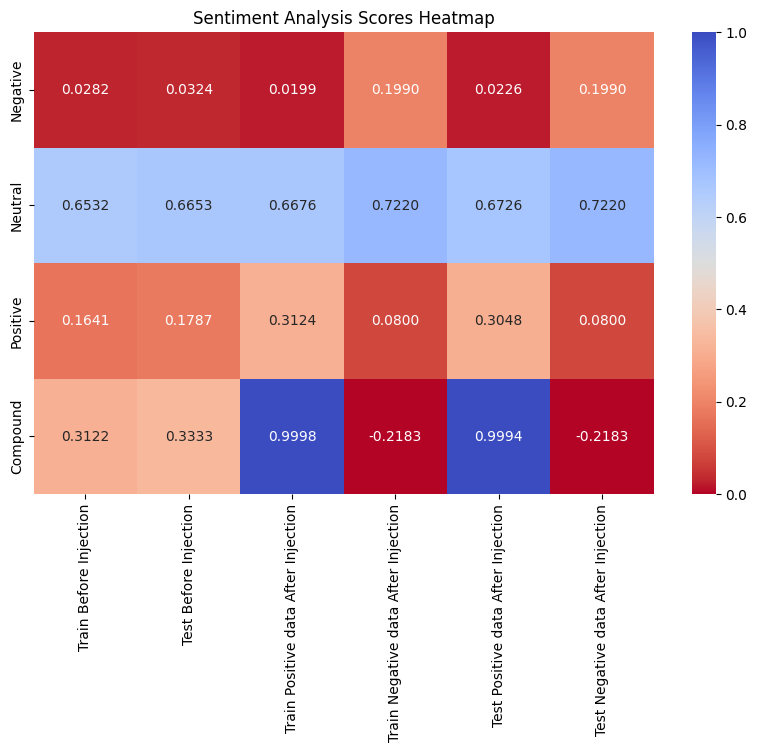

In [14]:
# Prepare the data
data = {
    'Train Before Injection': [0.0282, 0.6532, 0.1641, 0.3122],
    'Test Before Injection': [0.0324, 0.6653, 0.1787, 0.3333],
    'Train Positive data After Injection': [0.0199, 0.6676, 0.3124, 0.9998],
    'Train Negative data After Injection': [0.199, 0.722, 0.080, -0.2183],
    'Test Positive data After Injection': [0.0226, 0.6726, 0.3048, 0.9994],
    'Test Negative data After Injection': [0.199, 0.722, 0.080, -0.2183]
}


# Define the sentiment categories
categories = ['Negative', 'Neutral', 'Positive', 'Compound']

# Create a dataframe
df = pd.DataFrame(data, index=categories)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm_r", cbar=True, vmin=0, vmax=1.0, fmt=".4f")
plt.title('Sentiment Analysis Scores Heatmap')
plt.show()